In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d47V0f48.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ORnetbin2d47V0f48.h5', batch_size=100, box_vector=4, categories=4, depth=47, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=True, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 86s 2ms/step - loss: 4.4898 - acc: 0.1248 - val_loss: 4.4258 - val_acc: 0.4950

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 4.425775279366009, 'val_acc': 0.4949973597847957, 'loss': 4.489793725229973, 'acc': 0.12479210551425424, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

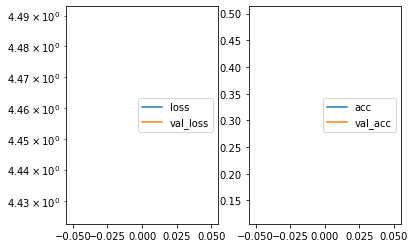

Predicted cell: Normal Probability: [[0.94261074]]
True Cell type: Normal
X [[0.49712104]]
True positional value X 0.5
Y [[0.40213853]]
True positional value Y 0.5
H [[0.32543978]]
True positional value H 0.24074074074074073
W [[0.23913775]]
True positional value W 0.3148148148148148


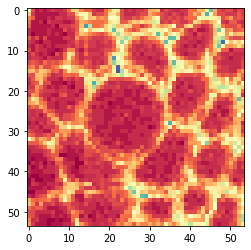

Epoch 2/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.0348 - acc: 0.6731 - val_loss: 2.9147 - val_acc: 0.8099

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.9146610571874825, 'val_acc': 0.8098999498203091, 'loss': 3.034762057090681, 'acc': 0.6731344910904605, 'lr': 1e-04}


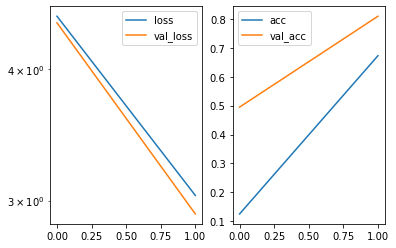

Predicted cell: MatureP1 Probability: [[0.9411198]]
True Cell type: MatureP1
X [[0.552675]]
True positional value X 0.6851851851851852
Y [[0.37473553]]
True positional value Y 0.3148148148148148
H [[0.26601604]]
True positional value H 0.24074074074074073
W [[0.28171712]]
True positional value W 0.2962962962962963


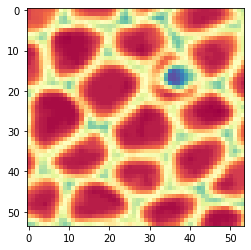

Epoch 3/250
36076/36076 [==============================] - 73s 2ms/step - loss: 2.5292 - acc: 0.8791 - val_loss: 2.6272 - val_acc: 0.8957

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.627230778689633, 'val_acc': 0.8957346014564699, 'loss': 2.5292065127459766, 'acc': 0.8790885903298927, 'lr': 1e-04}


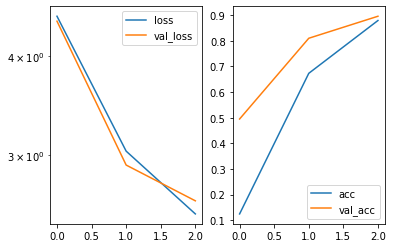

Predicted cell: NonMatureP1 Probability: [[0.9824828]]
True Cell type: NonMatureP1
X [[0.63093436]]
True positional value X 0.5
Y [[0.60160273]]
True positional value Y 0.6851851851851852
H [[0.33364806]]
True positional value H 0.2962962962962963
W [[0.32203627]]
True positional value W 0.3888888888888889


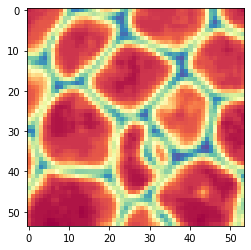

Epoch 4/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.3314 - acc: 0.9260 - val_loss: 2.5325 - val_acc: 0.9194

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.53254261476357, 'val_acc': 0.9194312749127452, 'loss': 2.3313535481892926, 'acc': 0.9259895801887846, 'lr': 1e-04}


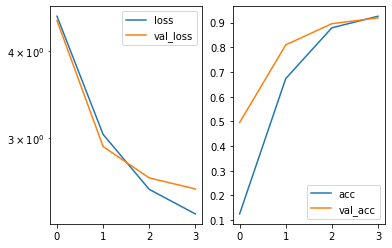

Predicted cell: MatureP1 Probability: [[0.87032634]]
True Cell type: MatureP1
X [[0.2899855]]
True positional value X 0.3148148148148148
Y [[0.3909747]]
True positional value Y 0.3148148148148148
H [[0.31715032]]
True positional value H 0.25925925925925924
W [[0.29332614]]
True positional value W 0.24074074074074073


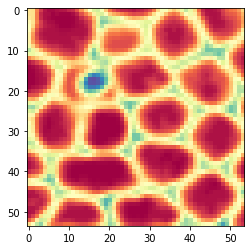

Epoch 5/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.2333 - acc: 0.9446 - val_loss: 2.4830 - val_acc: 0.9500

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.482950813334637, 'val_acc': 0.9499736731149072, 'loss': 2.233310155639073, 'acc': 0.9445614833593342, 'lr': 1e-04}


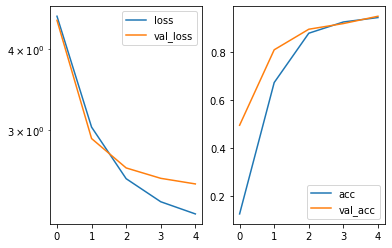

Predicted cell: MatureP1 Probability: [[0.9592482]]
True Cell type: MatureP1
X [[0.41457897]]
True positional value X 0.5
Y [[0.50460094]]
True positional value Y 0.5
H [[0.24792701]]
True positional value H 0.24074074074074073
W [[0.3114827]]
True positional value W 0.3148148148148148


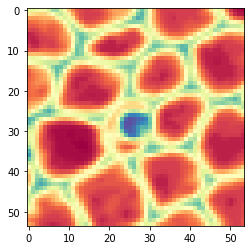

Epoch 6/250
36076/36076 [==============================] - 73s 2ms/step - loss: 2.1695 - acc: 0.9564 - val_loss: 2.4529 - val_acc: 0.9558

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.452906728230256, 'val_acc': 0.9557661983513593, 'loss': 2.169464254051477, 'acc': 0.9563976079175974, 'lr': 1e-04}


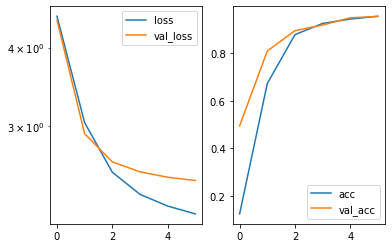

Predicted cell: Normal Probability: [[0.9989588]]
True Cell type: Normal
X [[0.49385822]]
True positional value X 0.5
Y [[0.5160721]]
True positional value Y 0.5
H [[0.3439457]]
True positional value H 0.2037037037037037
W [[0.5119056]]
True positional value W 0.2962962962962963


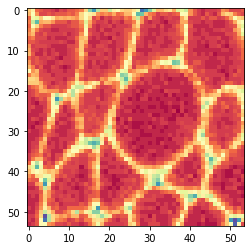

Epoch 7/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.1211 - acc: 0.9650 - val_loss: 2.4363 - val_acc: 0.9568

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.436302858380784, 'val_acc': 0.9568193769254076, 'loss': 2.1211357154237125, 'acc': 0.9649628607195012, 'lr': 1e-04}


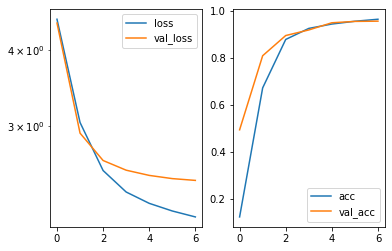

Predicted cell: MacroCheate Probability: [[0.9994673]]
True Cell type: MacroCheate
X [[0.7169414]]
True positional value X 0.6851851851851852
Y [[0.69109976]]
True positional value Y 0.6851851851851852
H [[0.8265871]]
True positional value H 0.8518518518518519
W [[0.8176917]]
True positional value W 0.9074074074074074


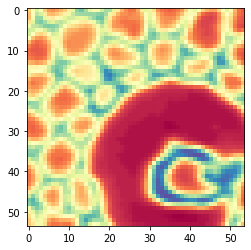

Epoch 8/250
36076/36076 [==============================] - 73s 2ms/step - loss: 2.0890 - acc: 0.9693 - val_loss: 2.4350 - val_acc: 0.9579

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.435015051160253, 'val_acc': 0.9578725722917072, 'loss': 2.0890449950483294, 'acc': 0.969259349961994, 'lr': 1e-04}


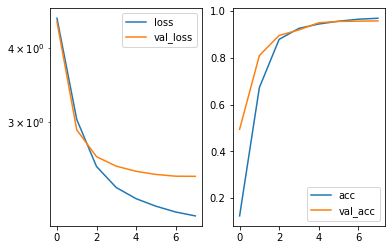

Predicted cell: MacroCheate Probability: [[0.99286747]]
True Cell type: MacroCheate
X [[0.24773464]]
True positional value X 0.3148148148148148
Y [[0.51150554]]
True positional value Y 0.5
H [[0.54418343]]
True positional value H 0.5370370370370371
W [[0.40633434]]
True positional value W 0.42592592592592593


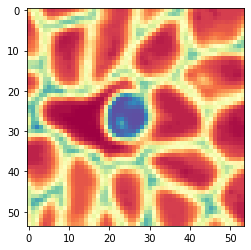

Epoch 9/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.0573 - acc: 0.9747 - val_loss: 2.4137 - val_acc: 0.9674

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.413659526399087, 'val_acc': 0.9673512424840118, 'loss': 2.0572955734992266, 'acc': 0.9746646055467827, 'lr': 1e-04}


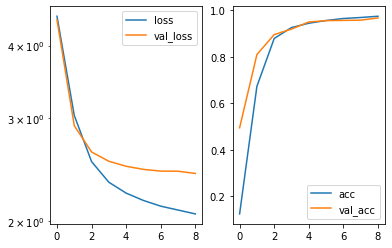

Predicted cell: Normal Probability: [[0.99648994]]
True Cell type: Normal
X [[0.51860976]]
True positional value X 0.5
Y [[0.49859953]]
True positional value Y 0.5
H [[0.44841087]]
True positional value H 0.37037037037037035
W [[0.40807465]]
True positional value W 0.4074074074074074


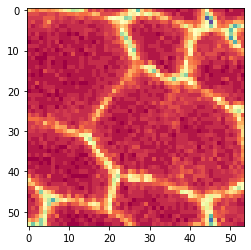

Epoch 10/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.0301 - acc: 0.9810 - val_loss: 2.3982 - val_acc: 0.9663

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.398168229253246, 'val_acc': 0.9662980586682702, 'loss': 2.0301034505648285, 'acc': 0.9810400375414217, 'lr': 1e-04}


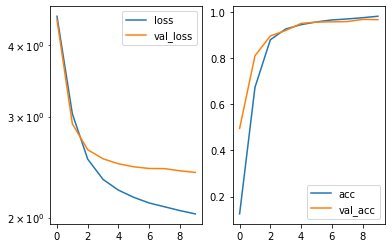

Predicted cell: NonMatureP1 Probability: [[0.99797696]]
True Cell type: NonMatureP1
X [[0.6732123]]
True positional value X 0.6851851851851852
Y [[0.6032226]]
True positional value Y 0.6851851851851852
H [[0.31362784]]
True positional value H 0.35185185185185186
W [[0.37921783]]
True positional value W 0.4444444444444444


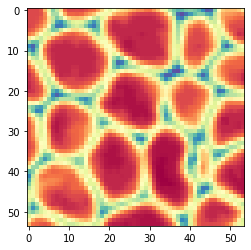

Epoch 11/250
36076/36076 [==============================] - 73s 2ms/step - loss: 2.0085 - acc: 0.9840 - val_loss: 2.3948 - val_acc: 0.9637

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3947850605762273, 'val_acc': 0.963665092286466, 'loss': 2.0084577242119215, 'acc': 0.9840059983173857, 'lr': 1e-04}


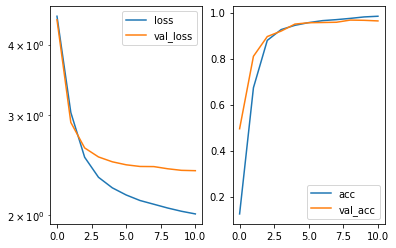

Predicted cell: MacroCheate Probability: [[0.9992238]]
True Cell type: MacroCheate
X [[0.33551478]]
True positional value X 0.3148148148148148
Y [[0.3261245]]
True positional value Y 0.3148148148148148
H [[0.5421433]]
True positional value H 0.6111111111111112
W [[0.5379797]]
True positional value W 0.5740740740740741


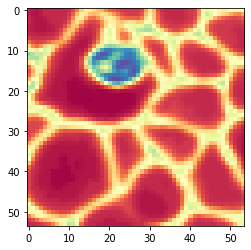

Epoch 12/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9892 - acc: 0.9880 - val_loss: 2.3889 - val_acc: 0.9647

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.388928049925191, 'val_acc': 0.9647182771693787, 'loss': 1.9892147938075595, 'acc': 0.9880252898512638, 'lr': 1e-04}


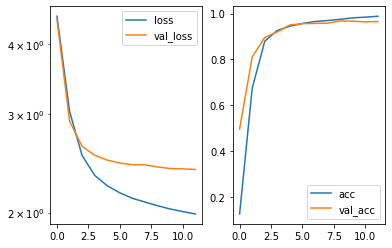

Predicted cell: MacroCheate Probability: [[0.99999285]]
True Cell type: MacroCheate
X [[0.31718287]]
True positional value X 0.3148148148148148
Y [[0.5713189]]
True positional value Y 0.5
H [[0.40267703]]
True positional value H 0.5185185185185185
W [[0.48133945]]
True positional value W 0.5555555555555556


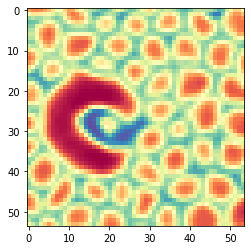

Epoch 13/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9736 - acc: 0.9909 - val_loss: 2.3807 - val_acc: 0.9658

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3806572880727357, 'val_acc': 0.9657714630880753, 'loss': 1.973605653308873, 'acc': 0.9908526522685794, 'lr': 1e-04}


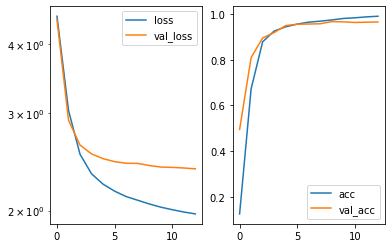

Predicted cell: Normal Probability: [[0.99993753]]
True Cell type: Normal
X [[0.53857654]]
True positional value X 0.5
Y [[0.53023976]]
True positional value Y 0.5
H [[0.35029936]]
True positional value H 0.24074074074074073
W [[0.44013187]]
True positional value W 0.48148148148148145


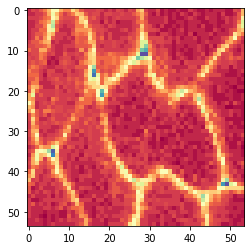

Epoch 14/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.9613 - acc: 0.9925 - val_loss: 2.3709 - val_acc: 0.9689

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3708563805128664, 'val_acc': 0.9689310292245966, 'loss': 1.9612551288100353, 'acc': 0.9924603681538424, 'lr': 1e-04}


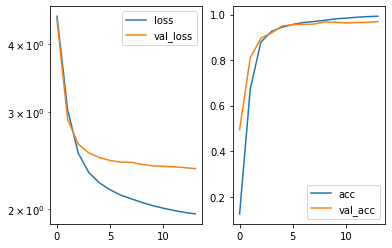

Predicted cell: MacroCheate Probability: [[0.99988997]]
True Cell type: MacroCheate
X [[0.24423493]]
True positional value X 0.3148148148148148
Y [[0.761376]]
True positional value Y 0.6851851851851852
H [[0.6134174]]
True positional value H 0.5740740740740741
W [[0.65708894]]
True positional value W 0.7407407407407407


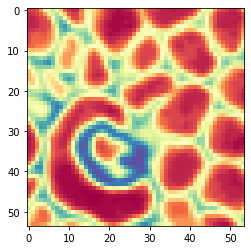

Epoch 15/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.9512 - acc: 0.9940 - val_loss: 2.3676 - val_acc: 0.9695

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3676176924903873, 'val_acc': 0.9694576185587018, 'loss': 1.9512035056695876, 'acc': 0.9939849264593449, 'lr': 1e-04}


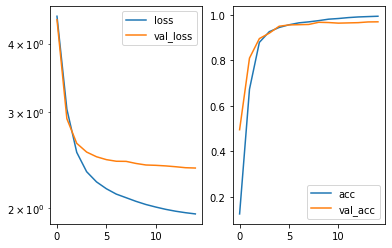

Predicted cell: Normal Probability: [[0.6774888]]
True Cell type: NonMatureP1
X [[0.39645022]]
True positional value X 0.6851851851851852
Y [[0.41266304]]
True positional value Y 0.3148148148148148
H [[0.37651214]]
True positional value H 0.3888888888888889
W [[0.35665223]]
True positional value W 0.4444444444444444


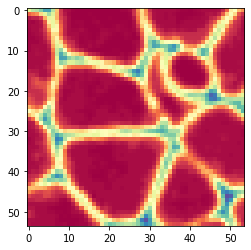

Epoch 16/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9397 - acc: 0.9953 - val_loss: 2.3574 - val_acc: 0.9731

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.357434648159242, 'val_acc': 0.9731437698234189, 'loss': 1.9397313234771432, 'acc': 0.9953431688717509, 'lr': 1e-04}


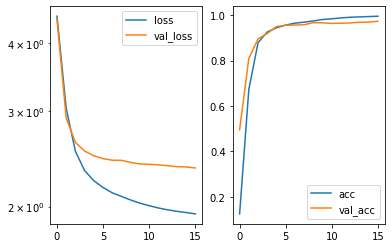

Predicted cell: Normal Probability: [[0.9992021]]
True Cell type: Normal
X [[0.49653053]]
True positional value X 0.5
Y [[0.561155]]
True positional value Y 0.5
H [[0.34812346]]
True positional value H 0.4074074074074074
W [[0.4058373]]
True positional value W 0.35185185185185186


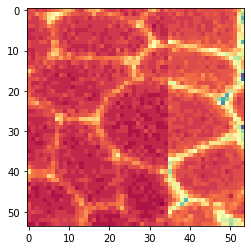

Epoch 17/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9322 - acc: 0.9965 - val_loss: 2.3587 - val_acc: 0.9710

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.358747510674001, 'val_acc': 0.971037395883071, 'loss': 1.932249738102359, 'acc': 0.9964519381880007, 'lr': 1e-04}


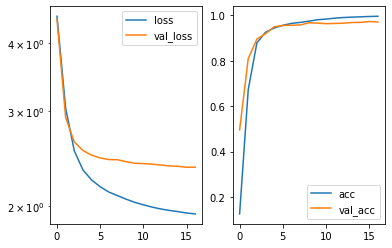

Predicted cell: NonMatureP1 Probability: [[0.99929833]]
True Cell type: NonMatureP1
X [[0.6320689]]
True positional value X 0.6851851851851852
Y [[0.6129687]]
True positional value Y 0.6851851851851852
H [[0.35361195]]
True positional value H 0.37037037037037035
W [[0.38993207]]
True positional value W 0.4074074074074074


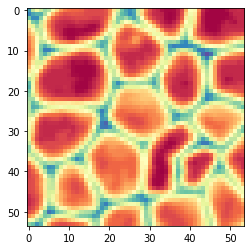

Epoch 18/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.9249 - acc: 0.9973 - val_loss: 2.3597 - val_acc: 0.9710

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3596851638645293, 'val_acc': 0.9710373969188547, 'loss': 1.924938235318321, 'acc': 0.9973112344080942, 'lr': 1e-04}


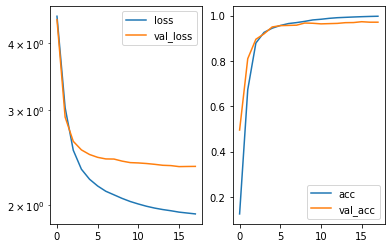

Predicted cell: MacroCheate Probability: [[0.9992118]]
True Cell type: MacroCheate
X [[0.2936696]]
True positional value X 0.3148148148148148
Y [[0.41436136]]
True positional value Y 0.3148148148148148
H [[0.18374574]]
True positional value H 0.3333333333333333
W [[0.26569903]]
True positional value W 0.35185185185185186


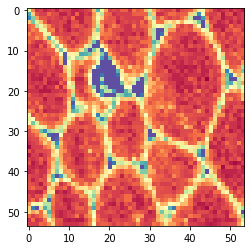

Epoch 19/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9175 - acc: 0.9977 - val_loss: 2.3533 - val_acc: 0.9731

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.353280675103628, 'val_acc': 0.9731437687876351, 'loss': 1.9174658827353956, 'acc': 0.9976715844358754, 'lr': 1e-04}


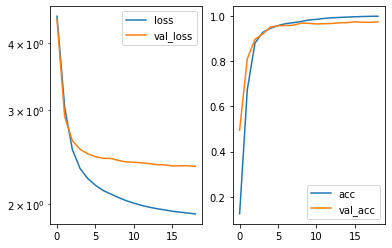

Predicted cell: MacroCheate Probability: [[0.9998022]]
True Cell type: MacroCheate
X [[0.5065339]]
True positional value X 0.5
Y [[0.34334397]]
True positional value Y 0.3148148148148148
H [[0.53373396]]
True positional value H 0.5370370370370371
W [[0.76669675]]
True positional value W 0.8888888888888888


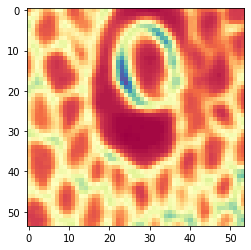

Epoch 20/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9119 - acc: 0.9982 - val_loss: 2.3495 - val_acc: 0.9731

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.349461786868762, 'val_acc': 0.9731437698234189, 'loss': 1.9118787997418463, 'acc': 0.9981982498610941, 'lr': 1e-04}


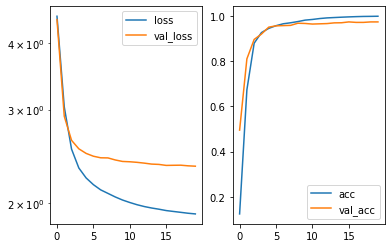

Predicted cell: MatureP1 Probability: [[0.9998766]]
True Cell type: MatureP1
X [[0.70834005]]
True positional value X 0.6851851851851852
Y [[0.34694016]]
True positional value Y 0.3148148148148148
H [[0.22996107]]
True positional value H 0.25925925925925924
W [[0.19248387]]
True positional value W 0.2222222222222222


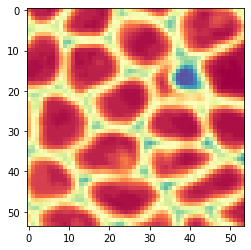

Epoch 21/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9055 - acc: 0.9988 - val_loss: 2.3437 - val_acc: 0.9747

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.343675179504105, 'val_acc': 0.974723547147788, 'loss': 1.905545118669539, 'acc': 0.998752634519219, 'lr': 1e-04}


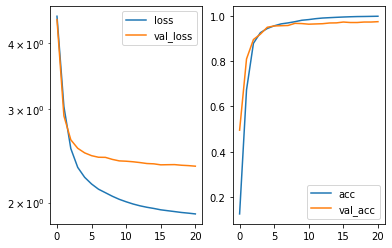

Predicted cell: MacroCheate Probability: [[0.9981583]]
True Cell type: MacroCheate
X [[0.3491632]]
True positional value X 0.3148148148148148
Y [[0.38433418]]
True positional value Y 0.3148148148148148
H [[0.4050688]]
True positional value H 0.7407407407407407
W [[0.49002492]]
True positional value W 0.6666666666666666


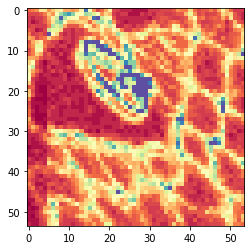

Epoch 22/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9010 - acc: 0.9985 - val_loss: 2.3399 - val_acc: 0.9753

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.339928925947618, 'val_acc': 0.9752501395892444, 'loss': 1.9010430818810036, 'acc': 0.9984754421901565, 'lr': 1e-04}


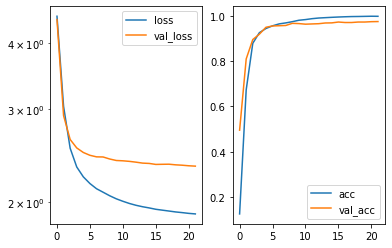

Predicted cell: MatureP1 Probability: [[0.9990508]]
True Cell type: MatureP1
X [[0.37326357]]
True positional value X 0.5
Y [[0.32689172]]
True positional value Y 0.3148148148148148
H [[0.5253788]]
True positional value H 0.5555555555555556
W [[0.38791078]]
True positional value W 0.5185185185185185


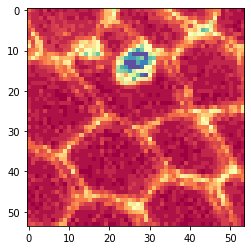

Epoch 23/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8971 - acc: 0.9987 - val_loss: 2.3379 - val_acc: 0.9747

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.337928948620861, 'val_acc': 0.974723547147788, 'loss': 1.8971103314801427, 'acc': 0.9987249152863128, 'lr': 1e-04}


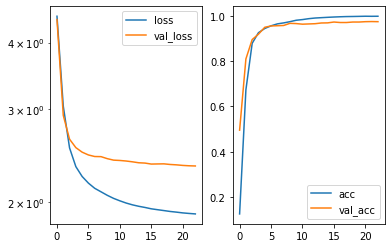

Predicted cell: Normal Probability: [[0.9999989]]
True Cell type: Normal
X [[0.59636015]]
True positional value X 0.5
Y [[0.43506652]]
True positional value Y 0.5
H [[0.27842563]]
True positional value H 0.3888888888888889
W [[0.53262234]]
True positional value W 0.5370370370370371


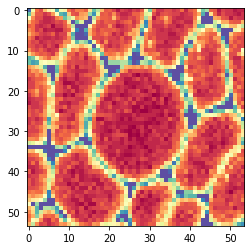

Epoch 24/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8906 - acc: 0.9991 - val_loss: 2.3334 - val_acc: 0.9763

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3334387262725027, 'val_acc': 0.9763033244721572, 'loss': 1.8905882319374139, 'acc': 0.9990575460811877, 'lr': 1e-04}


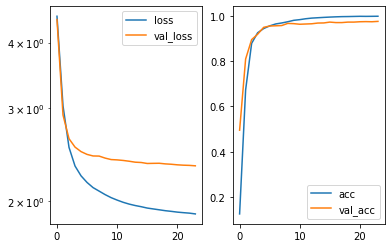

Predicted cell: Normal Probability: [[0.99999297]]
True Cell type: Normal
X [[0.46473587]]
True positional value X 0.5
Y [[0.39692682]]
True positional value Y 0.5
H [[0.2616678]]
True positional value H 0.2037037037037037
W [[0.14889818]]
True positional value W 0.16666666666666666


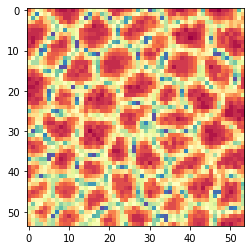

Epoch 25/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8851 - acc: 0.9991 - val_loss: 2.3328 - val_acc: 0.9758

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3327857457442684, 'val_acc': 0.9757767351694393, 'loss': 1.8851078853650531, 'acc': 0.9991129845470001, 'lr': 1e-04}


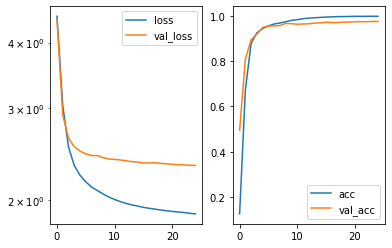

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.3368315]]
True positional value X 0.3148148148148148
Y [[0.3382791]]
True positional value Y 0.3148148148148148
H [[0.4389242]]
True positional value H 0.5
W [[0.81474704]]
True positional value W 0.8518518518518519


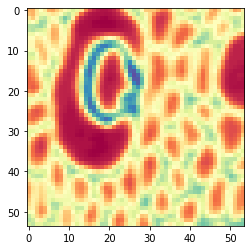

Epoch 26/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8818 - acc: 0.9990 - val_loss: 2.3296 - val_acc: 0.9763

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.32955024969333, 'val_acc': 0.9763033255079409, 'loss': 1.8818024903393753, 'acc': 0.9990298268482815, 'lr': 1e-04}


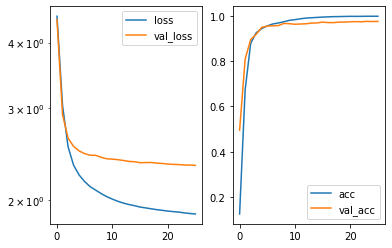

Predicted cell: MatureP1 Probability: [[0.99906665]]
True Cell type: MatureP1
X [[0.43753767]]
True positional value X 0.3148148148148148
Y [[0.3953445]]
True positional value Y 0.3148148148148148
H [[0.3103739]]
True positional value H 0.42592592592592593
W [[0.23229337]]
True positional value W 0.46296296296296297


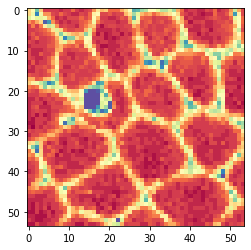

Epoch 27/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8789 - acc: 0.9991 - val_loss: 2.3255 - val_acc: 0.9768

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.325469789535137, 'val_acc': 0.9768299210881358, 'loss': 1.878892677997932, 'acc': 0.9990852653140939, 'lr': 1e-04}


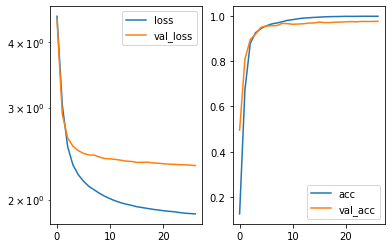

Predicted cell: NonMatureP1 Probability: [[0.9990332]]
True Cell type: NonMatureP1
X [[0.49334842]]
True positional value X 0.5
Y [[0.7244839]]
True positional value Y 0.6851851851851852
H [[0.26168594]]
True positional value H 0.3333333333333333
W [[0.1968011]]
True positional value W 0.24074074074074073


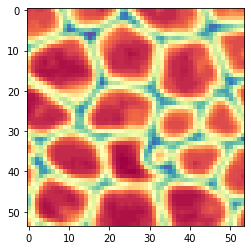

Epoch 28/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8756 - acc: 0.9991 - val_loss: 2.3224 - val_acc: 0.9753

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.322382818466114, 'val_acc': 0.9752501406250281, 'loss': 1.8756356715547997, 'acc': 0.9990575460811877, 'lr': 1e-04}


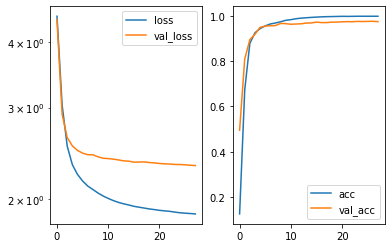

Predicted cell: MatureP1 Probability: [[0.9999989]]
True Cell type: MatureP1
X [[0.6454464]]
True positional value X 0.6851851851851852
Y [[0.6674662]]
True positional value Y 0.6851851851851852
H [[0.48626858]]
True positional value H 0.5555555555555556
W [[0.4793095]]
True positional value W 0.4444444444444444


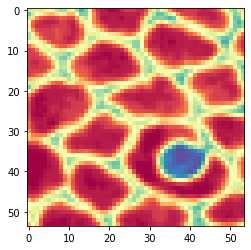

Epoch 29/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8713 - acc: 0.9992 - val_loss: 2.3246 - val_acc: 0.9753

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.324589725542596, 'val_acc': 0.9752501406250281, 'loss': 1.8713267603580352, 'acc': 0.999196142245719, 'lr': 1e-04}


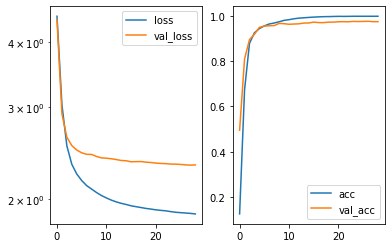

Predicted cell: Normal Probability: [[0.9999417]]
True Cell type: Normal
X [[0.5940488]]
True positional value X 0.5
Y [[0.3802062]]
True positional value Y 0.5
H [[0.21580566]]
True positional value H 0.18518518518518517
W [[0.24542876]]
True positional value W 0.2037037037037037


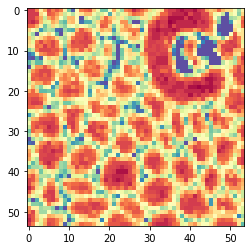

Epoch 30/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8664 - acc: 0.9992 - val_loss: 2.3153 - val_acc: 0.9758

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.315289645021749, 'val_acc': 0.9757767341022683, 'loss': 1.8663503117301747, 'acc': 0.9992238614786252, 'lr': 1e-04}


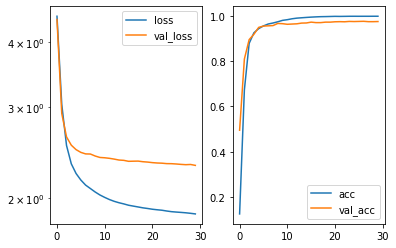

Predicted cell: MatureP1 Probability: [[0.9972691]]
True Cell type: MatureP1
X [[0.5823999]]
True positional value X 0.6851851851851852
Y [[0.6795249]]
True positional value Y 0.6851851851851852
H [[0.38928545]]
True positional value H 0.3333333333333333
W [[0.40654927]]
True positional value W 0.24074074074074073


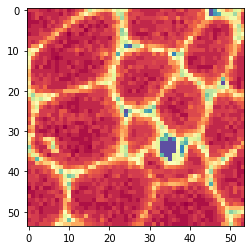

Epoch 31/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8631 - acc: 0.9993 - val_loss: 2.3159 - val_acc: 0.9768

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3159185629759795, 'val_acc': 0.9768299169136135, 'loss': 1.8630510268712046, 'acc': 0.9992792999444376, 'lr': 1e-04}


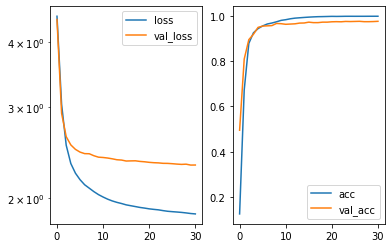

Predicted cell: MatureP1 Probability: [[0.9995584]]
True Cell type: MatureP1
X [[0.49834764]]
True positional value X 0.5
Y [[0.5209649]]
True positional value Y 0.5
H [[0.32271898]]
True positional value H 0.3148148148148148
W [[0.33346957]]
True positional value W 0.25925925925925924


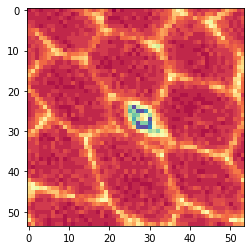

Epoch 32/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8605 - acc: 0.9992 - val_loss: 2.3072 - val_acc: 0.9779

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.307235403648485, 'val_acc': 0.9778831017965264, 'loss': 1.8604652961985157, 'acc': 0.9992238614786252, 'lr': 1e-04}


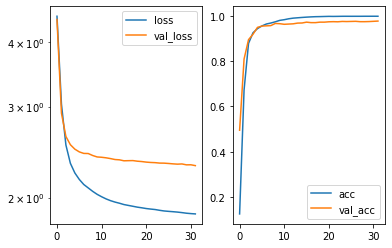

Predicted cell: MacroCheate Probability: [[0.99976844]]
True Cell type: MacroCheate
X [[0.4552511]]
True positional value X 0.5
Y [[0.44464278]]
True positional value Y 0.5
H [[0.3314011]]
True positional value H 0.37037037037037035
W [[0.35890853]]
True positional value W 0.4074074074074074


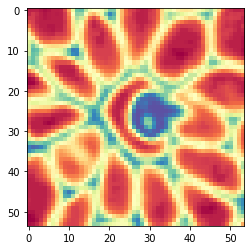

Epoch 33/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8570 - acc: 0.9991 - val_loss: 2.3086 - val_acc: 0.9784

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3085720782659127, 'val_acc': 0.9784096973767212, 'loss': 1.856998726697491, 'acc': 0.9990852653140939, 'lr': 1e-04}


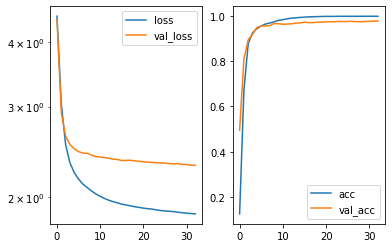

Predicted cell: MacroCheate Probability: [[0.99977535]]
True Cell type: MacroCheate
X [[0.29699403]]
True positional value X 0.3148148148148148
Y [[0.5493762]]
True positional value Y 0.5
H [[0.8809643]]
True positional value H 0.9814814814814815
W [[0.90666604]]
True positional value W 0.9074074074074074


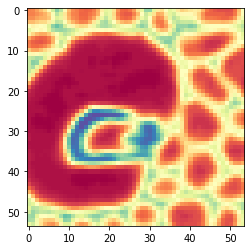

Epoch 34/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8537 - acc: 0.9993 - val_loss: 2.3035 - val_acc: 0.9795

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.3034592340217257, 'val_acc': 0.9794628801566793, 'loss': 1.8537116447379576, 'acc': 0.9992515807115314, 'lr': 1e-04}


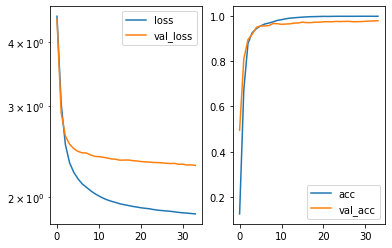

Predicted cell: MatureP1 Probability: [[0.99956363]]
True Cell type: MatureP1
X [[0.45665625]]
True positional value X 0.5
Y [[0.51802284]]
True positional value Y 0.5
H [[0.42723352]]
True positional value H 0.37037037037037035
W [[0.31056646]]
True positional value W 0.35185185185185186


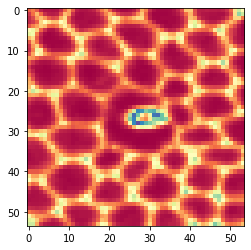

Epoch 35/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8490 - acc: 0.9994 - val_loss: 2.2976 - val_acc: 0.9768

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2975795840262863, 'val_acc': 0.9768299200209647, 'loss': 1.849018946179319, 'acc': 0.9993624576431563, 'lr': 1e-04}


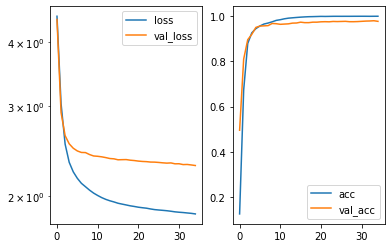

Predicted cell: Normal Probability: [[0.9995265]]
True Cell type: Normal
X [[0.49755636]]
True positional value X 0.5
Y [[0.47887272]]
True positional value Y 0.5
H [[0.3879509]]
True positional value H 0.5185185185185185
W [[0.3573255]]
True positional value W 0.5


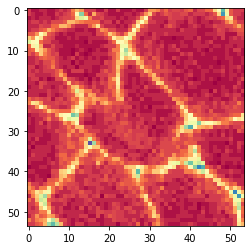

Epoch 36/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8468 - acc: 0.9992 - val_loss: 2.2978 - val_acc: 0.9789

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2977515580215977, 'val_acc': 0.9789362898181777, 'loss': 1.8467780135002776, 'acc': 0.999196142245719, 'lr': 1e-04}


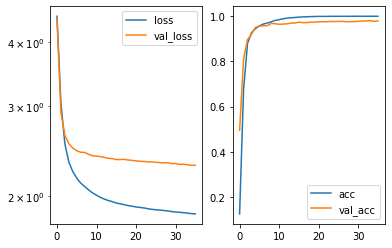

Predicted cell: MatureP1 Probability: [[0.9999758]]
True Cell type: MatureP1
X [[0.58330715]]
True positional value X 0.5
Y [[0.6900665]]
True positional value Y 0.6851851851851852
H [[0.35319823]]
True positional value H 0.3333333333333333
W [[0.35198447]]
True positional value W 0.2962962962962963


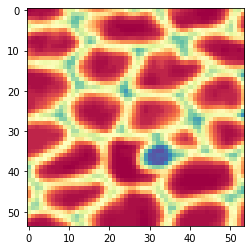

Epoch 37/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8427 - acc: 0.9992 - val_loss: 2.2909 - val_acc: 0.9779

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2908683405731023, 'val_acc': 0.9778831059710487, 'loss': 1.8427330996617732, 'acc': 0.9991684230128126, 'lr': 1e-04}


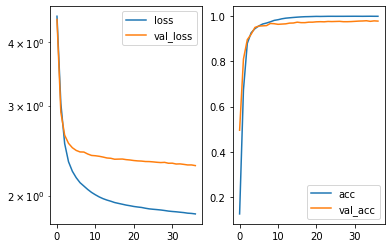

Predicted cell: MatureP1 Probability: [[0.99769396]]
True Cell type: MatureP1
X [[0.42832708]]
True positional value X 0.3148148148148148
Y [[0.36340022]]
True positional value Y 0.3148148148148148
H [[0.40801275]]
True positional value H 0.5925925925925926
W [[0.3608566]]
True positional value W 0.5555555555555556


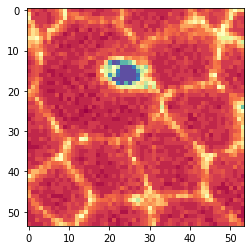

Epoch 38/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8396 - acc: 0.9993 - val_loss: 2.2892 - val_acc: 0.9784

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2892071824126523, 'val_acc': 0.9784097005154598, 'loss': 1.8395676368461082, 'acc': 0.9992792999444376, 'lr': 1e-04}


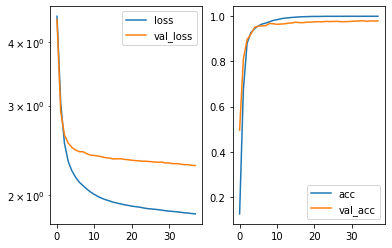

Predicted cell: MatureP1 Probability: [[0.9998259]]
True Cell type: MatureP1
X [[0.31466058]]
True positional value X 0.3148148148148148
Y [[0.28645092]]
True positional value Y 0.3148148148148148
H [[0.55185777]]
True positional value H 0.48148148148148145
W [[0.4191511]]
True positional value W 0.42592592592592593


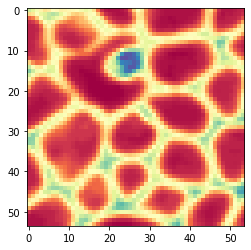

Epoch 39/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8378 - acc: 0.9991 - val_loss: 2.2984 - val_acc: 0.9774

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2984357146353016, 'val_acc': 0.9773565124938085, 'loss': 1.8377829815228746, 'acc': 0.9991407037799064, 'lr': 1e-04}


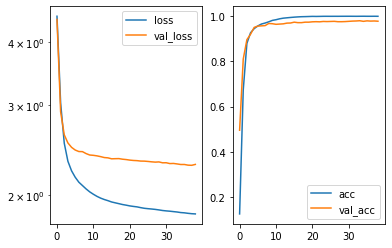

Predicted cell: Normal Probability: [[0.99999964]]
True Cell type: Normal
X [[0.52781713]]
True positional value X 0.5
Y [[0.50173545]]
True positional value Y 0.5
H [[0.18853232]]
True positional value H 0.16666666666666666
W [[0.35335612]]
True positional value W 0.12962962962962962


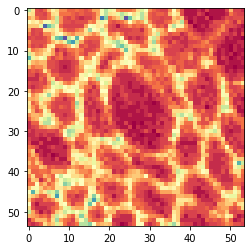

Epoch 40/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8340 - acc: 0.9993 - val_loss: 2.2822 - val_acc: 0.9774

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2822409737041087, 'val_acc': 0.9773565082878989, 'loss': 1.8339895703256204, 'acc': 0.9992792999444376, 'lr': 1e-04}


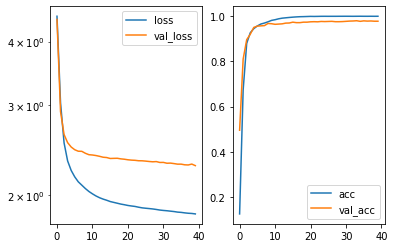

Predicted cell: MacroCheate Probability: [[0.9766926]]
True Cell type: MacroCheate
X [[0.27807754]]
True positional value X 0.3148148148148148
Y [[0.29066324]]
True positional value Y 0.3148148148148148
H [[0.20461367]]
True positional value H 0.46296296296296297
W [[0.19015935]]
True positional value W 0.5555555555555556


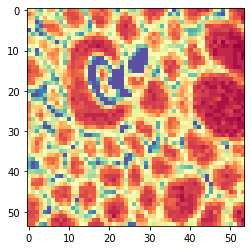

Epoch 41/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8313 - acc: 0.9992 - val_loss: 2.2780 - val_acc: 0.9784

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2780494539281957, 'val_acc': 0.9784096994482887, 'loss': 1.831326053655125, 'acc': 0.999196142245719, 'lr': 1e-04}


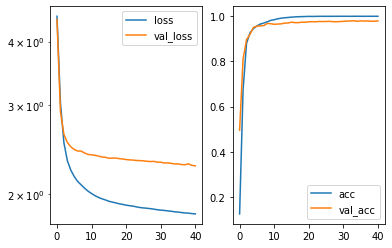

Predicted cell: NonMatureP1 Probability: [[0.9998622]]
True Cell type: NonMatureP1
X [[0.5920002]]
True positional value X 0.5
Y [[0.6133601]]
True positional value Y 0.6851851851851852
H [[0.36931407]]
True positional value H 0.37037037037037035
W [[0.27748042]]
True positional value W 0.2962962962962963


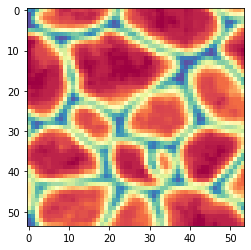

Epoch 42/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8284 - acc: 0.9992 - val_loss: 2.2766 - val_acc: 0.9784

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2766172219226712, 'val_acc': 0.9784096963095502, 'loss': 1.8283544136317635, 'acc': 0.9992238614786252, 'lr': 1e-04}


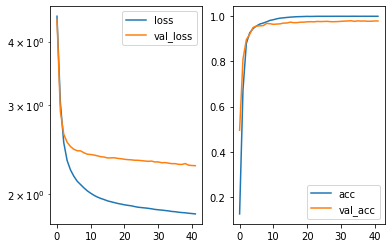

Predicted cell: Normal Probability: [[0.999923]]
True Cell type: Normal
X [[0.38971597]]
True positional value X 0.5
Y [[0.5519325]]
True positional value Y 0.5
H [[0.46776038]]
True positional value H 0.46296296296296297
W [[0.3783688]]
True positional value W 0.37037037037037035


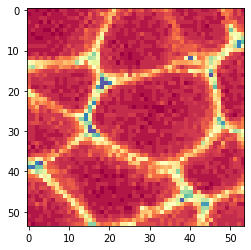

Epoch 43/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8250 - acc: 0.9993 - val_loss: 2.2740 - val_acc: 0.9795

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.27397313376613, 'val_acc': 0.9794628822596341, 'loss': 1.8249639763854826, 'acc': 0.9993070191773439, 'lr': 1e-04}


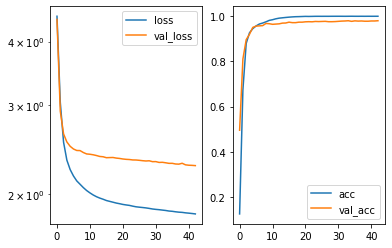

Predicted cell: MacroCheate Probability: [[0.9999968]]
True Cell type: MacroCheate
X [[0.38157028]]
True positional value X 0.3148148148148148
Y [[0.31342575]]
True positional value Y 0.3148148148148148
H [[0.7702584]]
True positional value H 0.7777777777777778
W [[0.8412689]]
True positional value W 0.8148148148148148


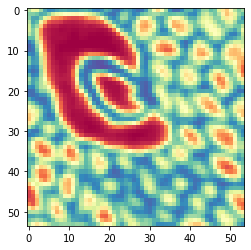

Epoch 44/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8232 - acc: 0.9992 - val_loss: 2.2744 - val_acc: 0.9789

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2744131929438764, 'val_acc': 0.9789362939926999, 'loss': 1.8231711715430083, 'acc': 0.9991961420804992, 'lr': 1e-04}


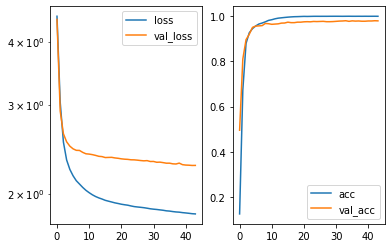

Predicted cell: MacroCheate Probability: [[0.9999944]]
True Cell type: MacroCheate
X [[0.52702665]]
True positional value X 0.5
Y [[0.5309391]]
True positional value Y 0.5
H [[0.7800456]]
True positional value H 0.7407407407407407
W [[0.82344526]]
True positional value W 0.8148148148148148


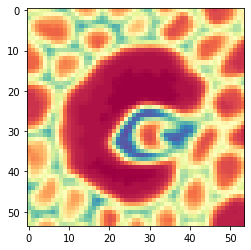

Epoch 45/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8202 - acc: 0.9992 - val_loss: 2.2683 - val_acc: 0.9816

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2683316484886196, 'val_acc': 0.9815692572357656, 'loss': 1.8201756918955065, 'acc': 0.999196142245719, 'lr': 1e-04}


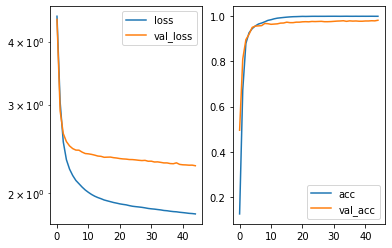

Predicted cell: MacroCheate Probability: [[0.99977595]]
True Cell type: MacroCheate
X [[0.39621472]]
True positional value X 0.3148148148148148
Y [[0.27837923]]
True positional value Y 0.3148148148148148
H [[0.7881888]]
True positional value H 0.7777777777777778
W [[0.84839416]]
True positional value W 0.8148148148148148


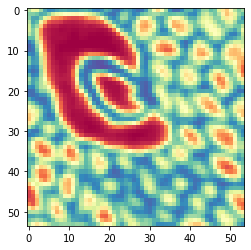

Epoch 46/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8165 - acc: 0.9993 - val_loss: 2.2576 - val_acc: 0.9779

Epoch 00046: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.257631109161337, 'val_acc': 0.9778831038680937, 'loss': 1.8164701179596812, 'acc': 0.9992792999444376, 'lr': 1e-04}


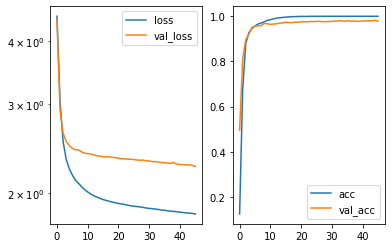

Predicted cell: NonMatureP1 Probability: [[0.9999838]]
True Cell type: NonMatureP1
X [[0.6031167]]
True positional value X 0.6851851851851852
Y [[0.6108177]]
True positional value Y 0.6851851851851852
H [[0.40086105]]
True positional value H 0.42592592592592593
W [[0.4697716]]
True positional value W 0.5740740740740741


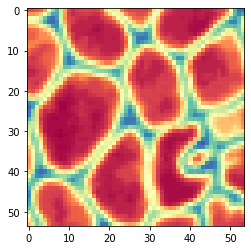

Epoch 47/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8132 - acc: 0.9994 - val_loss: 2.2569 - val_acc: 0.9810

Epoch 00047: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2569451416210478, 'val_acc': 0.9810426637585254, 'loss': 1.8131793565318701, 'acc': 0.9993624576431563, 'lr': 1e-04}


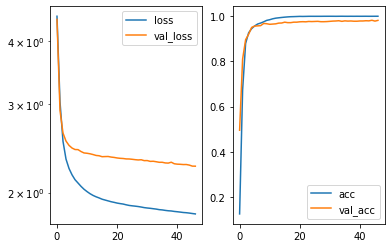

Predicted cell: MacroCheate Probability: [[0.99999845]]
True Cell type: MacroCheate
X [[0.35800958]]
True positional value X 0.3148148148148148
Y [[0.3943237]]
True positional value Y 0.3148148148148148
H [[0.40202874]]
True positional value H 0.5
W [[0.58186686]]
True positional value W 0.7037037037037037


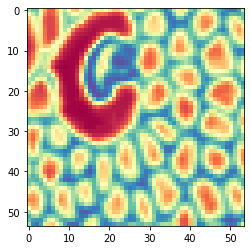

Epoch 48/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.8110 - acc: 0.9993 - val_loss: 2.2557 - val_acc: 0.9784

Epoch 00048: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.255706291314236, 'val_acc': 0.978409698412505, 'loss': 1.8109791054801252, 'acc': 0.9992792999444376, 'lr': 1e-04}


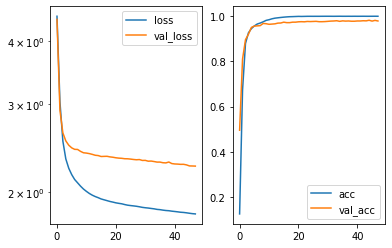

Predicted cell: Normal Probability: [[0.9999478]]
True Cell type: Normal
X [[0.41948408]]
True positional value X 0.5
Y [[0.49583694]]
True positional value Y 0.5
H [[0.27514362]]
True positional value H 0.4074074074074074
W [[0.30574393]]
True positional value W 0.3888888888888889


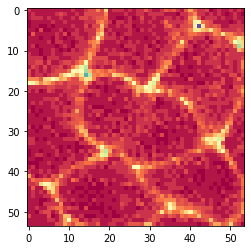

Epoch 49/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8090 - acc: 0.9993 - val_loss: 2.2570 - val_acc: 0.9763

Epoch 00049: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.257005985565346, 'val_acc': 0.9763033275795083, 'loss': 1.8090115585088176, 'acc': 0.9993347384102501, 'lr': 1e-04}


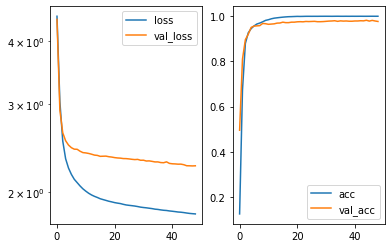

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.54319847]]
True positional value X 0.5
Y [[0.7286631]]
True positional value Y 0.6851851851851852
H [[0.34120998]]
True positional value H 0.46296296296296297
W [[0.39025003]]
True positional value W 0.46296296296296297


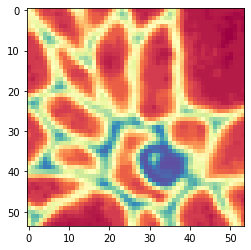

Epoch 50/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8054 - acc: 0.9993 - val_loss: 2.2505 - val_acc: 0.9805

Epoch 00050: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.250475836905007, 'val_acc': 0.9805160713170691, 'loss': 1.8053823357107424, 'acc': 0.9992515807115314, 'lr': 1e-04}


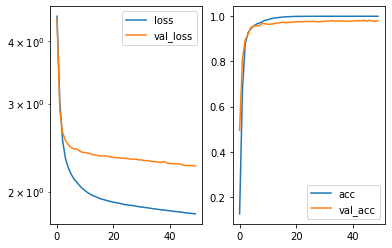

Predicted cell: MatureP1 Probability: [[0.9999956]]
True Cell type: MatureP1
X [[0.4562954]]
True positional value X 0.5
Y [[0.51200116]]
True positional value Y 0.5
H [[0.26651078]]
True positional value H 0.25925925925925924
W [[0.29353052]]
True positional value W 0.3333333333333333


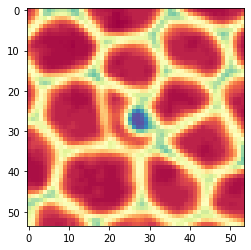

Epoch 51/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8025 - acc: 0.9993 - val_loss: 2.2411 - val_acc: 0.9805

Epoch 00051: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.241145437550959, 'val_acc': 0.9805160692141143, 'loss': 1.8025220040802363, 'acc': 0.9992792999444376, 'lr': 1e-04}


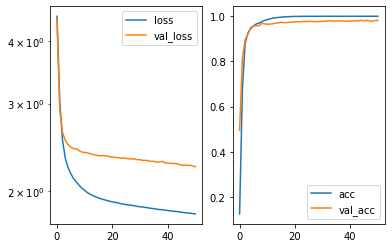

Predicted cell: Normal Probability: [[0.9999683]]
True Cell type: Normal
X [[0.49144286]]
True positional value X 0.5
Y [[0.373441]]
True positional value Y 0.5
H [[0.28896895]]
True positional value H 0.18518518518518517
W [[0.22257636]]
True positional value W 0.3333333333333333


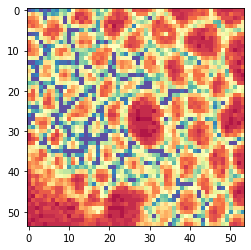

Epoch 52/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7997 - acc: 0.9993 - val_loss: 2.2474 - val_acc: 0.9800

Epoch 00052: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.247420088751433, 'val_acc': 0.9799894757368741, 'loss': 1.7996656807183506, 'acc': 0.9992792999444376, 'lr': 1e-04}


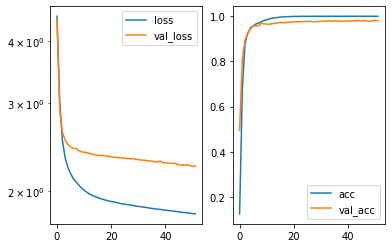

Predicted cell: MatureP1 Probability: [[0.9998472]]
True Cell type: MatureP1
X [[0.71414226]]
True positional value X 0.6851851851851852
Y [[0.5583609]]
True positional value Y 0.5
H [[0.4170161]]
True positional value H 0.35185185185185186
W [[0.4402693]]
True positional value W 0.42592592592592593


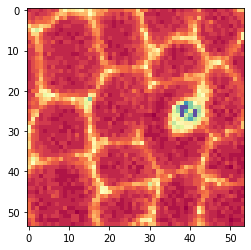

Epoch 53/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7973 - acc: 0.9993 - val_loss: 2.2448 - val_acc: 0.9789

Epoch 00053: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2447683428261644, 'val_acc': 0.9789362918897451, 'loss': 1.7972658865995583, 'acc': 0.9993070191773439, 'lr': 1e-04}


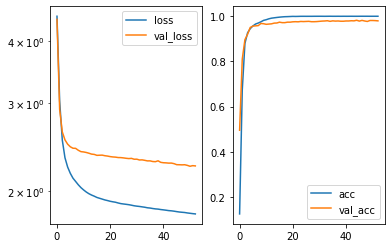

Predicted cell: MatureP1 Probability: [[0.99987113]]
True Cell type: MatureP1
X [[0.44706967]]
True positional value X 0.5
Y [[0.3550424]]
True positional value Y 0.3148148148148148
H [[0.32414705]]
True positional value H 0.2222222222222222
W [[0.3927817]]
True positional value W 0.2777777777777778


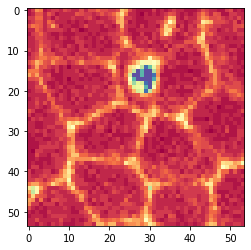

Epoch 54/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7939 - acc: 0.9992 - val_loss: 2.2389 - val_acc: 0.9805

Epoch 00054: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2388727986354335, 'val_acc': 0.9805160681783306, 'loss': 1.7938533859197945, 'acc': 0.9992238614786252, 'lr': 1e-04}


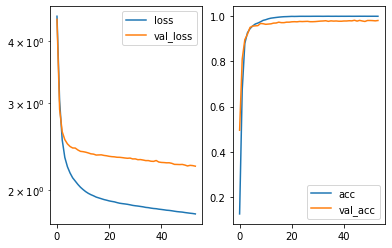

Predicted cell: MatureP1 Probability: [[0.9999995]]
True Cell type: MatureP1
X [[0.7371015]]
True positional value X 0.6851851851851852
Y [[0.54981625]]
True positional value Y 0.5
H [[0.21896866]]
True positional value H 0.3148148148148148
W [[0.22911829]]
True positional value W 0.3333333333333333


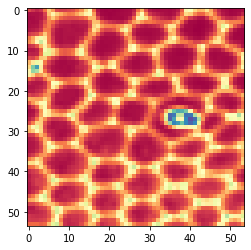

Epoch 55/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7914 - acc: 0.9993 - val_loss: 2.2287 - val_acc: 0.9795

Epoch 00055: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2287115666538617, 'val_acc': 0.9794628832954178, 'loss': 1.79144177933545, 'acc': 0.9992515807115314, 'lr': 1e-04}


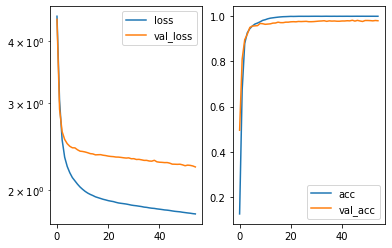

Predicted cell: Normal Probability: [[0.9999901]]
True Cell type: Normal
X [[0.52369547]]
True positional value X 0.5
Y [[0.4660741]]
True positional value Y 0.5
H [[0.2712916]]
True positional value H 0.16666666666666666
W [[0.4782542]]
True positional value W 0.37037037037037035


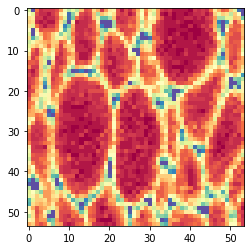

Epoch 56/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7890 - acc: 0.9993 - val_loss: 2.2322 - val_acc: 0.9805

Epoch 00056: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2322194620205766, 'val_acc': 0.9805160702812854, 'loss': 1.7890170261830551, 'acc': 0.9992792999444376, 'lr': 1e-04}


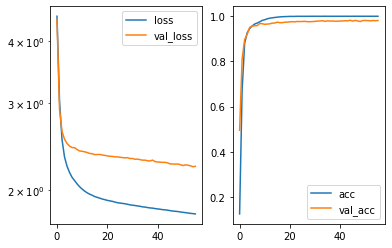

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5483878]]
True positional value X 0.6851851851851852
Y [[0.65464115]]
True positional value Y 0.6851851851851852
H [[0.6109192]]
True positional value H 0.5
W [[0.586173]]
True positional value W 0.5


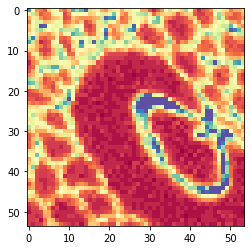

Epoch 57/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7857 - acc: 0.9994 - val_loss: 2.2240 - val_acc: 0.9800

Epoch 00057: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2239863593808096, 'val_acc': 0.9799894799113964, 'loss': 1.7856817982098734, 'acc': 0.9993624576431563, 'lr': 1e-04}


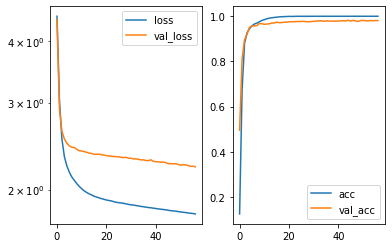

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3475928]]
True positional value X 0.3148148148148148
Y [[0.33163613]]
True positional value Y 0.3148148148148148
H [[0.7491354]]
True positional value H 0.7407407407407407
W [[0.81785214]]
True positional value W 0.7777777777777778


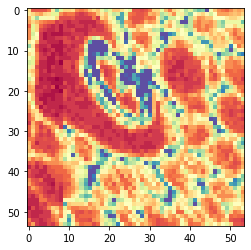

Epoch 58/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7826 - acc: 0.9993 - val_loss: 2.2288 - val_acc: 0.9800

Epoch 00058: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2287919053031997, 'val_acc': 0.9799894778398289, 'loss': 1.7826177920823563, 'acc': 0.9993347384102501, 'lr': 1e-04}


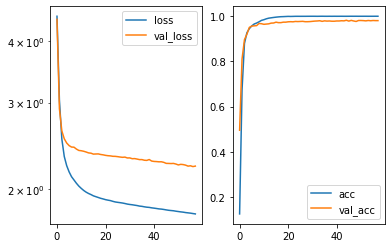

Predicted cell: MatureP1 Probability: [[0.99990666]]
True Cell type: MatureP1
X [[0.52200913]]
True positional value X 0.5
Y [[0.64627326]]
True positional value Y 0.6851851851851852
H [[0.36484334]]
True positional value H 0.25925925925925924
W [[0.23618564]]
True positional value W 0.2777777777777778


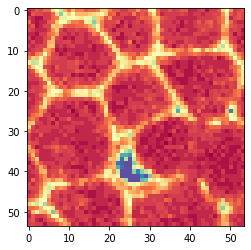

Epoch 59/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7806 - acc: 0.9993 - val_loss: 2.2189 - val_acc: 0.9821

Epoch 00059: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2188510048571484, 'val_acc': 0.9820958465384835, 'loss': 1.7806137655880778, 'acc': 0.9992792999444376, 'lr': 1e-04}


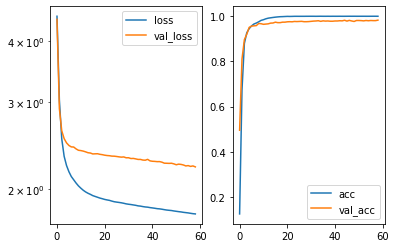

Predicted cell: Normal Probability: [[0.99962306]]
True Cell type: Normal
X [[0.43012667]]
True positional value X 0.5
Y [[0.4267672]]
True positional value Y 0.5
H [[0.2019636]]
True positional value H 0.18518518518518517
W [[0.25099736]]
True positional value W 0.2037037037037037


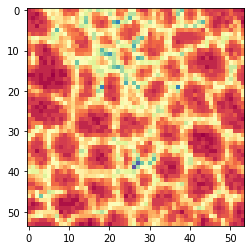

Epoch 60/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7775 - acc: 0.9993 - val_loss: 2.2244 - val_acc: 0.9795

Epoch 00060: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.224444422488341, 'val_acc': 0.9794628843312015, 'loss': 1.7774564801939496, 'acc': 0.9993070191773439, 'lr': 1e-04}


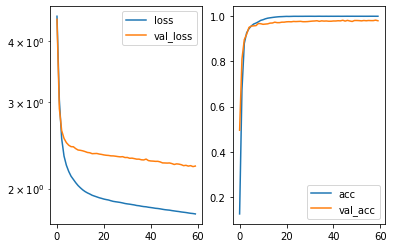

Predicted cell: MacroCheate Probability: [[0.99978]]
True Cell type: MacroCheate
X [[0.6630317]]
True positional value X 0.6851851851851852
Y [[0.4337689]]
True positional value Y 0.5
H [[0.56557775]]
True positional value H 0.4444444444444444
W [[0.55737865]]
True positional value W 0.48148148148148145


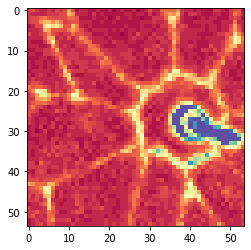

Epoch 61/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7746 - acc: 0.9993 - val_loss: 2.2269 - val_acc: 0.9795

Epoch 00061: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.226869956012021, 'val_acc': 0.9794628864341564, 'loss': 1.7746098957247871, 'acc': 0.9993347384102501, 'lr': 1e-04}


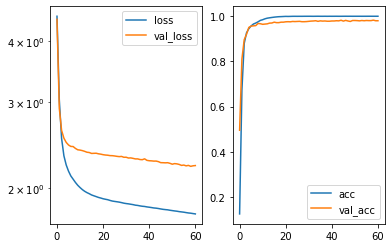

Predicted cell: NonMatureP1 Probability: [[0.9999875]]
True Cell type: NonMatureP1
X [[0.6019033]]
True positional value X 0.6851851851851852
Y [[0.5984273]]
True positional value Y 0.6851851851851852
H [[0.38615426]]
True positional value H 0.42592592592592593
W [[0.47159255]]
True positional value W 0.5740740740740741


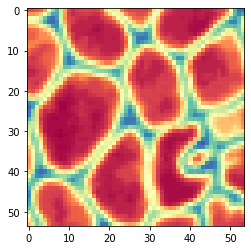

Epoch 62/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7721 - acc: 0.9993 - val_loss: 2.2110 - val_acc: 0.9774

Epoch 00062: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2110415218126276, 'val_acc': 0.9773565135295922, 'loss': 1.7721191491873436, 'acc': 0.9993070191773439, 'lr': 1e-04}


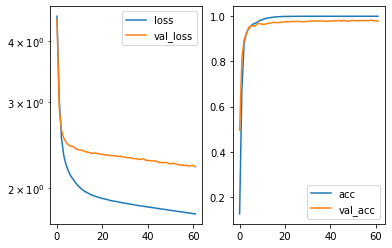

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.8082851]]
True positional value X 0.6851851851851852
Y [[0.3009603]]
True positional value Y 0.3148148148148148
H [[0.52256024]]
True positional value H 0.5
W [[0.81567025]]
True positional value W 0.8148148148148148


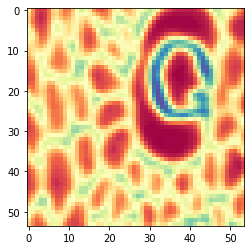

Epoch 63/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7699 - acc: 0.9994 - val_loss: 2.2067 - val_acc: 0.9810

Epoch 00063: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.20673028201163, 'val_acc': 0.9810426616555706, 'loss': 1.7698632154354752, 'acc': 0.9993624576431563, 'lr': 1e-04}


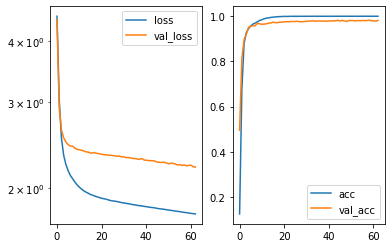

Predicted cell: Normal Probability: [[0.987978]]
True Cell type: Normal
X [[0.57847077]]
True positional value X 0.5
Y [[0.46817693]]
True positional value Y 0.5
H [[0.2944637]]
True positional value H 0.18518518518518517
W [[0.2991165]]
True positional value W 0.2777777777777778


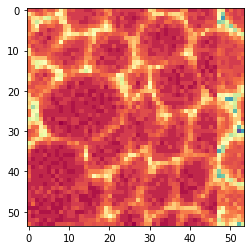

Epoch 64/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7671 - acc: 0.9993 - val_loss: 2.2070 - val_acc: 0.9805

Epoch 00064: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2069640753456263, 'val_acc': 0.9805160681783306, 'loss': 1.7671381203136154, 'acc': 0.9993070191773439, 'lr': 1e-04}


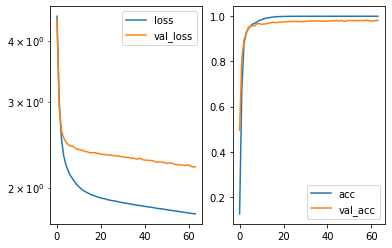

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.717239]]
True positional value X 0.6851851851851852
Y [[0.47436658]]
True positional value Y 0.5
H [[0.30583894]]
True positional value H 0.4074074074074074
W [[0.38693854]]
True positional value W 0.3888888888888889


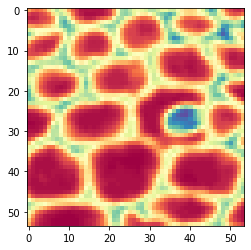

Epoch 65/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7649 - acc: 0.9994 - val_loss: 2.1987 - val_acc: 0.9810

Epoch 00065: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.19874877789072, 'val_acc': 0.9810426626913544, 'loss': 1.7649356868158939, 'acc': 0.9993624576431563, 'lr': 1e-04}


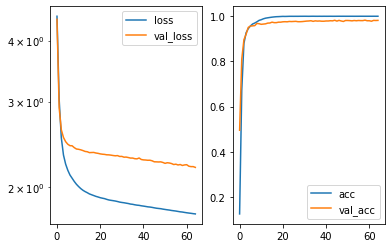

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.47830862]]
True positional value X 0.5
Y [[0.6219345]]
True positional value Y 0.6851851851851852
H [[0.21616943]]
True positional value H 0.3148148148148148
W [[0.26502097]]
True positional value W 0.2777777777777778


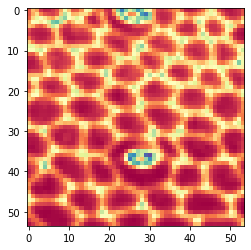

Epoch 66/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7623 - acc: 0.9993 - val_loss: 2.2013 - val_acc: 0.9805

Epoch 00066: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2012913677804153, 'val_acc': 0.9805160723528528, 'loss': 1.762260606513873, 'acc': 0.9993347384102501, 'lr': 1e-04}


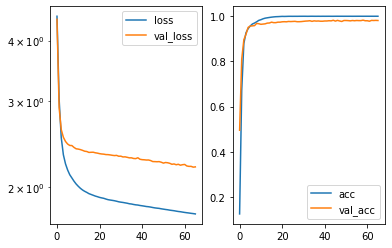

Predicted cell: MacroCheate Probability: [[0.9999993]]
True Cell type: MacroCheate
X [[0.7256932]]
True positional value X 0.6851851851851852
Y [[0.52710056]]
True positional value Y 0.5
H [[0.49336857]]
True positional value H 0.5185185185185185
W [[0.35417712]]
True positional value W 0.5555555555555556


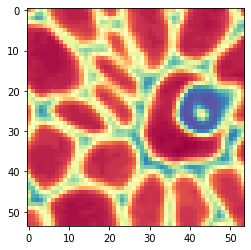

Epoch 67/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7600 - acc: 0.9993 - val_loss: 2.2003 - val_acc: 0.9774

Epoch 00067: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.2002952687673787, 'val_acc': 0.9773565156011597, 'loss': 1.7600371813163458, 'acc': 0.9992515807115314, 'lr': 1e-04}


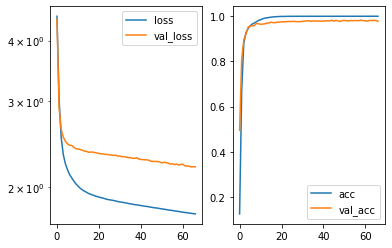

Predicted cell: Normal Probability: [[0.99997723]]
True Cell type: Normal
X [[0.4876482]]
True positional value X 0.5
Y [[0.45166314]]
True positional value Y 0.5
H [[0.25086862]]
True positional value H 0.2222222222222222
W [[0.30612522]]
True positional value W 0.24074074074074073


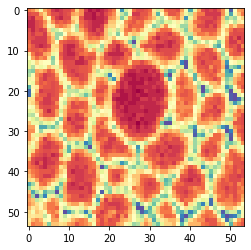

Epoch 68/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7574 - acc: 0.9994 - val_loss: 2.1918 - val_acc: 0.9800

Epoch 00068: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.191773913043496, 'val_acc': 0.9799894799113964, 'loss': 1.757439715183684, 'acc': 0.9993624576431563, 'lr': 1e-04}


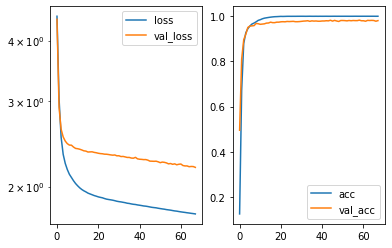

Predicted cell: MatureP1 Probability: [[0.9999988]]
True Cell type: MatureP1
X [[0.51006675]]
True positional value X 0.5
Y [[0.7435859]]
True positional value Y 0.6851851851851852
H [[0.31953937]]
True positional value H 0.3148148148148148
W [[0.33963233]]
True positional value W 0.4074074074074074


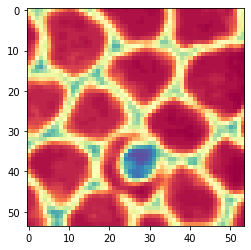

Epoch 69/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7547 - acc: 0.9992 - val_loss: 2.1893 - val_acc: 0.9805

Epoch 00069: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1892595465651556, 'val_acc': 0.9805160681783306, 'loss': 1.754651146765651, 'acc': 0.999196142245719, 'lr': 1e-04}


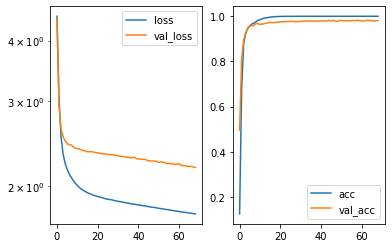

Predicted cell: Normal Probability: [[0.9999963]]
True Cell type: Normal
X [[0.5607003]]
True positional value X 0.5
Y [[0.4448763]]
True positional value Y 0.5
H [[0.21768254]]
True positional value H 0.3888888888888889
W [[0.30323386]]
True positional value W 0.48148148148148145


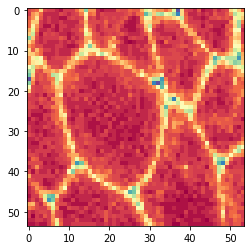

Epoch 70/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7516 - acc: 0.9992 - val_loss: 2.1951 - val_acc: 0.9795

Epoch 00070: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1950656374609427, 'val_acc': 0.9794628832954178, 'loss': 1.751576114591731, 'acc': 0.9992238614323636, 'lr': 1e-04}


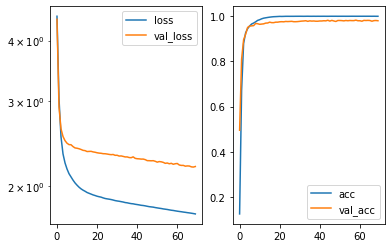

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.28437945]]
True positional value X 0.3148148148148148
Y [[0.6084807]]
True positional value Y 0.6851851851851852
H [[0.83595747]]
True positional value H 0.7777777777777778
W [[0.7878434]]
True positional value W 0.7222222222222222


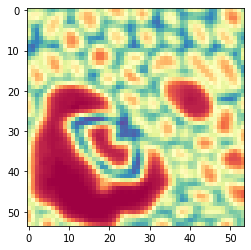

Epoch 71/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7483 - acc: 0.9994 - val_loss: 2.1867 - val_acc: 0.9795

Epoch 00071: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1867368674516805, 'val_acc': 0.9794628843312015, 'loss': 1.748301970957388, 'acc': 0.9993901768760626, 'lr': 1e-04}


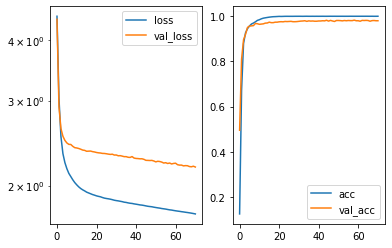

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.56544733]]
True positional value X 0.5
Y [[0.45105076]]
True positional value Y 0.5
H [[0.3533855]]
True positional value H 0.2777777777777778
W [[0.42316762]]
True positional value W 0.46296296296296297


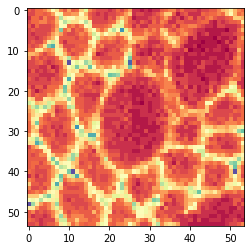

Epoch 72/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7461 - acc: 0.9993 - val_loss: 2.1824 - val_acc: 0.9800

Epoch 00072: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.182388627573087, 'val_acc': 0.9799894767726579, 'loss': 1.7461460805650375, 'acc': 0.9993070191773439, 'lr': 1e-04}


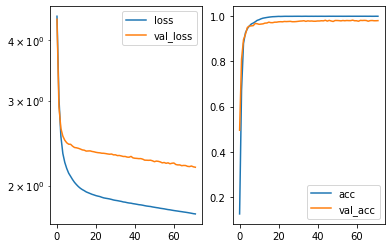

Predicted cell: MatureP1 Probability: [[0.99998844]]
True Cell type: MatureP1
X [[0.6623502]]
True positional value X 0.6851851851851852
Y [[0.27402455]]
True positional value Y 0.3148148148148148
H [[0.42986956]]
True positional value H 0.3888888888888889
W [[0.4063557]]
True positional value W 0.3888888888888889


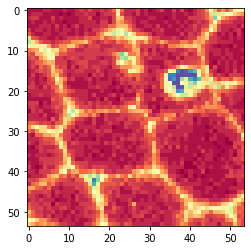

Epoch 73/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7438 - acc: 0.9994 - val_loss: 2.1769 - val_acc: 0.9810

Epoch 00073: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1768792794214042, 'val_acc': 0.9810426647943092, 'loss': 1.7438118246180847, 'acc': 0.9993624576431563, 'lr': 1e-04}


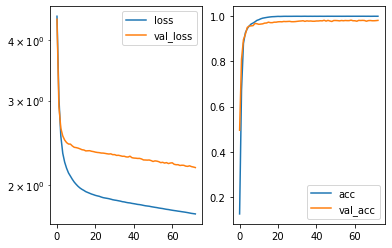

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.53490686]]
True positional value X 0.5
Y [[0.54150736]]
True positional value Y 0.5
H [[0.4201078]]
True positional value H 0.42592592592592593
W [[0.50213575]]
True positional value W 0.5185185185185185


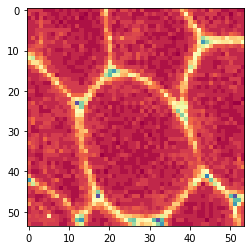

Epoch 74/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7414 - acc: 0.9993 - val_loss: 2.1731 - val_acc: 0.9810

Epoch 00074: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1730592332431176, 'val_acc': 0.9810426616555706, 'loss': 1.7414499574918838, 'acc': 0.9993070191773439, 'lr': 1e-04}


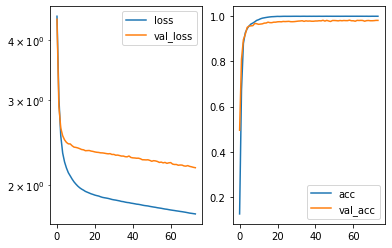

Predicted cell: Normal Probability: [[0.9999554]]
True Cell type: Normal
X [[0.54562825]]
True positional value X 0.5
Y [[0.53201586]]
True positional value Y 0.5
H [[0.37593907]]
True positional value H 0.2777777777777778
W [[0.30021486]]
True positional value W 0.3148148148148148


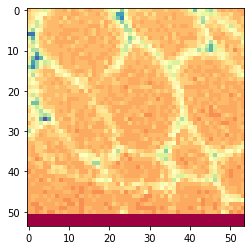

Epoch 75/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7394 - acc: 0.9993 - val_loss: 2.1778 - val_acc: 0.9805

Epoch 00075: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1778492611166427, 'val_acc': 0.9805160723528528, 'loss': 1.7394406728488614, 'acc': 0.9993070191310823, 'lr': 1e-04}


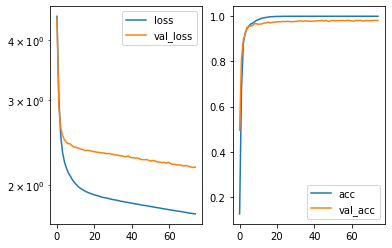

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.34327644]]
True positional value X 0.3148148148148148
Y [[0.28381407]]
True positional value Y 0.3148148148148148
H [[0.53210807]]
True positional value H 0.5370370370370371
W [[0.5871206]]
True positional value W 0.5555555555555556


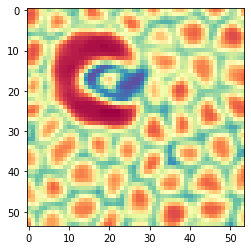

Epoch 76/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7362 - acc: 0.9993 - val_loss: 2.1675 - val_acc: 0.9789

Epoch 00076: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.167505970372847, 'val_acc': 0.9789362918897451, 'loss': 1.7362189585412602, 'acc': 0.9993070191773439, 'lr': 1e-04}


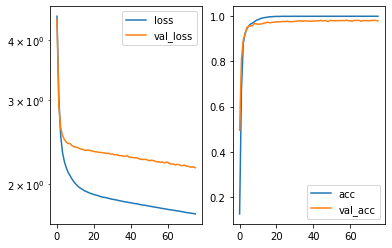

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.43716514]]
True positional value X 0.5
Y [[0.54323494]]
True positional value Y 0.5
H [[0.5157409]]
True positional value H 0.48148148148148145
W [[0.71364903]]
True positional value W 0.7592592592592593


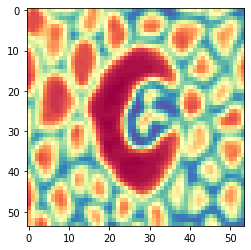

Epoch 77/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7334 - acc: 0.9994 - val_loss: 2.1688 - val_acc: 0.9805

Epoch 00077: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.16877835621766, 'val_acc': 0.9805160681783306, 'loss': 1.7333703052972476, 'acc': 0.9993624576431563, 'lr': 1e-04}


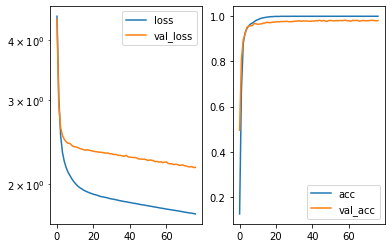

Predicted cell: NonMatureP1 Probability: [[0.9999751]]
True Cell type: NonMatureP1
X [[0.5992082]]
True positional value X 0.5
Y [[0.6179112]]
True positional value Y 0.6851851851851852
H [[0.3702831]]
True positional value H 0.37037037037037035
W [[0.2709806]]
True positional value W 0.2962962962962963


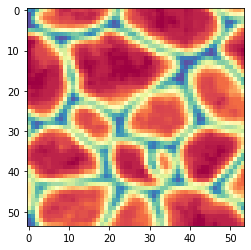

Epoch 78/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7310 - acc: 0.9993 - val_loss: 2.1593 - val_acc: 0.9800

Epoch 00078: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.159336354495225, 'val_acc': 0.9799894778084416, 'loss': 1.730972360330115, 'acc': 0.9993347384102501, 'lr': 1e-04}


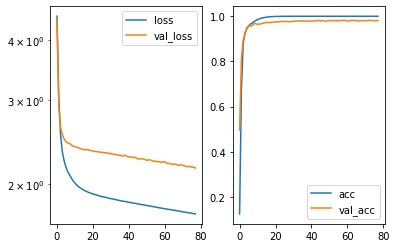

Predicted cell: MatureP1 Probability: [[0.9999988]]
True Cell type: MatureP1
X [[0.341127]]
True positional value X 0.3148148148148148
Y [[0.4646635]]
True positional value Y 0.5
H [[0.53302073]]
True positional value H 0.5
W [[0.30180478]]
True positional value W 0.4074074074074074


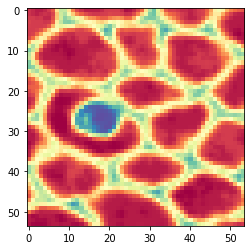

Epoch 79/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7286 - acc: 0.9993 - val_loss: 2.1607 - val_acc: 0.9821

Epoch 00079: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1606953842128935, 'val_acc': 0.9820958455026997, 'loss': 1.7286381909318291, 'acc': 0.9993070191773439, 'lr': 1e-04}


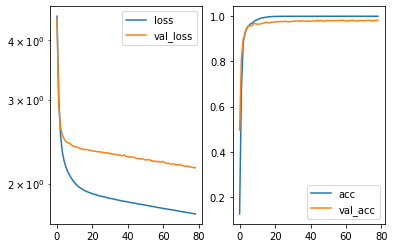

Predicted cell: Normal Probability: [[0.99999785]]
True Cell type: Normal
X [[0.5038241]]
True positional value X 0.5
Y [[0.51469064]]
True positional value Y 0.5
H [[0.4042504]]
True positional value H 0.2962962962962963
W [[0.36483058]]
True positional value W 0.2777777777777778


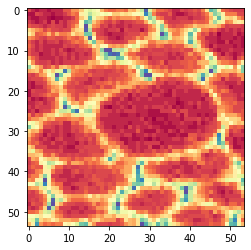

Epoch 80/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7267 - acc: 0.9993 - val_loss: 2.1612 - val_acc: 0.9821

Epoch 00080: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.161156977773529, 'val_acc': 0.9820958486414383, 'loss': 1.7267171461839397, 'acc': 0.9993070191310823, 'lr': 1e-04}


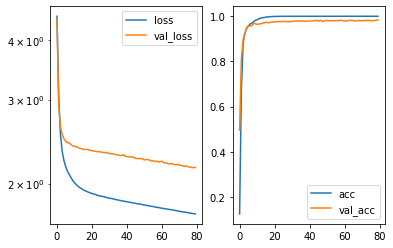

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.49212205]]
True positional value X 0.5
Y [[0.44580027]]
True positional value Y 0.5
H [[0.8112832]]
True positional value H 0.8148148148148148
W [[0.8516764]]
True positional value W 0.8148148148148148


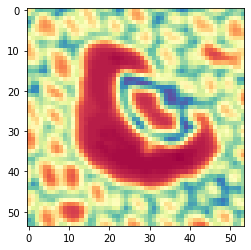

Epoch 81/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7231 - acc: 0.9993 - val_loss: 2.1557 - val_acc: 0.9795

Epoch 00081: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1556795289982236, 'val_acc': 0.9794628843312015, 'loss': 1.7230659317766726, 'acc': 0.9993347384102501, 'lr': 1e-04}


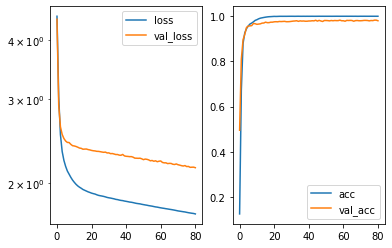

Predicted cell: Normal Probability: [[0.9999937]]
True Cell type: Normal
X [[0.41908285]]
True positional value X 0.5
Y [[0.5942061]]
True positional value Y 0.5
H [[0.30823794]]
True positional value H 0.42592592592592593
W [[0.29760808]]
True positional value W 0.46296296296296297


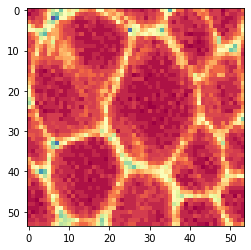

Epoch 82/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7208 - acc: 0.9995 - val_loss: 2.1510 - val_acc: 0.9805

Epoch 00082: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1509762848597442, 'val_acc': 0.980516070249898, 'loss': 1.720812163406894, 'acc': 0.9995010538076876, 'lr': 1e-04}


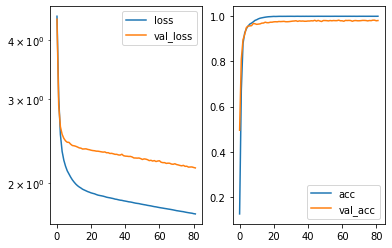

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.68527615]]
True positional value X 0.6851851851851852
Y [[0.5708251]]
True positional value Y 0.5
H [[0.22564173]]
True positional value H 0.25925925925925924
W [[0.24548173]]
True positional value W 0.3148148148148148


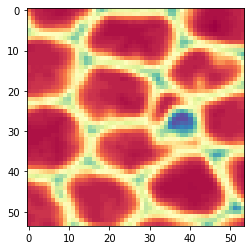

Epoch 83/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7185 - acc: 0.9994 - val_loss: 2.1536 - val_acc: 0.9784

Epoch 00083: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.153624493426684, 'val_acc': 0.978409698412505, 'loss': 1.7184652892908008, 'acc': 0.9994178961089688, 'lr': 1e-04}


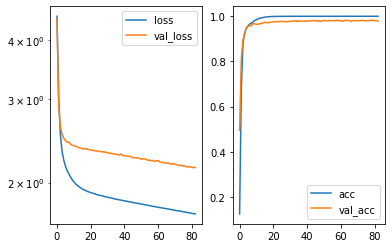

Predicted cell: Normal Probability: [[0.9999988]]
True Cell type: Normal
X [[0.5459464]]
True positional value X 0.5
Y [[0.47678939]]
True positional value Y 0.5
H [[0.2907275]]
True positional value H 0.35185185185185186
W [[0.38304245]]
True positional value W 0.3333333333333333


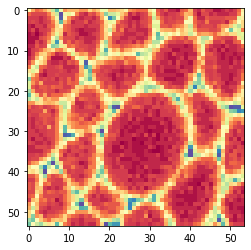

Epoch 84/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7162 - acc: 0.9993 - val_loss: 2.1437 - val_acc: 0.9795

Epoch 00084: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.143744668187186, 'val_acc': 0.97946288746994, 'loss': 1.716226484284114, 'acc': 0.9993070191773439, 'lr': 1e-04}


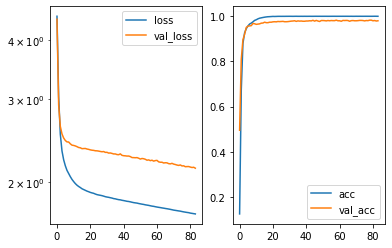

Predicted cell: NonMatureP1 Probability: [[0.8893785]]
True Cell type: NonMatureP1
X [[0.4172388]]
True positional value X 0.6851851851851852
Y [[0.40053216]]
True positional value Y 0.3148148148148148
H [[0.35258132]]
True positional value H 0.3888888888888889
W [[0.42337334]]
True positional value W 0.4444444444444444


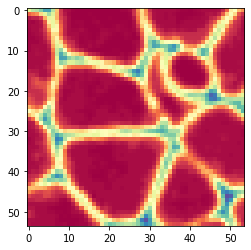

Epoch 85/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7140 - acc: 0.9994 - val_loss: 2.1445 - val_acc: 0.9800

Epoch 00085: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.144502616418293, 'val_acc': 0.9799894767726579, 'loss': 1.7139613526083437, 'acc': 0.9994456153418751, 'lr': 1e-04}


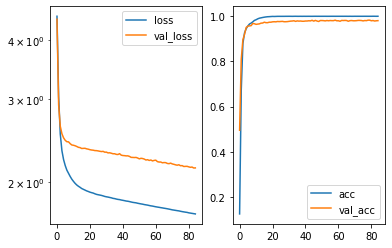

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.50603074]]
True positional value X 0.5
Y [[0.68995667]]
True positional value Y 0.6851851851851852
H [[0.44302458]]
True positional value H 0.4074074074074074
W [[0.563542]]
True positional value W 0.5


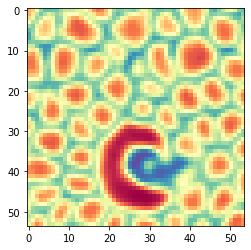

Epoch 86/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7110 - acc: 0.9994 - val_loss: 2.1365 - val_acc: 0.9816

Epoch 00086: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1364853738671292, 'val_acc': 0.9815692572357656, 'loss': 1.7109823847493757, 'acc': 0.9993901768760626, 'lr': 1e-04}


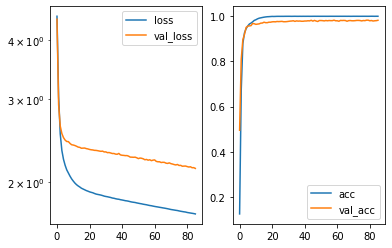

Predicted cell: Normal Probability: [[0.99999714]]
True Cell type: Normal
X [[0.5397322]]
True positional value X 0.5
Y [[0.4770885]]
True positional value Y 0.5
H [[0.57933116]]
True positional value H 0.3888888888888889
W [[0.5127942]]
True positional value W 0.48148148148148145


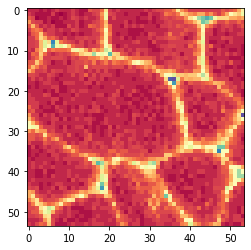

Epoch 87/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7086 - acc: 0.9994 - val_loss: 2.1403 - val_acc: 0.9784

Epoch 00087: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1402649274306778, 'val_acc': 0.9784097015512435, 'loss': 1.7085735232302137, 'acc': 0.9994456153418751, 'lr': 1e-04}


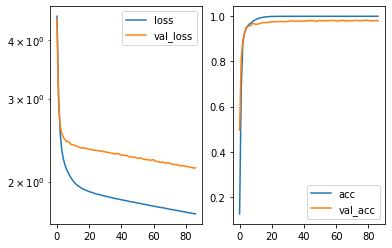

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.7041218]]
True positional value X 0.6851851851851852
Y [[0.3329947]]
True positional value Y 0.3148148148148148
H [[0.5234823]]
True positional value H 0.5185185185185185
W [[0.5175688]]
True positional value W 0.46296296296296297


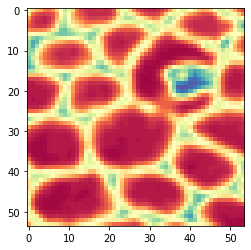

Epoch 88/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7063 - acc: 0.9994 - val_loss: 2.1290 - val_acc: 0.9821

Epoch 00088: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.129042338797643, 'val_acc': 0.982095849677222, 'loss': 1.706341938666354, 'acc': 0.9993624576431563, 'lr': 1e-04}


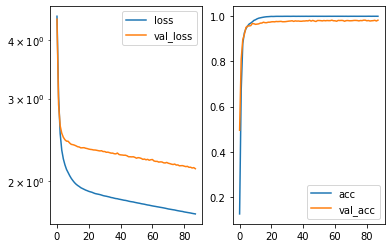

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.426761]]
True positional value X 0.5
Y [[0.2929409]]
True positional value Y 0.3148148148148148
H [[0.43188274]]
True positional value H 0.5
W [[0.3370281]]
True positional value W 0.35185185185185186


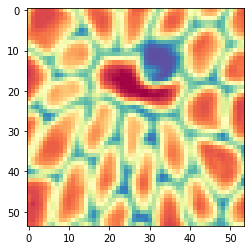

Epoch 89/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7039 - acc: 0.9993 - val_loss: 2.1306 - val_acc: 0.9795

Epoch 00089: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.130561648449689, 'val_acc': 0.97946288746994, 'loss': 1.7039294469143733, 'acc': 0.9992792999444376, 'lr': 1e-04}


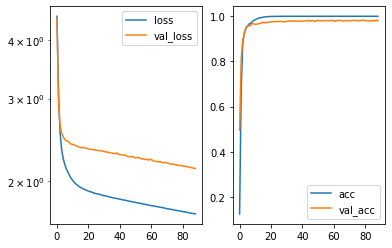

Predicted cell: Normal Probability: [[0.99999976]]
True Cell type: Normal
X [[0.5028722]]
True positional value X 0.5
Y [[0.5495135]]
True positional value Y 0.5
H [[0.41381127]]
True positional value H 0.3333333333333333
W [[0.4286629]]
True positional value W 0.48148148148148145


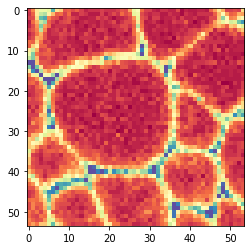

Epoch 90/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7014 - acc: 0.9993 - val_loss: 2.1277 - val_acc: 0.9784

Epoch 00090: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1276964732004884, 'val_acc': 0.9784097025870272, 'loss': 1.701358623972012, 'acc': 0.9992792999444376, 'lr': 1e-04}


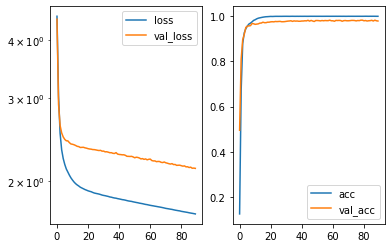

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.4437841]]
True positional value X 0.5
Y [[0.59470356]]
True positional value Y 0.6851851851851852
H [[0.48001468]]
True positional value H 0.4074074074074074
W [[0.46283293]]
True positional value W 0.3888888888888889


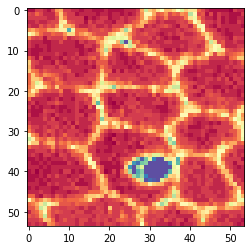

Epoch 91/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6993 - acc: 0.9993 - val_loss: 2.1216 - val_acc: 0.9805

Epoch 00091: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.121608118310359, 'val_acc': 0.9805160692141143, 'loss': 1.69927254697544, 'acc': 0.9993347382450305, 'lr': 1e-04}


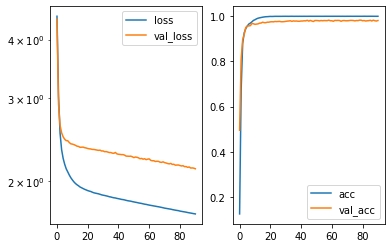

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.2819908]]
True positional value X 0.3148148148148148
Y [[0.509431]]
True positional value Y 0.5
H [[0.30633458]]
True positional value H 0.3888888888888889
W [[0.37990507]]
True positional value W 0.48148148148148145


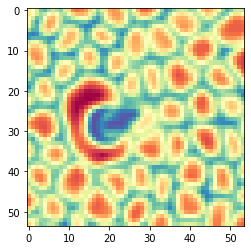

Epoch 92/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6963 - acc: 0.9994 - val_loss: 2.1237 - val_acc: 0.9805

Epoch 00092: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.123654721974699, 'val_acc': 0.9805160754915914, 'loss': 1.696269373008689, 'acc': 0.9993624576431563, 'lr': 1e-04}


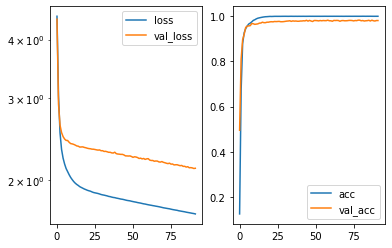

Predicted cell: MatureP1 Probability: [[0.9999819]]
True Cell type: MatureP1
X [[0.48054355]]
True positional value X 0.5
Y [[0.26870248]]
True positional value Y 0.3148148148148148
H [[0.23974828]]
True positional value H 0.24074074074074073
W [[0.26878202]]
True positional value W 0.3148148148148148


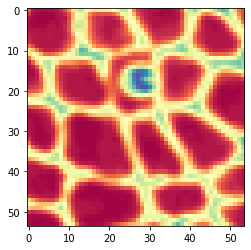

Epoch 93/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6934 - acc: 0.9993 - val_loss: 2.1206 - val_acc: 0.9795

Epoch 00093: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1205765298318084, 'val_acc': 0.9794628832954178, 'loss': 1.6934464305213, 'acc': 0.9992792999444376, 'lr': 1e-04}


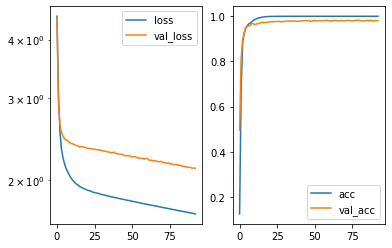

Predicted cell: MatureP1 Probability: [[0.9999578]]
True Cell type: MatureP1
X [[0.56913435]]
True positional value X 0.5
Y [[0.32991648]]
True positional value Y 0.3148148148148148
H [[0.31199068]]
True positional value H 0.25925925925925924
W [[0.28763157]]
True positional value W 0.2962962962962963


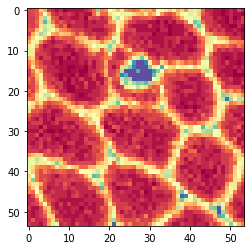

Epoch 94/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6914 - acc: 0.9993 - val_loss: 2.1110 - val_acc: 0.9821

Epoch 00094: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.110964444513507, 'val_acc': 0.982095849677222, 'loss': 1.691406049819859, 'acc': 0.9992792999444376, 'lr': 1e-04}


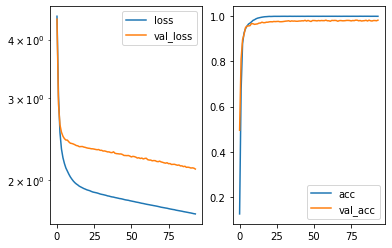

Predicted cell: NonMatureP1 Probability: [[0.9994624]]
True Cell type: NonMatureP1
X [[0.45880914]]
True positional value X 0.5
Y [[0.31784725]]
True positional value Y 0.3148148148148148
H [[0.38366163]]
True positional value H 0.2962962962962963
W [[0.30414453]]
True positional value W 0.2222222222222222


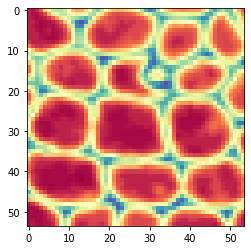

Epoch 95/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6897 - acc: 0.9993 - val_loss: 2.1175 - val_acc: 0.9826

Epoch 00095: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.117473753079921, 'val_acc': 0.9826224452574169, 'loss': 1.6896800945439325, 'acc': 0.9992515807115314, 'lr': 1e-04}


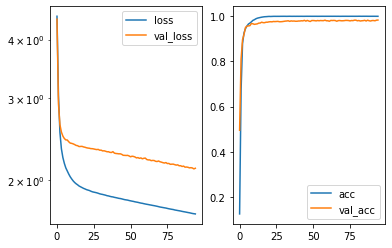

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.67136717]]
True positional value X 0.6851851851851852
Y [[0.5662405]]
True positional value Y 0.5
H [[0.25082928]]
True positional value H 0.24074074074074073
W [[0.40064466]]
True positional value W 0.3148148148148148


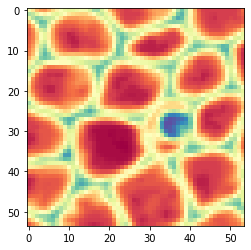

Epoch 96/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6872 - acc: 0.9993 - val_loss: 2.1215 - val_acc: 0.9768

Epoch 00096: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.121523285866286, 'val_acc': 0.9768299179493973, 'loss': 1.6872295214841972, 'acc': 0.9993347384102501, 'lr': 1e-04}


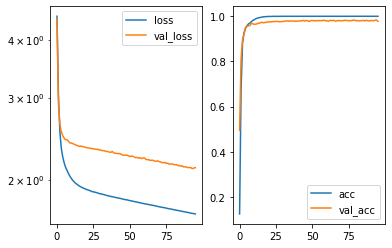

Predicted cell: MatureP1 Probability: [[0.9999752]]
True Cell type: MatureP1
X [[0.5000222]]
True positional value X 0.5
Y [[0.29828167]]
True positional value Y 0.3148148148148148
H [[0.49078894]]
True positional value H 0.3888888888888889
W [[0.57388484]]
True positional value W 0.3888888888888889


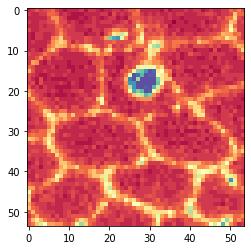

Epoch 97/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6843 - acc: 0.9993 - val_loss: 2.1081 - val_acc: 0.9805

Epoch 00097: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.108118063779553, 'val_acc': 0.9805160692141143, 'loss': 1.6843371762842358, 'acc': 0.9993070191773439, 'lr': 1e-04}


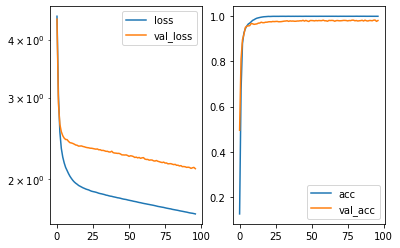

Predicted cell: NonMatureP1 Probability: [[0.9998086]]
True Cell type: NonMatureP1
X [[0.49082142]]
True positional value X 0.5
Y [[0.269334]]
True positional value Y 0.3148148148148148
H [[0.3009314]]
True positional value H 0.37037037037037035
W [[0.38773492]]
True positional value W 0.25925925925925924


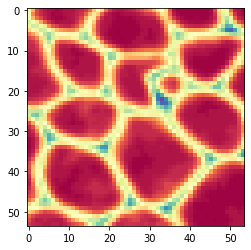

Epoch 98/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6824 - acc: 0.9993 - val_loss: 2.1125 - val_acc: 0.9805

Epoch 00098: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.112523567055074, 'val_acc': 0.9805160692141143, 'loss': 1.682352392870963, 'acc': 0.9993070191773439, 'lr': 1e-04}


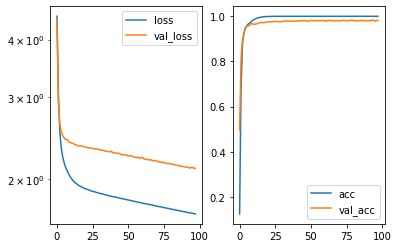

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3285445]]
True positional value X 0.3148148148148148
Y [[0.50890505]]
True positional value Y 0.5
H [[0.60190284]]
True positional value H 0.5925925925925926
W [[0.63603806]]
True positional value W 0.6481481481481481


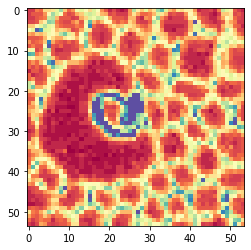

Epoch 99/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6797 - acc: 0.9993 - val_loss: 2.1006 - val_acc: 0.9821

Epoch 00099: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.1005558627351073, 'val_acc': 0.9820958475742672, 'loss': 1.6796766204439573, 'acc': 0.9993347384102501, 'lr': 1e-04}


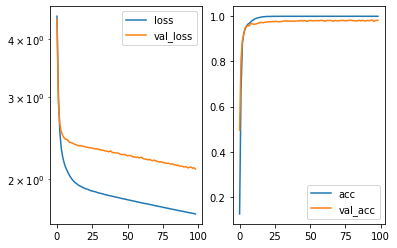

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.49758872]]
True positional value X 0.5
Y [[0.6327275]]
True positional value Y 0.6851851851851852
H [[0.5328516]]
True positional value H 0.4444444444444444
W [[0.6672269]]
True positional value W 0.5185185185185185


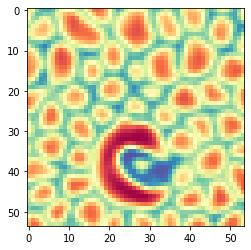

Epoch 100/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6774 - acc: 0.9993 - val_loss: 2.0994 - val_acc: 0.9816

Epoch 00100: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.099386619353935, 'val_acc': 0.9815692572357656, 'loss': 1.6774489637594396, 'acc': 0.9993070191773439, 'lr': 1e-04}


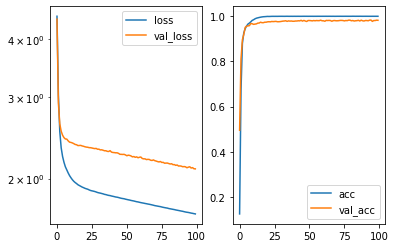

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.38814345]]
True positional value X 0.3148148148148148
Y [[0.445105]]
True positional value Y 0.5
H [[0.3816142]]
True positional value H 0.4444444444444444
W [[0.6520449]]
True positional value W 0.5370370370370371


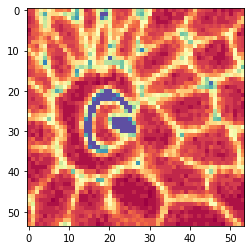

Epoch 101/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6752 - acc: 0.9993 - val_loss: 2.0941 - val_acc: 0.9831

Epoch 00101: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.094116749419483, 'val_acc': 0.9831490345601348, 'loss': 1.6751594126178255, 'acc': 0.9993070191773439, 'lr': 1e-04}


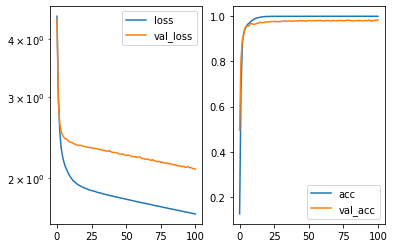

Predicted cell: NonMatureP1 Probability: [[0.9999912]]
True Cell type: NonMatureP1
X [[0.29486018]]
True positional value X 0.3148148148148148
Y [[0.34853053]]
True positional value Y 0.3148148148148148
H [[0.20149088]]
True positional value H 0.3148148148148148
W [[0.14666116]]
True positional value W 0.3148148148148148


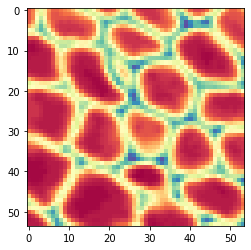

Epoch 102/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6729 - acc: 0.9994 - val_loss: 2.0948 - val_acc: 0.9805

Epoch 00102: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.09475520072704, 'val_acc': 0.9805160692141143, 'loss': 1.6728780010426199, 'acc': 0.9994178961089688, 'lr': 1e-04}


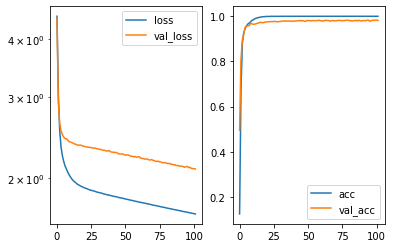

Predicted cell: NonMatureP1 Probability: [[0.9998503]]
True Cell type: NonMatureP1
X [[0.48593053]]
True positional value X 0.3148148148148148
Y [[0.5372191]]
True positional value Y 0.3148148148148148
H [[0.26861992]]
True positional value H 0.2962962962962963
W [[0.5040512]]
True positional value W 0.37037037037037035


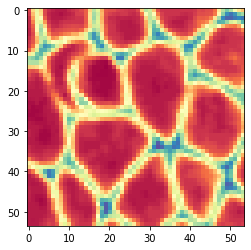

Epoch 103/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6703 - acc: 0.9993 - val_loss: 2.0912 - val_acc: 0.9805

Epoch 00103: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.091203356492262, 'val_acc': 0.980516070249898, 'loss': 1.6703163931144818, 'acc': 0.9993347384102501, 'lr': 1e-04}


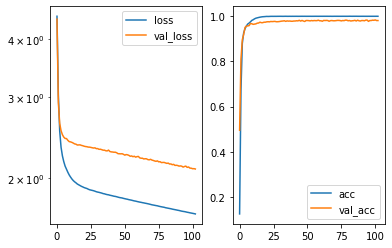

Predicted cell: MacroCheate Probability: [[0.99996316]]
True Cell type: MacroCheate
X [[0.31654444]]
True positional value X 0.3148148148148148
Y [[0.3370602]]
True positional value Y 0.3148148148148148
H [[0.5295665]]
True positional value H 0.46296296296296297
W [[0.63847387]]
True positional value W 0.6481481481481481


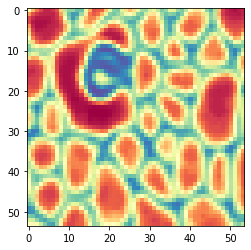

Epoch 104/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6675 - acc: 0.9993 - val_loss: 2.0866 - val_acc: 0.9810

Epoch 00104: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.086612985785727, 'val_acc': 0.9810426647943092, 'loss': 1.6675460754285196, 'acc': 0.9993347384102501, 'lr': 1e-04}


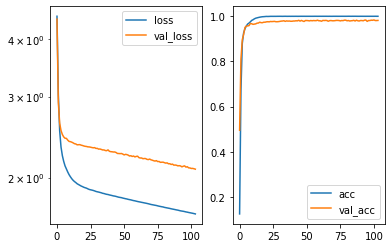

Predicted cell: MatureP1 Probability: [[0.9995409]]
True Cell type: MatureP1
X [[0.741112]]
True positional value X 0.6851851851851852
Y [[0.58370733]]
True positional value Y 0.6851851851851852
H [[0.34839827]]
True positional value H 0.35185185185185186
W [[0.4142341]]
True positional value W 0.3148148148148148


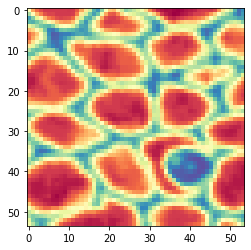

Epoch 105/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6656 - acc: 0.9992 - val_loss: 2.0865 - val_acc: 0.9816

Epoch 00105: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0864676546585943, 'val_acc': 0.9815692561999819, 'loss': 1.6655712993833096, 'acc': 0.9992238614323636, 'lr': 1e-04}


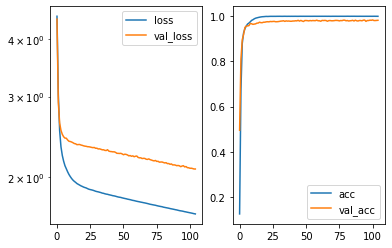

Predicted cell: NonMatureP1 Probability: [[0.9999987]]
True Cell type: NonMatureP1
X [[0.60737735]]
True positional value X 0.5
Y [[0.545172]]
True positional value Y 0.5
H [[0.27031574]]
True positional value H 0.35185185185185186
W [[0.23334645]]
True positional value W 0.24074074074074073


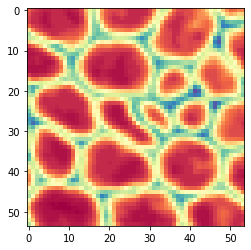

Epoch 106/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6624 - acc: 0.9993 - val_loss: 2.0820 - val_acc: 0.9821

Epoch 00106: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0819951924228115, 'val_acc': 0.9820958486414383, 'loss': 1.6623544147107405, 'acc': 0.9993347384102501, 'lr': 1e-04}


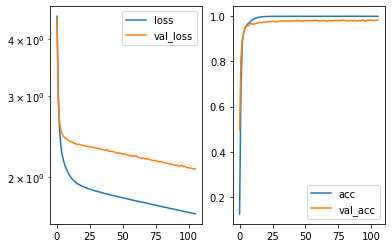

Predicted cell: Normal Probability: [[0.8376457]]
True Cell type: Normal
X [[0.49831206]]
True positional value X 0.5
Y [[0.5347458]]
True positional value Y 0.5
H [[0.444228]]
True positional value H 0.46296296296296297
W [[0.34090716]]
True positional value W 0.3888888888888889


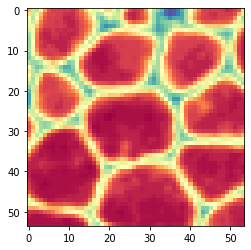

Epoch 107/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6606 - acc: 0.9994 - val_loss: 2.0810 - val_acc: 0.9821

Epoch 00107: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.080972343071189, 'val_acc': 0.982095849677222, 'loss': 1.660647003993529, 'acc': 0.9993624576431563, 'lr': 1e-04}


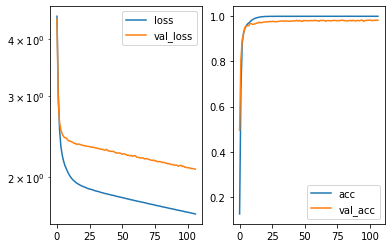

Predicted cell: MacroCheate Probability: [[0.9999968]]
True Cell type: MacroCheate
X [[0.28622448]]
True positional value X 0.3148148148148148
Y [[0.47940037]]
True positional value Y 0.5
H [[0.8746296]]
True positional value H 0.9074074074074074
W [[0.60785335]]
True positional value W 0.6481481481481481


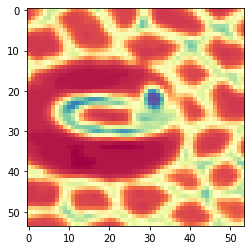

Epoch 108/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6580 - acc: 0.9992 - val_loss: 2.0777 - val_acc: 0.9816

Epoch 00108: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.077718167006185, 'val_acc': 0.9815692593387204, 'loss': 1.6580087240578423, 'acc': 0.9992238614786252, 'lr': 1e-04}


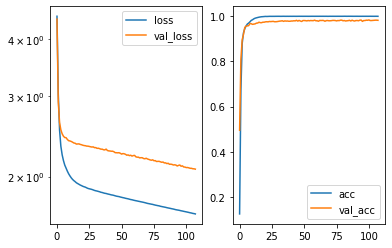

Predicted cell: MacroCheate Probability: [[0.9999777]]
True Cell type: MacroCheate
X [[0.31400615]]
True positional value X 0.3148148148148148
Y [[0.30210012]]
True positional value Y 0.3148148148148148
H [[0.39115447]]
True positional value H 0.5555555555555556
W [[0.5081964]]
True positional value W 0.5925925925925926


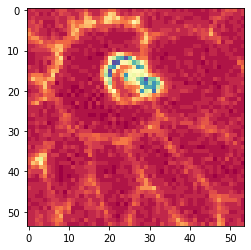

Epoch 109/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6559 - acc: 0.9994 - val_loss: 2.0736 - val_acc: 0.9810

Epoch 00109: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0735924807644444, 'val_acc': 0.9810426626913544, 'loss': 1.655872082575447, 'acc': 0.9993901768760626, 'lr': 1e-04}


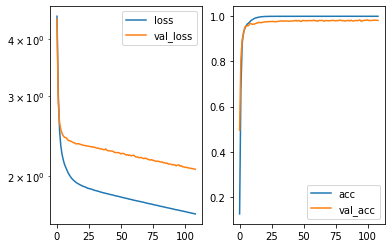

Predicted cell: NonMatureP1 Probability: [[0.9978734]]
True Cell type: NonMatureP1
X [[0.5482441]]
True positional value X 0.5
Y [[0.564576]]
True positional value Y 0.5
H [[0.33912563]]
True positional value H 0.3333333333333333
W [[0.30234563]]
True positional value W 0.24074074074074073


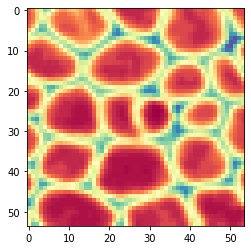

Epoch 110/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6537 - acc: 0.9994 - val_loss: 2.0744 - val_acc: 0.9810

Epoch 00110: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.07439456242144, 'val_acc': 0.981042666897264, 'loss': 1.6537272801802632, 'acc': 0.9993624576431563, 'lr': 1e-04}


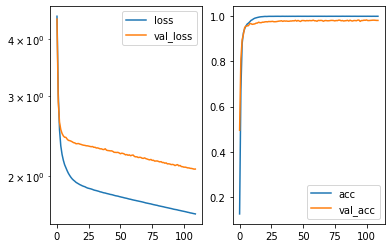

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.29574943]]
True positional value X 0.3148148148148148
Y [[0.710366]]
True positional value Y 0.6851851851851852
H [[0.26427835]]
True positional value H 0.25925925925925924
W [[0.45880747]]
True positional value W 0.37037037037037035


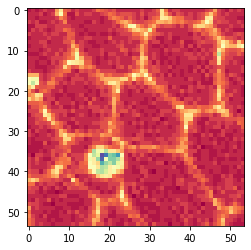

Epoch 111/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6517 - acc: 0.9993 - val_loss: 2.0690 - val_acc: 0.9810

Epoch 00111: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0690277531750896, 'val_acc': 0.9810426616555706, 'loss': 1.6516917609814226, 'acc': 0.9992515807115314, 'lr': 1e-04}


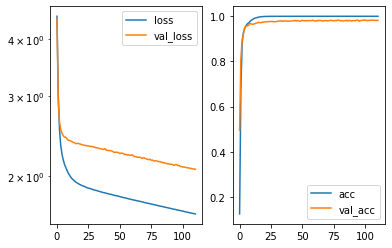

Predicted cell: MatureP1 Probability: [[0.99633515]]
True Cell type: MatureP1
X [[0.6025357]]
True positional value X 0.6851851851851852
Y [[0.62030953]]
True positional value Y 0.6851851851851852
H [[0.35572708]]
True positional value H 0.35185185185185186
W [[0.3972592]]
True positional value W 0.37037037037037035


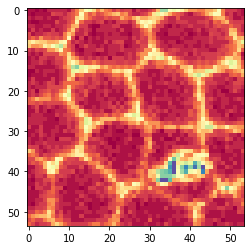

Epoch 112/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6487 - acc: 0.9993 - val_loss: 2.0684 - val_acc: 0.9810

Epoch 00112: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0684225486415886, 'val_acc': 0.9810426647943092, 'loss': 1.6486677662313005, 'acc': 0.9993347384102501, 'lr': 1e-04}


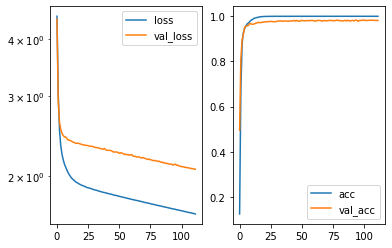

Predicted cell: MacroCheate Probability: [[0.9999664]]
True Cell type: MacroCheate
X [[0.34927416]]
True positional value X 0.3148148148148148
Y [[0.36421582]]
True positional value Y 0.3148148148148148
H [[0.75595725]]
True positional value H 0.8888888888888888
W [[0.6925993]]
True positional value W 0.8148148148148148


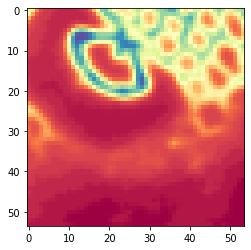

Epoch 113/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6466 - acc: 0.9993 - val_loss: 2.0719 - val_acc: 0.9795

Epoch 00113: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.071949783157461, 'val_acc': 0.9794628843312015, 'loss': 1.6466031775716166, 'acc': 0.9993347384102501, 'lr': 1e-04}


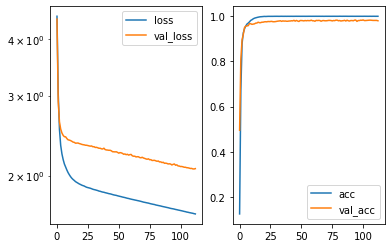

Predicted cell: Normal Probability: [[0.9999993]]
True Cell type: Normal
X [[0.41517064]]
True positional value X 0.5
Y [[0.5544971]]
True positional value Y 0.5
H [[0.37851822]]
True positional value H 0.3333333333333333
W [[0.48523036]]
True positional value W 0.42592592592592593


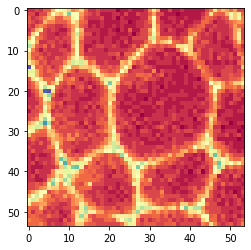

Epoch 114/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6448 - acc: 0.9993 - val_loss: 2.0621 - val_acc: 0.9816

Epoch 00114: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0620773909530117, 'val_acc': 0.9815692603745041, 'loss': 1.6448432273195408, 'acc': 0.9993070191773439, 'lr': 1e-04}


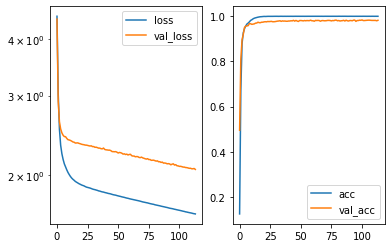

Predicted cell: NonMatureP1 Probability: [[0.99999094]]
True Cell type: NonMatureP1
X [[0.63419515]]
True positional value X 0.6851851851851852
Y [[0.4975952]]
True positional value Y 0.5
H [[0.31674975]]
True positional value H 0.37037037037037035
W [[0.24474943]]
True positional value W 0.25925925925925924


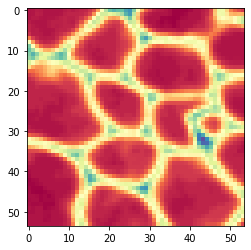

Epoch 115/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6424 - acc: 0.9994 - val_loss: 2.0595 - val_acc: 0.9821

Epoch 00115: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0595143103737654, 'val_acc': 0.9820958475742672, 'loss': 1.6424111800892203, 'acc': 0.9993624576431563, 'lr': 1e-04}


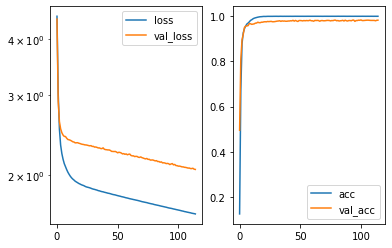

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.7596345]]
True positional value X 0.6851851851851852
Y [[0.71319836]]
True positional value Y 0.6851851851851852
H [[0.24302413]]
True positional value H 0.2777777777777778
W [[0.21337232]]
True positional value W 0.2777777777777778


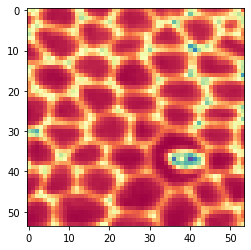

Epoch 116/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6392 - acc: 0.9994 - val_loss: 2.0533 - val_acc: 0.9821

Epoch 00116: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0533435286943256, 'val_acc': 0.9820958475742672, 'loss': 1.6392116638757341, 'acc': 0.9993901768760626, 'lr': 1e-04}


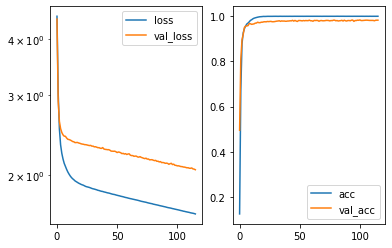

Predicted cell: NonMatureP1 Probability: [[0.99999976]]
True Cell type: NonMatureP1
X [[0.6858635]]
True positional value X 0.6851851851851852
Y [[0.49912196]]
True positional value Y 0.5
H [[0.37038335]]
True positional value H 0.3888888888888889
W [[0.37480024]]
True positional value W 0.35185185185185186


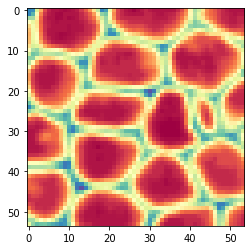

Epoch 117/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6369 - acc: 0.9993 - val_loss: 2.0539 - val_acc: 0.9831

Epoch 00117: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0538531841259995, 'val_acc': 0.9831490366630896, 'loss': 1.6368650467621275, 'acc': 0.9993347384102501, 'lr': 1e-04}


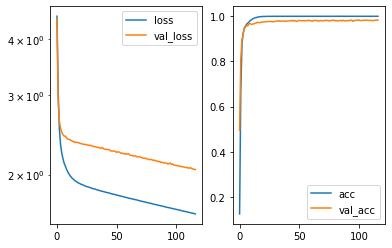

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5492084]]
True positional value X 0.5
Y [[0.45949945]]
True positional value Y 0.5
H [[0.3470614]]
True positional value H 0.2777777777777778
W [[0.41752547]]
True positional value W 0.46296296296296297


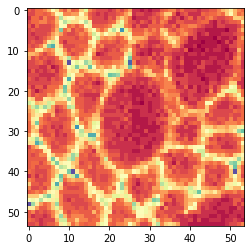

Epoch 118/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6355 - acc: 0.9992 - val_loss: 2.0535 - val_acc: 0.9789

Epoch 00118: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0535193570605577, 'val_acc': 0.9789362918897451, 'loss': 1.6355076943021192, 'acc': 0.9992238614786252, 'lr': 1e-04}


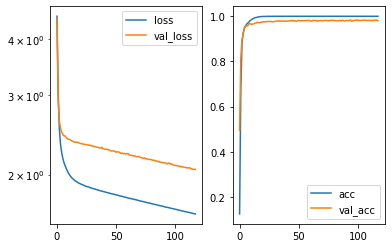

Predicted cell: MatureP1 Probability: [[0.9999958]]
True Cell type: MatureP1
X [[0.37077278]]
True positional value X 0.3148148148148148
Y [[0.3028492]]
True positional value Y 0.3148148148148148
H [[0.41188714]]
True positional value H 0.35185185185185186
W [[0.5251456]]
True positional value W 0.42592592592592593


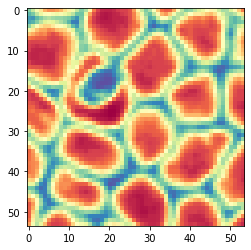

Epoch 119/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6332 - acc: 0.9994 - val_loss: 2.0490 - val_acc: 0.9821

Epoch 00119: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.049006048411429, 'val_acc': 0.9820958486414383, 'loss': 1.6332396654136854, 'acc': 0.9994178961089688, 'lr': 1e-04}


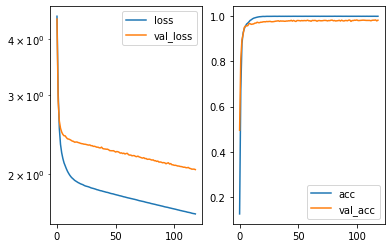

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.66803116]]
True positional value X 0.6851851851851852
Y [[0.5818322]]
True positional value Y 0.6851851851851852
H [[0.46412903]]
True positional value H 0.5
W [[0.4285075]]
True positional value W 0.5370370370370371


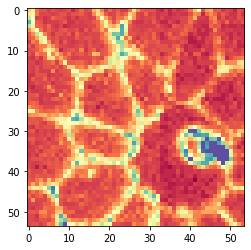

Epoch 120/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6307 - acc: 0.9993 - val_loss: 2.0427 - val_acc: 0.9826

Epoch 00120: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0427214700087175, 'val_acc': 0.9826224431544621, 'loss': 1.6307074133976294, 'acc': 0.9993070191773439, 'lr': 1e-04}


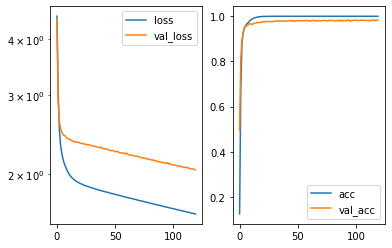

Predicted cell: MatureP1 Probability: [[0.99861646]]
True Cell type: MatureP1
X [[0.6257161]]
True positional value X 0.6851851851851852
Y [[0.5260218]]
True positional value Y 0.5
H [[0.26587296]]
True positional value H 0.5370370370370371
W [[0.35101292]]
True positional value W 0.37037037037037035


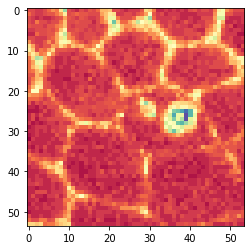

Epoch 121/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6287 - acc: 0.9994 - val_loss: 2.0487 - val_acc: 0.9795

Epoch 00121: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.04872019997768, 'val_acc': 0.9794628843312015, 'loss': 1.628714580442837, 'acc': 0.9994456153418751, 'lr': 1e-04}


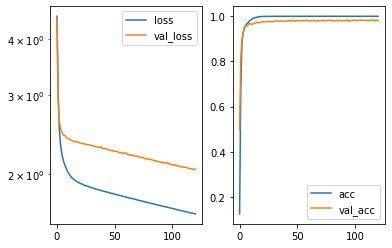

Predicted cell: MatureP1 Probability: [[0.99999833]]
True Cell type: MatureP1
X [[0.6580141]]
True positional value X 0.6851851851851852
Y [[0.30881593]]
True positional value Y 0.3148148148148148
H [[0.43913275]]
True positional value H 0.3333333333333333
W [[0.32585633]]
True positional value W 0.2777777777777778


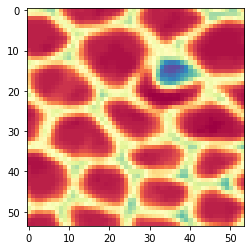

Epoch 122/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6260 - acc: 0.9994 - val_loss: 2.0374 - val_acc: 0.9800

Epoch 00122: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.037380354350463, 'val_acc': 0.9799894767726579, 'loss': 1.6259687825044438, 'acc': 0.9993624576431563, 'lr': 1e-04}


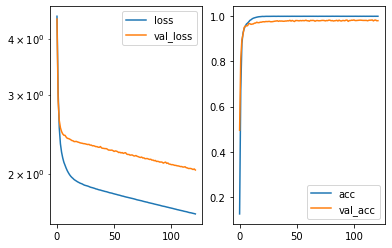

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.6724836]]
True positional value X 0.6851851851851852
Y [[0.61303765]]
True positional value Y 0.6851851851851852
H [[0.21173838]]
True positional value H 0.3148148148148148
W [[0.24668837]]
True positional value W 0.2777777777777778


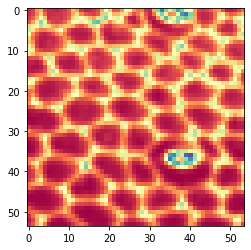

Epoch 123/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6239 - acc: 0.9993 - val_loss: 2.0361 - val_acc: 0.9831

Epoch 00123: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0361428539523203, 'val_acc': 0.9831490366630896, 'loss': 1.6239335304327505, 'acc': 0.9993070191773439, 'lr': 1e-04}


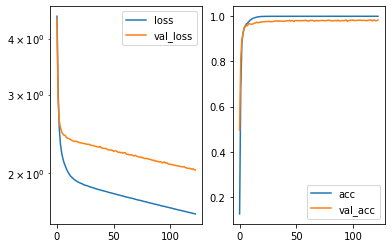

Predicted cell: NonMatureP1 Probability: [[0.9999393]]
True Cell type: NonMatureP1
X [[0.46911037]]
True positional value X 0.6851851851851852
Y [[0.4891817]]
True positional value Y 0.5
H [[0.28356385]]
True positional value H 0.25925925925925924
W [[0.23348239]]
True positional value W 0.24074074074074073


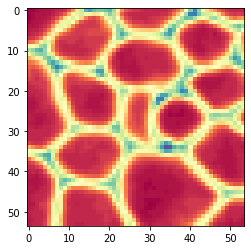

Epoch 124/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6214 - acc: 0.9993 - val_loss: 2.0396 - val_acc: 0.9795

Epoch 00124: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0395941502047314, 'val_acc': 0.9794628832954178, 'loss': 1.6213815920050783, 'acc': 0.9992792999444376, 'lr': 1e-04}


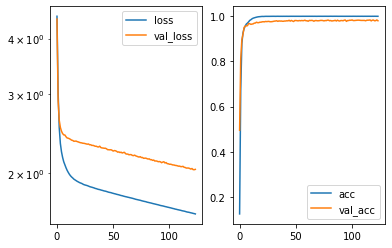

Predicted cell: MatureP1 Probability: [[0.9999989]]
True Cell type: MatureP1
X [[0.7548561]]
True positional value X 0.6851851851851852
Y [[0.46399114]]
True positional value Y 0.5
H [[0.47475553]]
True positional value H 0.3888888888888889
W [[0.42328796]]
True positional value W 0.2777777777777778


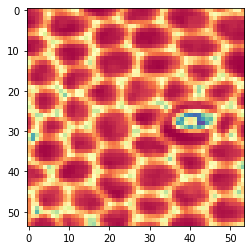

Epoch 125/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6194 - acc: 0.9994 - val_loss: 2.0317 - val_acc: 0.9821

Epoch 00125: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0316542213122553, 'val_acc': 0.9820958486414383, 'loss': 1.6193875317061235, 'acc': 0.9993624576431563, 'lr': 1e-04}


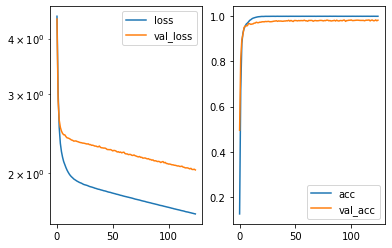

Predicted cell: MatureP1 Probability: [[0.99990594]]
True Cell type: MatureP1
X [[0.6731842]]
True positional value X 0.6851851851851852
Y [[0.3081406]]
True positional value Y 0.3148148148148148
H [[0.25125557]]
True positional value H 0.2222222222222222
W [[0.21797687]]
True positional value W 0.2777777777777778


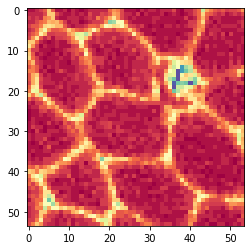

Epoch 126/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6168 - acc: 0.9993 - val_loss: 2.0355 - val_acc: 0.9831

Epoch 00126: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.035531725489258, 'val_acc': 0.9831490345601348, 'loss': 1.6167605823893705, 'acc': 0.9993070191773439, 'lr': 1e-04}


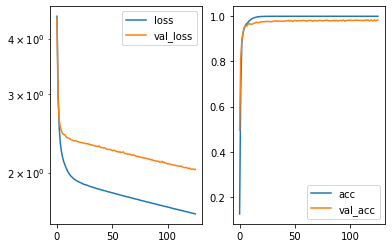

Predicted cell: MacroCheate Probability: [[0.9982577]]
True Cell type: MacroCheate
X [[0.5239911]]
True positional value X 0.5
Y [[0.32930323]]
True positional value Y 0.3148148148148148
H [[0.42124158]]
True positional value H 0.4074074074074074
W [[0.4346664]]
True positional value W 0.48148148148148145


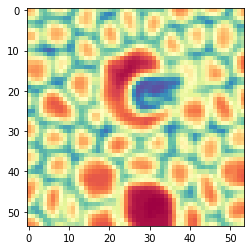

Epoch 127/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6139 - acc: 0.9994 - val_loss: 2.0281 - val_acc: 0.9826

Epoch 00127: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.02807922975963, 'val_acc': 0.9826224410828946, 'loss': 1.6138986864326825, 'acc': 0.9994456153418751, 'lr': 1e-04}


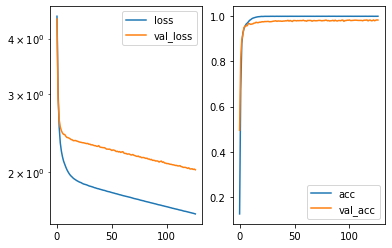

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.63891554]]
True positional value X 0.6851851851851852
Y [[0.35010466]]
True positional value Y 0.3148148148148148
H [[0.25832573]]
True positional value H 0.3333333333333333
W [[0.28009728]]
True positional value W 0.3148148148148148


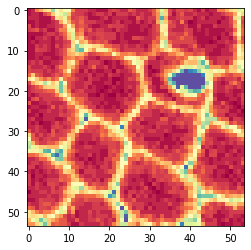

Epoch 128/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6126 - acc: 0.9993 - val_loss: 2.0271 - val_acc: 0.9821

Epoch 00128: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.027051502933874, 'val_acc': 0.982095849677222, 'loss': 1.6126379345113389, 'acc': 0.9993347384102501, 'lr': 1e-04}


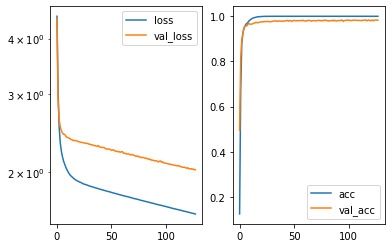

Predicted cell: MatureP1 Probability: [[0.999977]]
True Cell type: MatureP1
X [[0.38791016]]
True positional value X 0.5
Y [[0.31062946]]
True positional value Y 0.3148148148148148
H [[0.55034304]]
True positional value H 0.5555555555555556
W [[0.42857376]]
True positional value W 0.5185185185185185


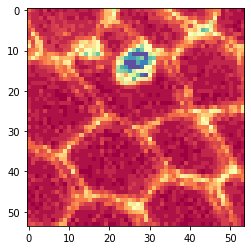

Epoch 129/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6097 - acc: 0.9993 - val_loss: 2.0301 - val_acc: 0.9800

Epoch 00129: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.030125316285409, 'val_acc': 0.9799894757368741, 'loss': 1.609671218734396, 'acc': 0.9992515807115314, 'lr': 1e-04}


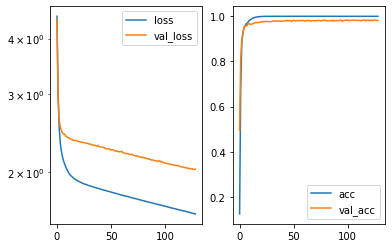

Predicted cell: NonMatureP1 Probability: [[0.9999982]]
True Cell type: NonMatureP1
X [[0.49663013]]
True positional value X 0.5
Y [[0.44443306]]
True positional value Y 0.5
H [[0.39970398]]
True positional value H 0.4074074074074074
W [[0.3220263]]
True positional value W 0.2962962962962963


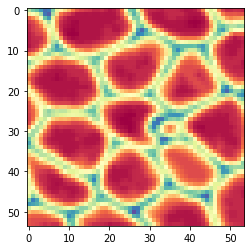

Epoch 130/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6077 - acc: 0.9994 - val_loss: 2.0217 - val_acc: 0.9831

Epoch 00130: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.021680378926434, 'val_acc': 0.983149038734657, 'loss': 1.607747290943081, 'acc': 0.9993624576431563, 'lr': 1e-04}


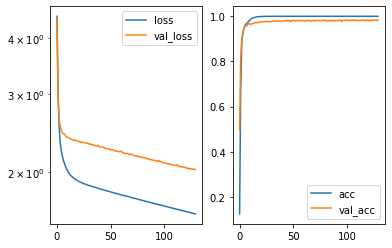

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4268831]]
True positional value X 0.5
Y [[0.5228188]]
True positional value Y 0.5
H [[0.34604746]]
True positional value H 0.18518518518518517
W [[0.39824912]]
True positional value W 0.35185185185185186


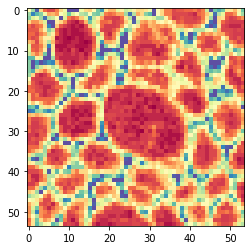

Epoch 131/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6054 - acc: 0.9993 - val_loss: 2.0147 - val_acc: 0.9826

Epoch 00131: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.014749975440501, 'val_acc': 0.9826224431544621, 'loss': 1.6053762867466839, 'acc': 0.9993347384102501, 'lr': 1e-04}


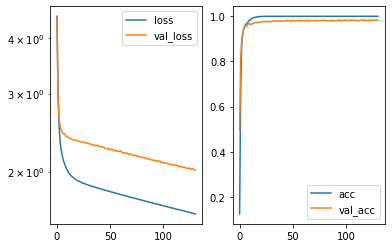

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.53266186]]
True positional value X 0.5
Y [[0.49193096]]
True positional value Y 0.5
H [[0.7597366]]
True positional value H 0.7222222222222222
W [[0.5228996]]
True positional value W 0.42592592592592593


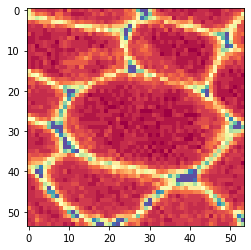

Epoch 132/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6033 - acc: 0.9993 - val_loss: 2.0188 - val_acc: 0.9810

Epoch 00132: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0188195430460323, 'val_acc': 0.981042660619787, 'loss': 1.6033389305034806, 'acc': 0.9992792999444376, 'lr': 1e-04}


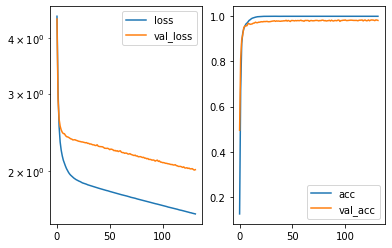

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.76415217]]
True positional value X 0.6851851851851852
Y [[0.3573386]]
True positional value Y 0.3148148148148148
H [[0.5836462]]
True positional value H 0.6851851851851852
W [[0.68268406]]
True positional value W 0.7962962962962963


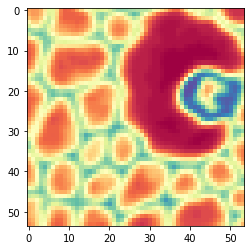

Epoch 133/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6012 - acc: 0.9994 - val_loss: 2.0166 - val_acc: 0.9816

Epoch 00133: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.0166210348572213, 'val_acc': 0.9815692530612433, 'loss': 1.6012387157001997, 'acc': 0.9993624576431563, 'lr': 1e-04}


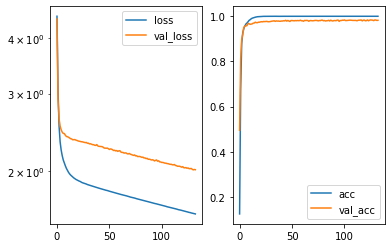

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.50730276]]
True positional value X 0.5
Y [[0.50983256]]
True positional value Y 0.5
H [[0.2266168]]
True positional value H 0.2037037037037037
W [[0.31336695]]
True positional value W 0.25925925925925924


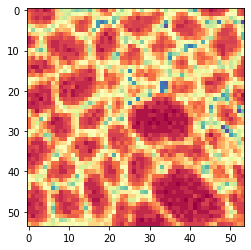

Epoch 134/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5991 - acc: 0.9993 - val_loss: 2.0097 - val_acc: 0.9816

Epoch 00134: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.009730407474793, 'val_acc': 0.9815692582715493, 'loss': 1.5990974567115988, 'acc': 0.9993347384102501, 'lr': 1e-04}


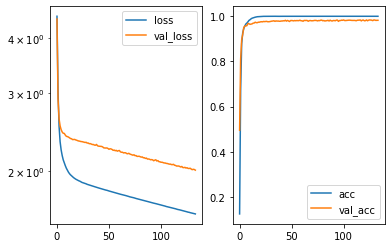

Predicted cell: MatureP1 Probability: [[0.9999982]]
True Cell type: MatureP1
X [[0.2731548]]
True positional value X 0.3148148148148148
Y [[0.34292874]]
True positional value Y 0.3148148148148148
H [[0.41687265]]
True positional value H 0.4074074074074074
W [[0.36853316]]
True positional value W 0.4074074074074074


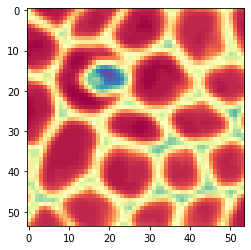

Epoch 135/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5965 - acc: 0.9994 - val_loss: 2.0040 - val_acc: 0.9816

Epoch 00135: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.00403124411022, 'val_acc': 0.9815692572357656, 'loss': 1.5964609025811816, 'acc': 0.9993624576431563, 'lr': 1e-04}


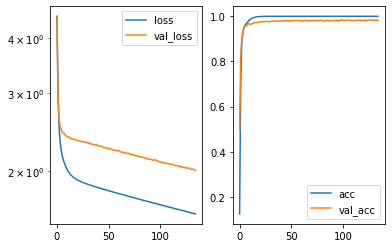

Predicted cell: MacroCheate Probability: [[0.99392784]]
True Cell type: MacroCheate
X [[0.58724]]
True positional value X 0.6851851851851852
Y [[0.32097465]]
True positional value Y 0.3148148148148148
H [[0.43578666]]
True positional value H 0.4074074074074074
W [[0.4517566]]
True positional value W 0.4074074074074074


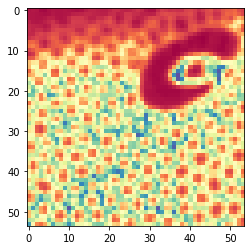

Epoch 136/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5942 - acc: 0.9994 - val_loss: 2.0021 - val_acc: 0.9816

Epoch 00136: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.00212212083464, 'val_acc': 0.981569254097027, 'loss': 1.594209793177316, 'acc': 0.9993624576431563, 'lr': 1e-04}


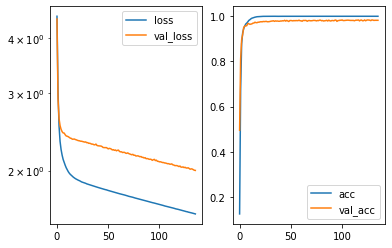

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5449406]]
True positional value X 0.5
Y [[0.6875303]]
True positional value Y 0.6851851851851852
H [[0.5795046]]
True positional value H 0.6111111111111112
W [[0.8582764]]
True positional value W 0.9444444444444444


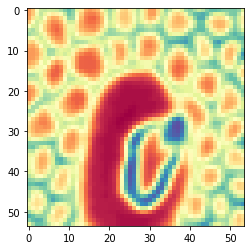

Epoch 137/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5921 - acc: 0.9993 - val_loss: 2.0025 - val_acc: 0.9826

Epoch 00137: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.002535324588834, 'val_acc': 0.9826224442216331, 'loss': 1.5921438286872565, 'acc': 0.9993347384102501, 'lr': 1e-04}


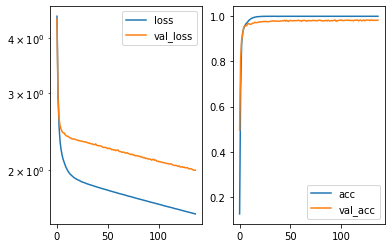

Predicted cell: MatureP1 Probability: [[0.99999917]]
True Cell type: MatureP1
X [[0.3440199]]
True positional value X 0.3148148148148148
Y [[0.66519237]]
True positional value Y 0.6851851851851852
H [[0.5327711]]
True positional value H 0.5185185185185185
W [[0.39305538]]
True positional value W 0.5185185185185185


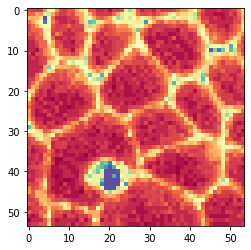

Epoch 138/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5900 - acc: 0.9993 - val_loss: 2.0070 - val_acc: 0.9784

Epoch 00138: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 2.007038654811512, 'val_acc': 0.9784096931708116, 'loss': 1.5900211486891482, 'acc': 0.9993070191773439, 'lr': 1e-04}


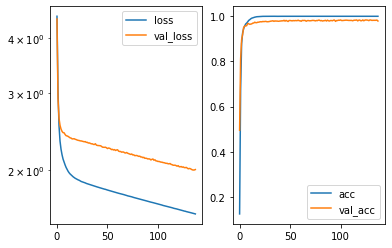

Predicted cell: MacroCheate Probability: [[0.9999609]]
True Cell type: MacroCheate
X [[0.7464453]]
True positional value X 0.6851851851851852
Y [[0.69132006]]
True positional value Y 0.6851851851851852
H [[0.33734357]]
True positional value H 0.3333333333333333
W [[0.30820248]]
True positional value W 0.35185185185185186


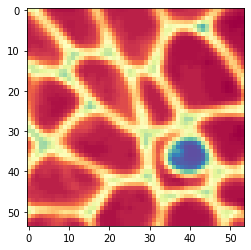

Epoch 139/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5881 - acc: 0.9994 - val_loss: 1.9974 - val_acc: 0.9810

Epoch 00139: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9973520646288623, 'val_acc': 0.9810426647943092, 'loss': 1.5881267819598637, 'acc': 0.9993901768298011, 'lr': 1e-04}


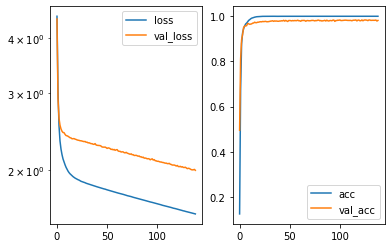

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.49062172]]
True positional value X 0.5
Y [[0.61487895]]
True positional value Y 0.6851851851851852
H [[0.21348146]]
True positional value H 0.3148148148148148
W [[0.27524862]]
True positional value W 0.2777777777777778


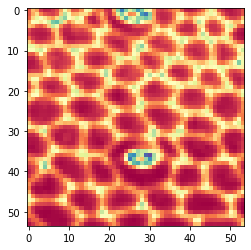

Epoch 140/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5856 - acc: 0.9992 - val_loss: 1.9942 - val_acc: 0.9821

Epoch 00140: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9942187001166563, 'val_acc': 0.9820958528159605, 'loss': 1.5855973077357006, 'acc': 0.999196142245719, 'lr': 1e-04}


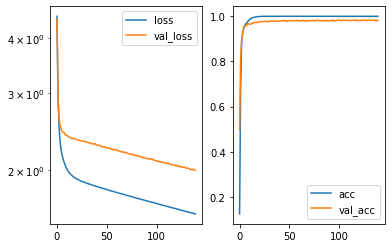

Predicted cell: NonMatureP1 Probability: [[0.9999999]]
True Cell type: NonMatureP1
X [[0.71826863]]
True positional value X 0.6851851851851852
Y [[0.3886855]]
True positional value Y 0.3148148148148148
H [[0.4990739]]
True positional value H 0.3148148148148148
W [[0.40716735]]
True positional value W 0.3333333333333333


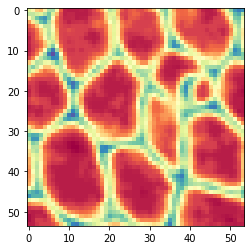

Epoch 141/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5833 - acc: 0.9992 - val_loss: 1.9975 - val_acc: 0.9816

Epoch 00141: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9974659956901433, 'val_acc': 0.9815692561999819, 'loss': 1.5833490293773291, 'acc': 0.999196142245719, 'lr': 1e-04}


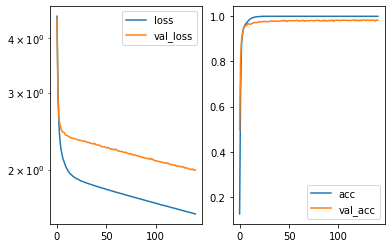

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6288527]]
True positional value X 0.6851851851851852
Y [[0.745997]]
True positional value Y 0.6851851851851852
H [[0.48914158]]
True positional value H 0.46296296296296297
W [[0.8198856]]
True positional value W 0.7592592592592593


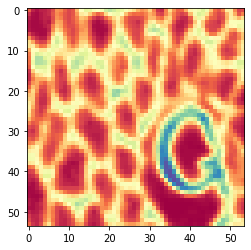

Epoch 142/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5814 - acc: 0.9992 - val_loss: 1.9894 - val_acc: 0.9816

Epoch 00142: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9893581794399284, 'val_acc': 0.9815692582715493, 'loss': 1.58137329324728, 'acc': 0.999196142245719, 'lr': 1e-04}


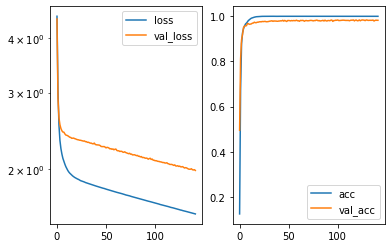

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.527357]]
True positional value X 0.5
Y [[0.3266294]]
True positional value Y 0.3148148148148148
H [[0.2775175]]
True positional value H 0.2962962962962963
W [[0.35537767]]
True positional value W 0.3333333333333333


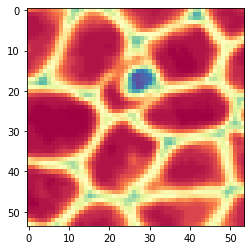

Epoch 143/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5791 - acc: 0.9993 - val_loss: 1.9858 - val_acc: 0.9821

Epoch 00143: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9858068085269216, 'val_acc': 0.9820958486414383, 'loss': 1.5790541822860875, 'acc': 0.9992515807115314, 'lr': 1e-04}


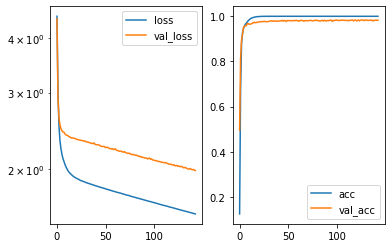

Predicted cell: MatureP1 Probability: [[0.99878305]]
True Cell type: MatureP1
X [[0.4223359]]
True positional value X 0.3148148148148148
Y [[0.35298795]]
True positional value Y 0.3148148148148148
H [[0.40645504]]
True positional value H 0.5925925925925926
W [[0.36767483]]
True positional value W 0.5555555555555556


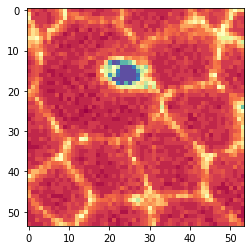

Epoch 144/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5769 - acc: 0.9994 - val_loss: 1.9833 - val_acc: 0.9810

Epoch 00144: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9832941925858372, 'val_acc': 0.9810426647943092, 'loss': 1.5769121223125717, 'acc': 0.9993624576431563, 'lr': 1e-04}


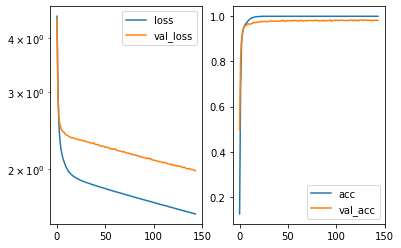

Predicted cell: NonMatureP1 Probability: [[0.99999607]]
True Cell type: NonMatureP1
X [[0.33903092]]
True positional value X 0.3148148148148148
Y [[0.528341]]
True positional value Y 0.5
H [[0.40304056]]
True positional value H 0.3333333333333333
W [[0.3481961]]
True positional value W 0.3148148148148148


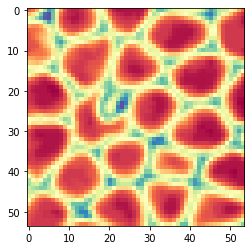

Epoch 145/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5749 - acc: 0.9993 - val_loss: 1.9835 - val_acc: 0.9826

Epoch 00145: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9834735909532786, 'val_acc': 0.9826224442216331, 'loss': 1.5748567879629554, 'acc': 0.9993347384102501, 'lr': 1e-04}


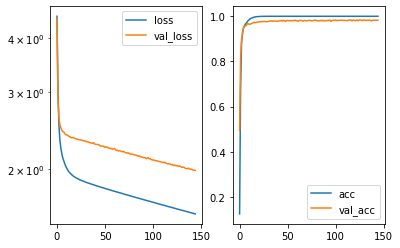

Predicted cell: MatureP1 Probability: [[0.9985044]]
True Cell type: MatureP1
X [[0.6974107]]
True positional value X 0.6851851851851852
Y [[0.33185822]]
True positional value Y 0.3148148148148148
H [[0.45614183]]
True positional value H 0.3888888888888889
W [[0.39583248]]
True positional value W 0.3888888888888889


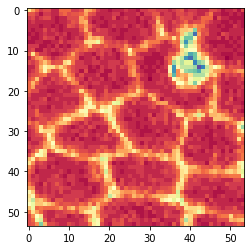

Epoch 146/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5722 - acc: 0.9994 - val_loss: 1.9771 - val_acc: 0.9810

Epoch 00146: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9770623407218255, 'val_acc': 0.9810426616555706, 'loss': 1.5721848782262222, 'acc': 0.9993624576431563, 'lr': 1e-04}


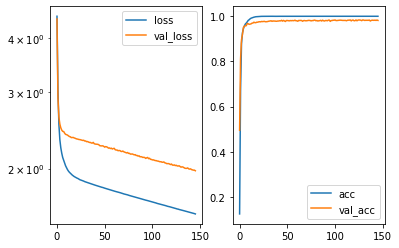

Predicted cell: MatureP1 Probability: [[0.98822635]]
True Cell type: MatureP1
X [[0.6683601]]
True positional value X 0.6851851851851852
Y [[0.40232575]]
True positional value Y 0.5
H [[0.491161]]
True positional value H 0.4074074074074074
W [[0.41069955]]
True positional value W 0.5


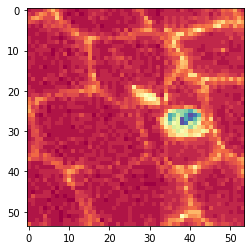

Epoch 147/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5702 - acc: 0.9993 - val_loss: 1.9747 - val_acc: 0.9821

Epoch 00147: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9747294075178936, 'val_acc': 0.982095849677222, 'loss': 1.5702169983439072, 'acc': 0.9992792999444376, 'lr': 1e-04}


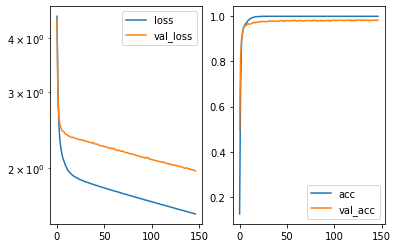

Predicted cell: MacroCheate Probability: [[0.9995253]]
True Cell type: MacroCheate
X [[0.75099516]]
True positional value X 0.6851851851851852
Y [[0.70130134]]
True positional value Y 0.6851851851851852
H [[0.336572]]
True positional value H 0.3333333333333333
W [[0.31296962]]
True positional value W 0.35185185185185186


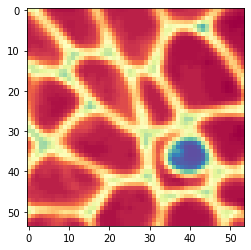

Epoch 148/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5681 - acc: 0.9993 - val_loss: 1.9761 - val_acc: 0.9826

Epoch 00148: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9761179290739344, 'val_acc': 0.9826224431544621, 'loss': 1.5681353383429604, 'acc': 0.9993347384102501, 'lr': 1e-04}


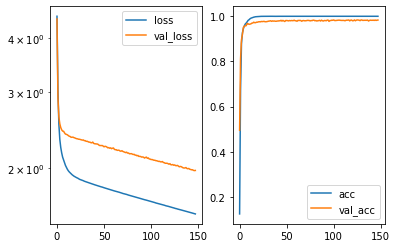

Predicted cell: NonMatureP1 Probability: [[0.99999785]]
True Cell type: NonMatureP1
X [[0.7079501]]
True positional value X 0.6851851851851852
Y [[0.25091177]]
True positional value Y 0.3148148148148148
H [[0.3770718]]
True positional value H 0.3888888888888889
W [[0.30412328]]
True positional value W 0.35185185185185186


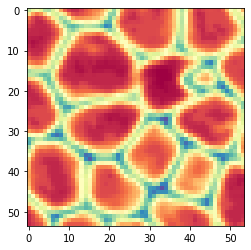

Epoch 149/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5660 - acc: 0.9993 - val_loss: 1.9680 - val_acc: 0.9821

Epoch 00149: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.968017160923874, 'val_acc': 0.982095849677222, 'loss': 1.5659800127507155, 'acc': 0.9993347384102501, 'lr': 1e-04}


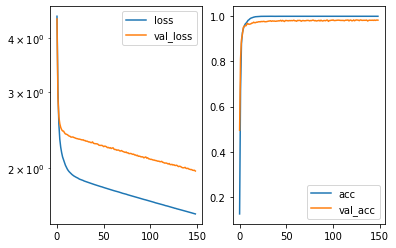

Predicted cell: MatureP1 Probability: [[0.9999995]]
True Cell type: MatureP1
X [[0.6487818]]
True positional value X 0.6851851851851852
Y [[0.6712566]]
True positional value Y 0.6851851851851852
H [[0.20504631]]
True positional value H 0.25925925925925924
W [[0.22062238]]
True positional value W 0.25925925925925924


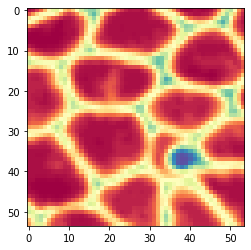

Epoch 150/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5634 - acc: 0.9994 - val_loss: 1.9713 - val_acc: 0.9821

Epoch 00150: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.971346529739163, 'val_acc': 0.9820958507130056, 'loss': 1.5634275228065984, 'acc': 0.9993624575968949, 'lr': 1e-04}


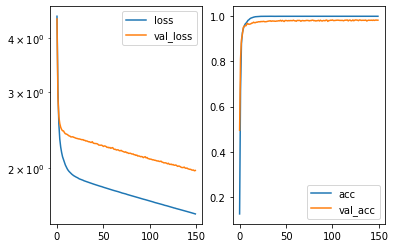

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.66112864]]
True positional value X 0.6851851851851852
Y [[0.65178716]]
True positional value Y 0.6851851851851852
H [[0.778168]]
True positional value H 0.6296296296296297
W [[0.7569792]]
True positional value W 0.6111111111111112


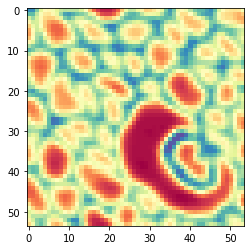

Epoch 151/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5612 - acc: 0.9993 - val_loss: 1.9642 - val_acc: 0.9810

Epoch 00151: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9642057161446682, 'val_acc': 0.9810426616555706, 'loss': 1.5612411503120884, 'acc': 0.9992515807115314, 'lr': 1e-04}


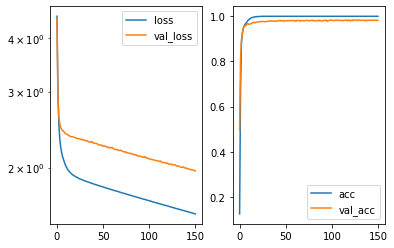

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.32599315]]
True positional value X 0.3148148148148148
Y [[0.7364826]]
True positional value Y 0.6851851851851852
H [[0.41136056]]
True positional value H 0.37037037037037035
W [[0.52920026]]
True positional value W 0.4074074074074074


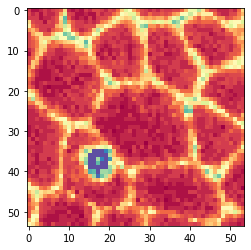

Epoch 152/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5591 - acc: 0.9993 - val_loss: 1.9623 - val_acc: 0.9837

Epoch 00152: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9622860998150673, 'val_acc': 0.9836756311761133, 'loss': 1.5591320189473792, 'acc': 0.9993070191773439, 'lr': 1e-04}


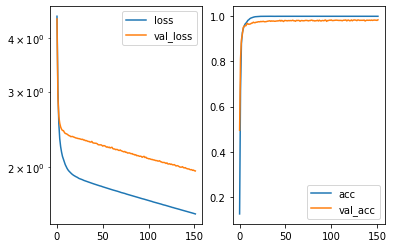

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.45587903]]
True positional value X 0.5
Y [[0.35852456]]
True positional value Y 0.3148148148148148
H [[0.44351763]]
True positional value H 0.42592592592592593
W [[0.3603354]]
True positional value W 0.3333333333333333


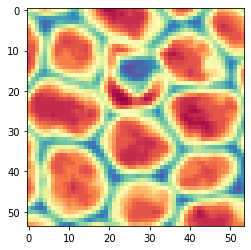

Epoch 153/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5578 - acc: 0.9992 - val_loss: 1.9609 - val_acc: 0.9831

Epoch 00153: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.960938024545984, 'val_acc': 0.9831490324571799, 'loss': 1.5578122206518847, 'acc': 0.9991684229665512, 'lr': 1e-04}


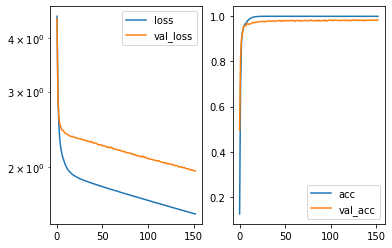

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.69362664]]
True positional value X 0.6851851851851852
Y [[0.5607973]]
True positional value Y 0.5
H [[0.21331516]]
True positional value H 0.25925925925925924
W [[0.24812086]]
True positional value W 0.3148148148148148


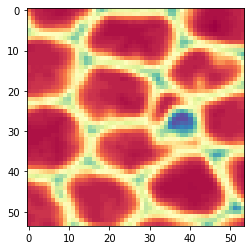

Epoch 154/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5549 - acc: 0.9993 - val_loss: 1.9572 - val_acc: 0.9826

Epoch 00154: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9572221805950163, 'val_acc': 0.9826224400157235, 'loss': 1.554912340100423, 'acc': 0.9992515807115314, 'lr': 1e-04}


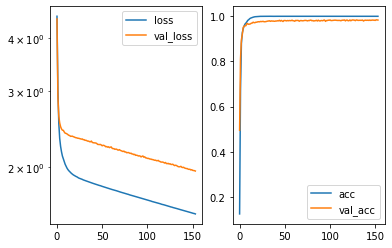

Predicted cell: MatureP1 Probability: [[0.99998975]]
True Cell type: MatureP1
X [[0.31520692]]
True positional value X 0.3148148148148148
Y [[0.31701815]]
True positional value Y 0.3148148148148148
H [[0.3861813]]
True positional value H 0.3888888888888889
W [[0.4062919]]
True positional value W 0.35185185185185186


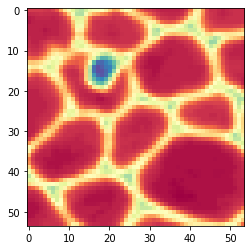

Epoch 155/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5529 - acc: 0.9993 - val_loss: 1.9606 - val_acc: 0.9810

Epoch 00155: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.960553047467433, 'val_acc': 0.9810426626913544, 'loss': 1.5528651892920795, 'acc': 0.9993070191773439, 'lr': 1e-04}


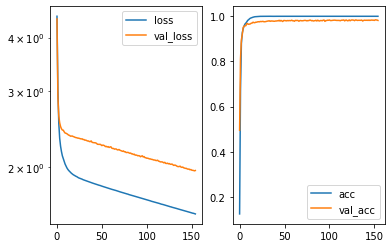

Predicted cell: Normal Probability: [[0.99999523]]
True Cell type: Normal
X [[0.4595152]]
True positional value X 0.5
Y [[0.5005684]]
True positional value Y 0.5
H [[0.410694]]
True positional value H 0.3888888888888889
W [[0.3950491]]
True positional value W 0.4074074074074074


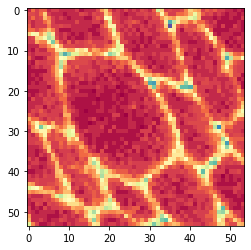

Epoch 156/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5512 - acc: 0.9993 - val_loss: 1.9531 - val_acc: 0.9826

Epoch 00156: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9531304833762202, 'val_acc': 0.9826224389799398, 'loss': 1.551232065801835, 'acc': 0.9993070191773439, 'lr': 1e-04}


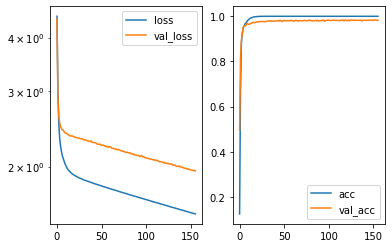

Predicted cell: MatureP1 Probability: [[0.99999845]]
True Cell type: MatureP1
X [[0.26087624]]
True positional value X 0.3148148148148148
Y [[0.6943687]]
True positional value Y 0.6851851851851852
H [[0.2640109]]
True positional value H 0.2777777777777778
W [[0.31663573]]
True positional value W 0.2777777777777778


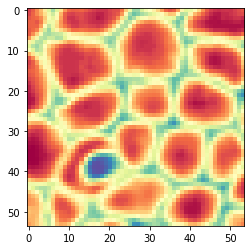

Epoch 157/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5489 - acc: 0.9991 - val_loss: 1.9506 - val_acc: 0.9810

Epoch 00157: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.95055646429318, 'val_acc': 0.9810426647943092, 'loss': 1.5488743967882532, 'acc': 0.9991407037799064, 'lr': 1e-04}


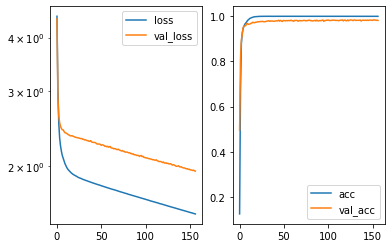

Predicted cell: MatureP1 Probability: [[0.9999738]]
True Cell type: MatureP1
X [[0.2971034]]
True positional value X 0.3148148148148148
Y [[0.28239265]]
True positional value Y 0.3148148148148148
H [[0.23967339]]
True positional value H 0.35185185185185186
W [[0.29989934]]
True positional value W 0.37037037037037035


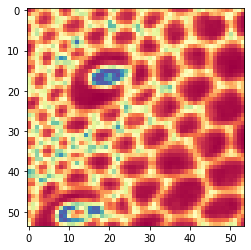

Epoch 158/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5465 - acc: 0.9993 - val_loss: 1.9563 - val_acc: 0.9816

Epoch 00158: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9562756573293887, 'val_acc': 0.9815692603745041, 'loss': 1.5465288570654447, 'acc': 0.9993347384102501, 'lr': 1e-04}


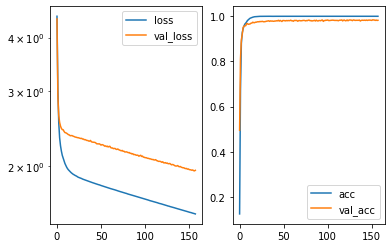

Predicted cell: MatureP1 Probability: [[0.99999344]]
True Cell type: MatureP1
X [[0.50244373]]
True positional value X 0.5
Y [[0.57715946]]
True positional value Y 0.5
H [[0.30722302]]
True positional value H 0.3148148148148148
W [[0.36680818]]
True positional value W 0.35185185185185186


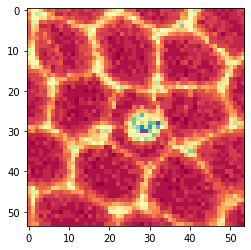

Epoch 159/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5440 - acc: 0.9993 - val_loss: 1.9433 - val_acc: 0.9831

Epoch 00159: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.943282015766829, 'val_acc': 0.983149033524351, 'loss': 1.5440369504877198, 'acc': 0.9992792999444376, 'lr': 1e-04}


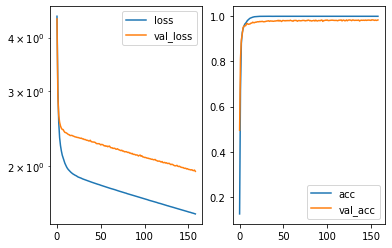

Predicted cell: MatureP1 Probability: [[0.9999974]]
True Cell type: MatureP1
X [[0.6563175]]
True positional value X 0.6851851851851852
Y [[0.25378817]]
True positional value Y 0.3148148148148148
H [[0.34463164]]
True positional value H 0.3888888888888889
W [[0.32066834]]
True positional value W 0.37037037037037035


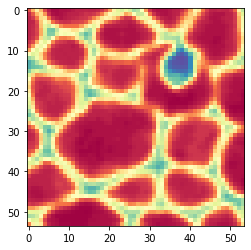

Epoch 160/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5422 - acc: 0.9993 - val_loss: 1.9489 - val_acc: 0.9821

Epoch 00160: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9489268372723025, 'val_acc': 0.982095849677222, 'loss': 1.5421545363302598, 'acc': 0.9992792999444376, 'lr': 1e-04}


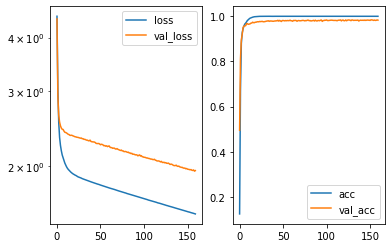

Predicted cell: Normal Probability: [[0.9850146]]
True Cell type: Normal
X [[0.60186267]]
True positional value X 0.5
Y [[0.573474]]
True positional value Y 0.5
H [[0.20999673]]
True positional value H 0.25925925925925924
W [[0.26767734]]
True positional value W 0.2962962962962963


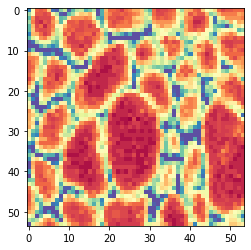

Epoch 161/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5402 - acc: 0.9993 - val_loss: 1.9399 - val_acc: 0.9810

Epoch 00161: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9398865940823187, 'val_acc': 0.9810426616555706, 'loss': 1.5401615004328537, 'acc': 0.9992792999444376, 'lr': 1e-04}


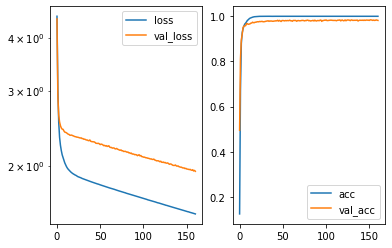

Predicted cell: NonMatureP1 Probability: [[0.9999933]]
True Cell type: NonMatureP1
X [[0.33582246]]
True positional value X 0.3148148148148148
Y [[0.3240267]]
True positional value Y 0.3148148148148148
H [[0.34680754]]
True positional value H 0.46296296296296297
W [[0.35542572]]
True positional value W 0.5


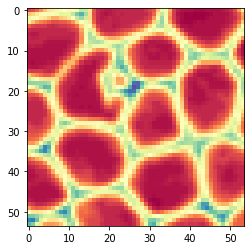

Epoch 162/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5380 - acc: 0.9992 - val_loss: 1.9356 - val_acc: 0.9826

Epoch 00162: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9356229722091811, 'val_acc': 0.9826224400157235, 'loss': 1.5379676252210308, 'acc': 0.999196142245719, 'lr': 1e-04}


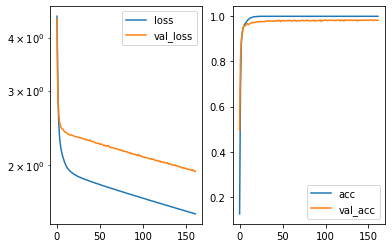

Predicted cell: MacroCheate Probability: [[0.9999995]]
True Cell type: MacroCheate
X [[0.53592825]]
True positional value X 0.5
Y [[0.49997202]]
True positional value Y 0.5
H [[0.51031065]]
True positional value H 0.46296296296296297
W [[0.31159282]]
True positional value W 0.42592592592592593


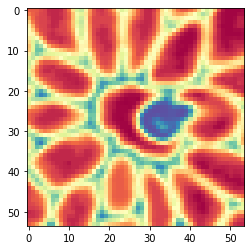

Epoch 163/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5360 - acc: 0.9993 - val_loss: 1.9362 - val_acc: 0.9831

Epoch 00163: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9362340296112028, 'val_acc': 0.9831490345601348, 'loss': 1.535975866365861, 'acc': 0.9993070191773439, 'lr': 1e-04}


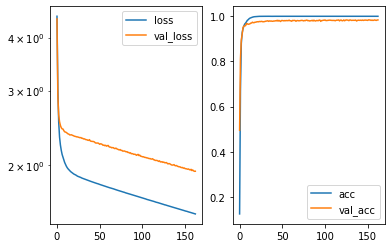

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.7070432]]
True positional value X 0.6851851851851852
Y [[0.5017905]]
True positional value Y 0.5
H [[0.49700353]]
True positional value H 0.4444444444444444
W [[0.3975775]]
True positional value W 0.3888888888888889


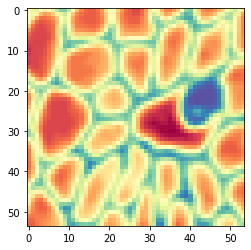

Epoch 164/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5343 - acc: 0.9994 - val_loss: 1.9346 - val_acc: 0.9810

Epoch 00164: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9345536325529038, 'val_acc': 0.9810426637585254, 'loss': 1.5343013379827335, 'acc': 0.9994178961089688, 'lr': 1e-04}


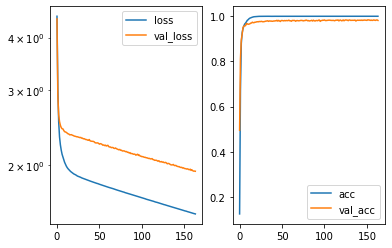

Predicted cell: MatureP1 Probability: [[0.9999995]]
True Cell type: MatureP1
X [[0.3532699]]
True positional value X 0.3148148148148148
Y [[0.60719484]]
True positional value Y 0.6851851851851852
H [[0.25434458]]
True positional value H 0.3333333333333333
W [[0.19991899]]
True positional value W 0.35185185185185186


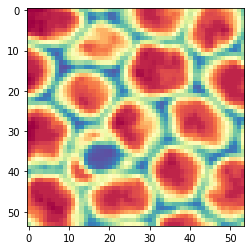

Epoch 165/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5317 - acc: 0.9993 - val_loss: 1.9309 - val_acc: 0.9821

Epoch 00165: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.930915889267924, 'val_acc': 0.982095849677222, 'loss': 1.531694959108522, 'acc': 0.9993070191773439, 'lr': 1e-04}


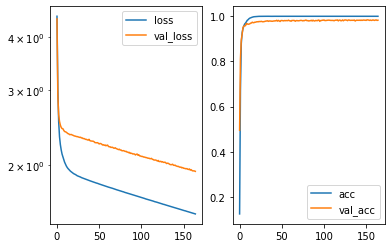

Predicted cell: NonMatureP1 Probability: [[0.95915234]]
True Cell type: NonMatureP1
X [[0.43000937]]
True positional value X 0.6851851851851852
Y [[0.41083488]]
True positional value Y 0.3148148148148148
H [[0.3439827]]
True positional value H 0.3888888888888889
W [[0.4155261]]
True positional value W 0.4444444444444444


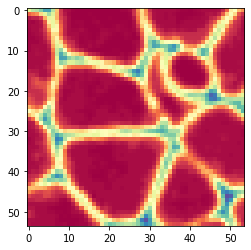

Epoch 166/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5297 - acc: 0.9993 - val_loss: 1.9301 - val_acc: 0.9826

Epoch 00166: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9301254622493058, 'val_acc': 0.9826224462932006, 'loss': 1.5296714471361699, 'acc': 0.9992792999444376, 'lr': 1e-04}


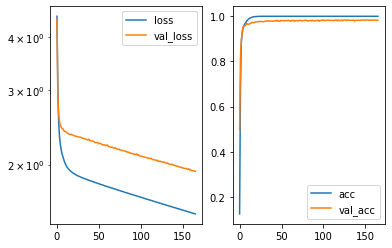

Predicted cell: NonMatureP1 Probability: [[0.9999995]]
True Cell type: NonMatureP1
X [[0.2687243]]
True positional value X 0.3148148148148148
Y [[0.4862154]]
True positional value Y 0.5
H [[0.51497364]]
True positional value H 0.46296296296296297
W [[0.34159303]]
True positional value W 0.3333333333333333


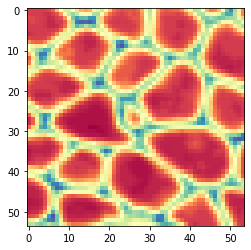

Epoch 167/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5277 - acc: 0.9993 - val_loss: 1.9329 - val_acc: 0.9800

Epoch 00167: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9329103222013837, 'val_acc': 0.9799894788756127, 'loss': 1.5276622825087087, 'acc': 0.9993347384102501, 'lr': 1e-04}


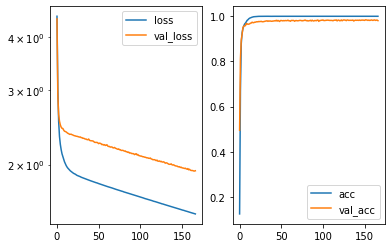

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.30889654]]
True positional value X 0.3148148148148148
Y [[0.314521]]
True positional value Y 0.3148148148148148
H [[0.40343386]]
True positional value H 0.3888888888888889
W [[0.49826485]]
True positional value W 0.4074074074074074


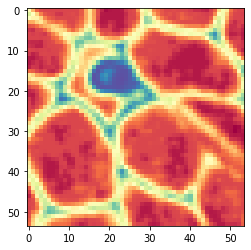

Epoch 168/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5254 - acc: 0.9993 - val_loss: 1.9254 - val_acc: 0.9810

Epoch 00168: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9254044288079823, 'val_acc': 0.9810426679330477, 'loss': 1.5254469400684616, 'acc': 0.9993070191773439, 'lr': 1e-04}


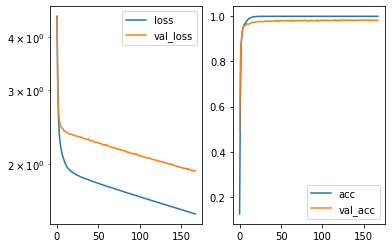

Predicted cell: MacroCheate Probability: [[0.9877325]]
True Cell type: MacroCheate
X [[0.29154918]]
True positional value X 0.3148148148148148
Y [[0.28977814]]
True positional value Y 0.3148148148148148
H [[0.42319775]]
True positional value H 0.3888888888888889
W [[0.49905205]]
True positional value W 0.48148148148148145


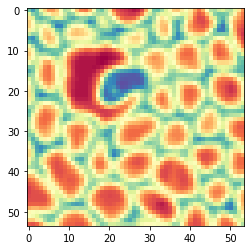

Epoch 169/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5235 - acc: 0.9993 - val_loss: 1.9221 - val_acc: 0.9826

Epoch 00169: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.922149419219573, 'val_acc': 0.9826224421186783, 'loss': 1.523502899189061, 'acc': 0.9993070191773439, 'lr': 1e-04}


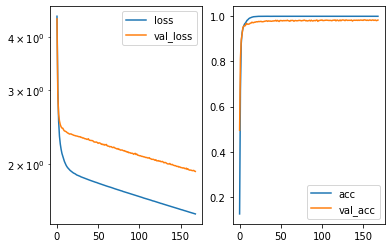

Predicted cell: MatureP1 Probability: [[0.9999678]]
True Cell type: MatureP1
X [[0.49081224]]
True positional value X 0.5
Y [[0.3254051]]
True positional value Y 0.3148148148148148
H [[0.4230222]]
True positional value H 0.48148148148148145
W [[0.40781227]]
True positional value W 0.35185185185185186


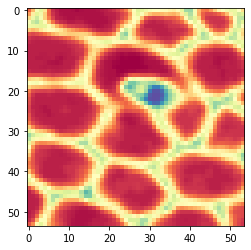

Epoch 170/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5218 - acc: 0.9992 - val_loss: 1.9196 - val_acc: 0.9810

Epoch 00170: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9195582366981527, 'val_acc': 0.9810426647943092, 'loss': 1.521763191306151, 'acc': 0.9992238614786252, 'lr': 1e-04}


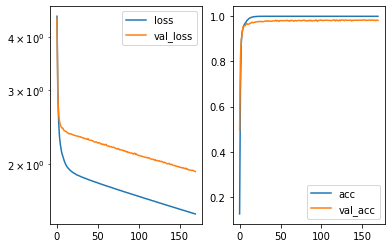

Predicted cell: NonMatureP1 Probability: [[0.96766573]]
True Cell type: NonMatureP1
X [[0.6483257]]
True positional value X 0.6851851851851852
Y [[0.34314662]]
True positional value Y 0.3148148148148148
H [[0.46540445]]
True positional value H 0.42592592592592593
W [[0.36702996]]
True positional value W 0.2222222222222222


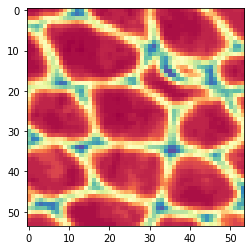

Epoch 171/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5198 - acc: 0.9994 - val_loss: 1.9262 - val_acc: 0.9831

Epoch 00171: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.926230819178858, 'val_acc': 0.9831490345601348, 'loss': 1.5198253916589102, 'acc': 0.9993624576431563, 'lr': 1e-04}


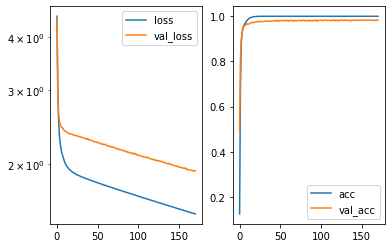

Predicted cell: MatureP1 Probability: [[0.99999905]]
True Cell type: MatureP1
X [[0.6565679]]
True positional value X 0.6851851851851852
Y [[0.6212582]]
True positional value Y 0.6851851851851852
H [[0.28648052]]
True positional value H 0.3333333333333333
W [[0.27691102]]
True positional value W 0.3148148148148148


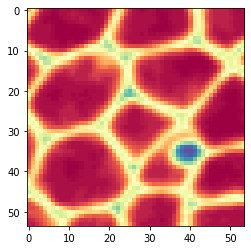

Epoch 172/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5177 - acc: 0.9994 - val_loss: 1.9177 - val_acc: 0.9800

Epoch 00172: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9176800897587218, 'val_acc': 0.9799894788756127, 'loss': 1.5177479196459216, 'acc': 0.9993901768760626, 'lr': 1e-04}


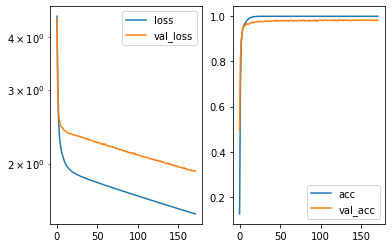

Predicted cell: MatureP1 Probability: [[0.9999995]]
True Cell type: MatureP1
X [[0.55224067]]
True positional value X 0.5
Y [[0.34669292]]
True positional value Y 0.3148148148148148
H [[0.3318336]]
True positional value H 0.24074074074074073
W [[0.38032618]]
True positional value W 0.2962962962962963


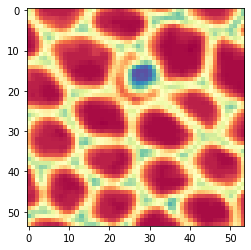

Epoch 173/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5150 - acc: 0.9993 - val_loss: 1.9125 - val_acc: 0.9826

Epoch 00173: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.912474983927449, 'val_acc': 0.9826224431544621, 'loss': 1.5149596963122807, 'acc': 0.9993347384102501, 'lr': 1e-04}


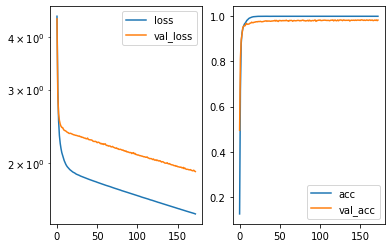

Predicted cell: MacroCheate Probability: [[0.99999905]]
True Cell type: MacroCheate
X [[0.3186763]]
True positional value X 0.3148148148148148
Y [[0.59453726]]
True positional value Y 0.5
H [[0.66087496]]
True positional value H 0.8703703703703703
W [[0.4830826]]
True positional value W 0.5


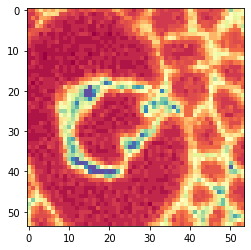

Epoch 174/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5128 - acc: 0.9995 - val_loss: 1.9121 - val_acc: 0.9826

Epoch 00174: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9121140887575314, 'val_acc': 0.9826224421186783, 'loss': 1.5128290412801109, 'acc': 0.9994733345747814, 'lr': 1e-04}


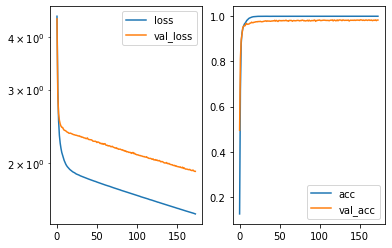

Predicted cell: MacroCheate Probability: [[0.9998086]]
True Cell type: MacroCheate
X [[0.48119333]]
True positional value X 0.3148148148148148
Y [[0.26196587]]
True positional value Y 0.3148148148148148
H [[0.71128255]]
True positional value H 0.9444444444444444
W [[0.69231945]]
True positional value W 0.5


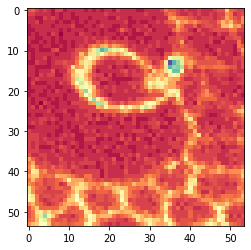

Epoch 175/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5107 - acc: 0.9993 - val_loss: 1.9060 - val_acc: 0.9842

Epoch 00175: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9059996568510067, 'val_acc': 0.9842022184072639, 'loss': 1.5107439482657499, 'acc': 0.9992792999444376, 'lr': 1e-04}


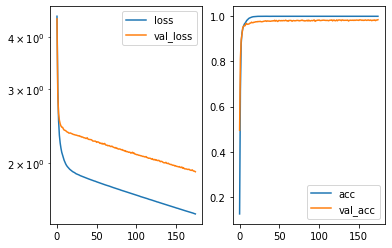

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.29740196]]
True positional value X 0.3148148148148148
Y [[0.63710916]]
True positional value Y 0.6851851851851852
H [[0.43488115]]
True positional value H 0.35185185185185186
W [[0.82229996]]
True positional value W 0.6296296296296297


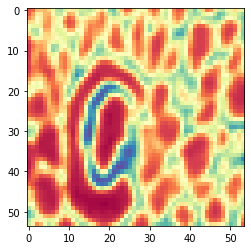

Epoch 176/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5089 - acc: 0.9994 - val_loss: 1.9101 - val_acc: 0.9837

Epoch 00176: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.910114747213652, 'val_acc': 0.9836756301403297, 'loss': 1.5088734035019282, 'acc': 0.9993901768760626, 'lr': 1e-04}


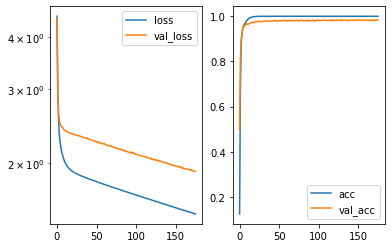

Predicted cell: NonMatureP1 Probability: [[0.99999094]]
True Cell type: NonMatureP1
X [[0.6330374]]
True positional value X 0.6851851851851852
Y [[0.6644076]]
True positional value Y 0.6851851851851852
H [[0.39468616]]
True positional value H 0.37037037037037035
W [[0.3938668]]
True positional value W 0.4074074074074074


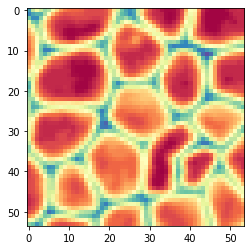

Epoch 177/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5066 - acc: 0.9993 - val_loss: 1.9024 - val_acc: 0.9816

Epoch 00177: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9023507743712913, 'val_acc': 0.9815692561999819, 'loss': 1.5065890005256348, 'acc': 0.9993347384102501, 'lr': 1e-04}


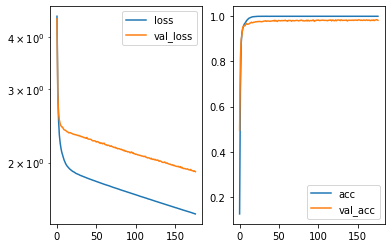

Predicted cell: MacroCheate Probability: [[0.9999968]]
True Cell type: MacroCheate
X [[0.39427644]]
True positional value X 0.3148148148148148
Y [[0.4283674]]
True positional value Y 0.5
H [[0.53181475]]
True positional value H 0.6296296296296297
W [[0.4748523]]
True positional value W 0.6666666666666666


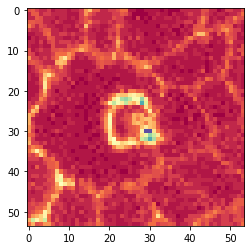

Epoch 178/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5044 - acc: 0.9993 - val_loss: 1.8985 - val_acc: 0.9800

Epoch 00178: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8984946270501255, 'val_acc': 0.9799894767726579, 'loss': 1.5044278176717212, 'acc': 0.9993347384102501, 'lr': 1e-04}


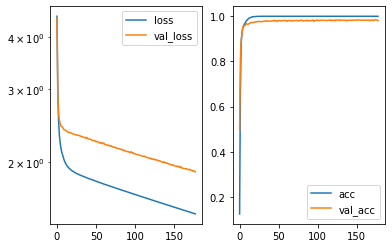

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.48235294]]
True positional value X 0.5
Y [[0.53916323]]
True positional value Y 0.5
H [[0.22765282]]
True positional value H 0.2222222222222222
W [[0.21451503]]
True positional value W 0.2037037037037037


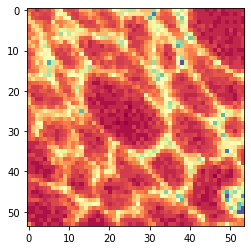

Epoch 179/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5023 - acc: 0.9994 - val_loss: 1.9044 - val_acc: 0.9816

Epoch 00179: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9044333663094728, 'val_acc': 0.981569254097027, 'loss': 1.5023231796737733, 'acc': 0.9993901768760626, 'lr': 1e-04}


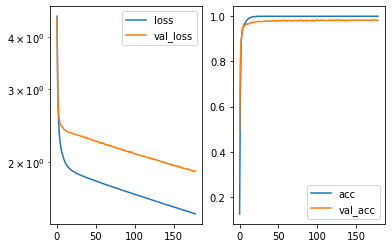

Predicted cell: Normal Probability: [[0.9977805]]
True Cell type: Normal
X [[0.529838]]
True positional value X 0.5
Y [[0.48355973]]
True positional value Y 0.5
H [[0.27107865]]
True positional value H 0.2962962962962963
W [[0.44611648]]
True positional value W 0.3333333333333333


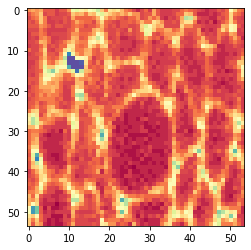

Epoch 180/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5007 - acc: 0.9994 - val_loss: 1.8968 - val_acc: 0.9821

Epoch 00180: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.896823963157248, 'val_acc': 0.982095849677222, 'loss': 1.500729581788686, 'acc': 0.9993624576431563, 'lr': 1e-04}


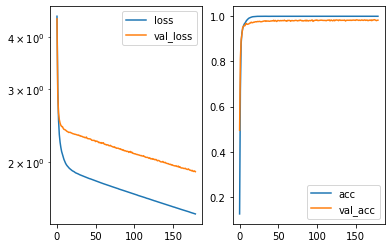

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.33516997]]
True positional value X 0.3148148148148148
Y [[0.719995]]
True positional value Y 0.6851851851851852
H [[0.30620524]]
True positional value H 0.2962962962962963
W [[0.2927301]]
True positional value W 0.2962962962962963


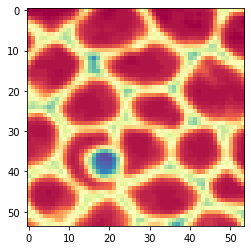

Epoch 181/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4981 - acc: 0.9995 - val_loss: 1.8972 - val_acc: 0.9810

Epoch 00181: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8972225571507337, 'val_acc': 0.9810426647943092, 'loss': 1.498060568854872, 'acc': 0.9995010538076876, 'lr': 1e-04}


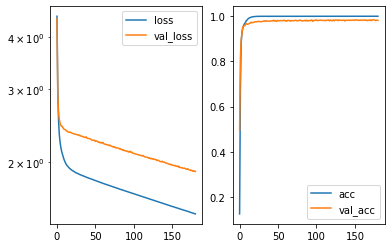

Predicted cell: MatureP1 Probability: [[0.99976474]]
True Cell type: MatureP1
X [[0.49384964]]
True positional value X 0.5
Y [[0.5024134]]
True positional value Y 0.5
H [[0.37633055]]
True positional value H 0.4444444444444444
W [[0.44189823]]
True positional value W 0.4444444444444444


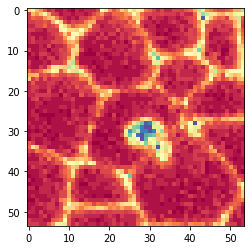

Epoch 182/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4964 - acc: 0.9993 - val_loss: 1.8889 - val_acc: 0.9826

Epoch 00182: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8888887286248992, 'val_acc': 0.9826224400157235, 'loss': 1.4964326943932464, 'acc': 0.9992515806652699, 'lr': 1e-04}


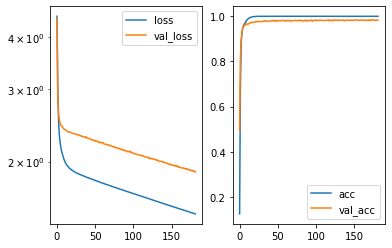

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.25781673]]
True positional value X 0.3148148148148148
Y [[0.64696556]]
True positional value Y 0.6851851851851852
H [[0.43686372]]
True positional value H 0.4444444444444444
W [[0.4374885]]
True positional value W 0.35185185185185186


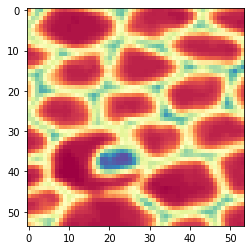

Epoch 183/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4941 - acc: 0.9994 - val_loss: 1.9001 - val_acc: 0.9816

Epoch 00183: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.9001167606466252, 'val_acc': 0.9815692614102879, 'loss': 1.4940574375353073, 'acc': 0.9993901768760626, 'lr': 1e-04}


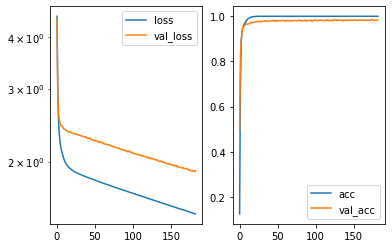

Predicted cell: MacroCheate Probability: [[0.99995804]]
True Cell type: MacroCheate
X [[0.4364479]]
True positional value X 0.5
Y [[0.5200451]]
True positional value Y 0.5
H [[0.3519847]]
True positional value H 0.2222222222222222
W [[0.364214]]
True positional value W 0.2222222222222222


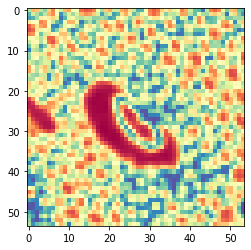

Epoch 184/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4924 - acc: 0.9993 - val_loss: 1.8872 - val_acc: 0.9821

Epoch 00184: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8871616634210202, 'val_acc': 0.9820958507130056, 'loss': 1.4923966666232298, 'acc': 0.9993070191773439, 'lr': 1e-04}


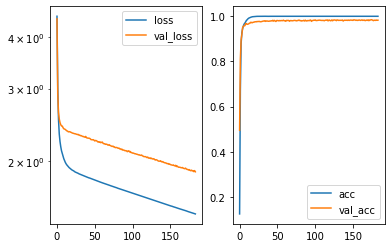

Predicted cell: MacroCheate Probability: [[0.9999933]]
True Cell type: MacroCheate
X [[0.32879764]]
True positional value X 0.3148148148148148
Y [[0.6350595]]
True positional value Y 0.5
H [[0.30613276]]
True positional value H 0.5185185185185185
W [[0.68529767]]
True positional value W 0.8703703703703703


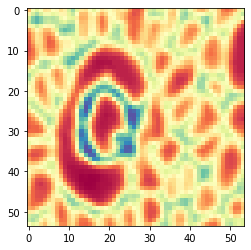

Epoch 185/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4901 - acc: 0.9994 - val_loss: 1.8870 - val_acc: 0.9821

Epoch 00185: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8870166852136485, 'val_acc': 0.982095849677222, 'loss': 1.490079428235236, 'acc': 0.9994456153418751, 'lr': 1e-04}


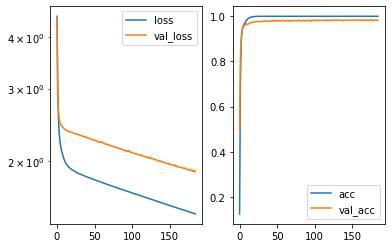

Predicted cell: MatureP1 Probability: [[0.9974076]]
True Cell type: MatureP1
X [[0.37540472]]
True positional value X 0.3148148148148148
Y [[0.5076618]]
True positional value Y 0.5
H [[0.60732913]]
True positional value H 0.46296296296296297
W [[0.5000872]]
True positional value W 0.4444444444444444


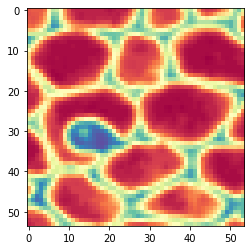

Epoch 186/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4884 - acc: 0.9993 - val_loss: 1.8810 - val_acc: 0.9826

Epoch 00186: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.880985592527726, 'val_acc': 0.9826224379441562, 'loss': 1.4883949078957355, 'acc': 0.9992515807115314, 'lr': 1e-04}


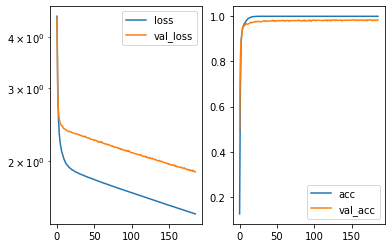

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.54667974]]
True positional value X 0.5
Y [[0.49031445]]
True positional value Y 0.5
H [[0.35891506]]
True positional value H 0.18518518518518517
W [[0.3122629]]
True positional value W 0.24074074074074073


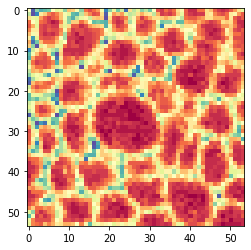

Epoch 187/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4866 - acc: 0.9993 - val_loss: 1.8803 - val_acc: 0.9816

Epoch 00187: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8803157688379915, 'val_acc': 0.9815692582715493, 'loss': 1.4866086627892743, 'acc': 0.9992792999444376, 'lr': 1e-04}


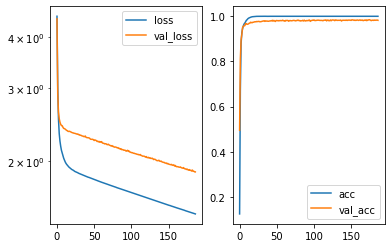

Predicted cell: Normal Probability: [[0.99999726]]
True Cell type: Normal
X [[0.5421941]]
True positional value X 0.5
Y [[0.50893277]]
True positional value Y 0.5
H [[0.3194292]]
True positional value H 0.2777777777777778
W [[0.2922558]]
True positional value W 0.3333333333333333


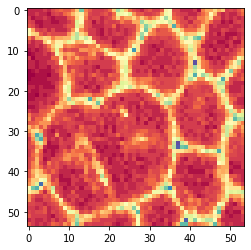

Epoch 188/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4843 - acc: 0.9993 - val_loss: 1.8796 - val_acc: 0.9837

Epoch 00188: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8796335048836241, 'val_acc': 0.9836756301403297, 'loss': 1.484264894961412, 'acc': 0.9993347384102501, 'lr': 1e-04}


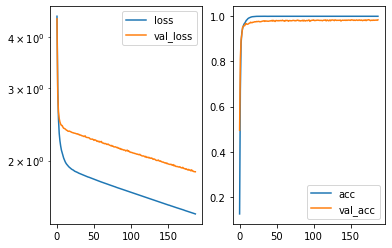

Predicted cell: Normal Probability: [[0.9969632]]
True Cell type: Normal
X [[0.48067164]]
True positional value X 0.5
Y [[0.43508476]]
True positional value Y 0.5
H [[0.5522651]]
True positional value H 0.5370370370370371
W [[0.5413088]]
True positional value W 0.35185185185185186


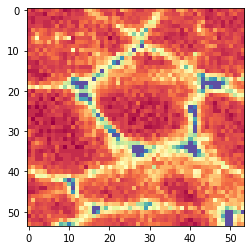

Epoch 189/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4828 - acc: 0.9993 - val_loss: 1.8795 - val_acc: 0.9810

Epoch 00189: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.879533686783516, 'val_acc': 0.9810426637585254, 'loss': 1.4828344228222994, 'acc': 0.9992792999444376, 'lr': 1e-04}


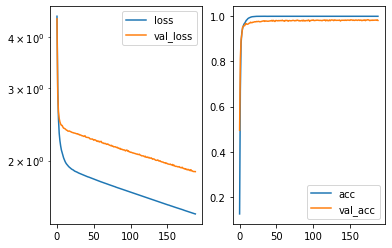

Predicted cell: MacroCheate Probability: [[0.9910528]]
True Cell type: MacroCheate
X [[0.75747186]]
True positional value X 0.6851851851851852
Y [[0.39082164]]
True positional value Y 0.3148148148148148
H [[0.38024738]]
True positional value H 0.37037037037037035
W [[0.41500884]]
True positional value W 0.42592592592592593


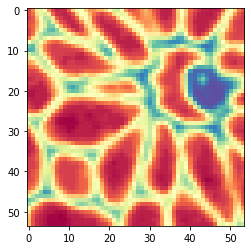

Epoch 190/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4801 - acc: 0.9995 - val_loss: 1.8773 - val_acc: 0.9816

Epoch 00190: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8773475963859698, 'val_acc': 0.9815692572357656, 'loss': 1.480111733536615, 'acc': 0.9994733345747814, 'lr': 1e-04}


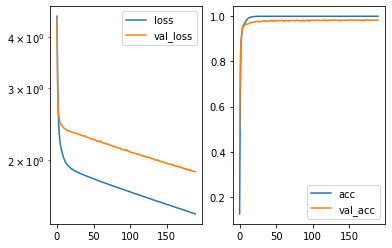

Predicted cell: NonMatureP1 Probability: [[0.99999464]]
True Cell type: NonMatureP1
X [[0.6244968]]
True positional value X 0.6851851851851852
Y [[0.54050195]]
True positional value Y 0.6851851851851852
H [[0.26765218]]
True positional value H 0.2777777777777778
W [[0.39827588]]
True positional value W 0.42592592592592593


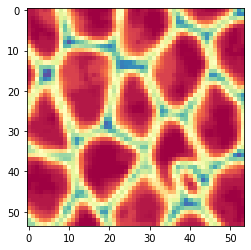

Epoch 191/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4787 - acc: 0.9993 - val_loss: 1.8732 - val_acc: 0.9810

Epoch 00191: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.873178483122835, 'val_acc': 0.9810426626913544, 'loss': 1.4787359465541854, 'acc': 0.9993347384102501, 'lr': 1e-04}


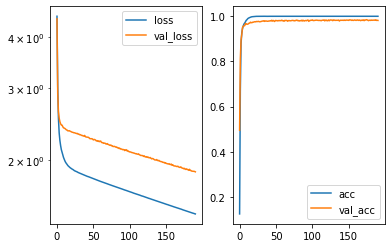

Predicted cell: NonMatureP1 Probability: [[0.99129266]]
True Cell type: NonMatureP1
X [[0.34095258]]
True positional value X 0.3148148148148148
Y [[0.37946862]]
True positional value Y 0.3148148148148148
H [[0.37547988]]
True positional value H 0.3333333333333333
W [[0.39349174]]
True positional value W 0.4074074074074074


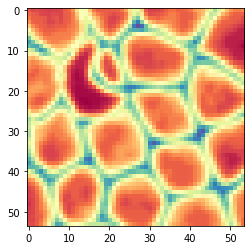

Epoch 192/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4765 - acc: 0.9994 - val_loss: 1.8668 - val_acc: 0.9821

Epoch 00192: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8668133201820087, 'val_acc': 0.982095849677222, 'loss': 1.476459793088071, 'acc': 0.9993624576431563, 'lr': 1e-04}


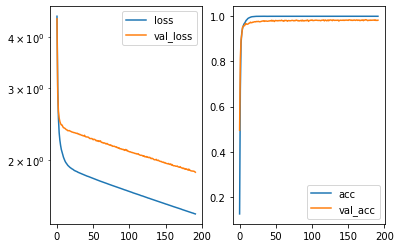

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.56198364]]
True positional value X 0.5
Y [[0.49335378]]
True positional value Y 0.5
H [[0.32860926]]
True positional value H 0.2777777777777778
W [[0.30539012]]
True positional value W 0.2962962962962963


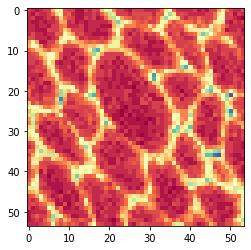

Epoch 193/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4743 - acc: 0.9994 - val_loss: 1.8670 - val_acc: 0.9842

Epoch 00193: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8669722646459144, 'val_acc': 0.9842022236175698, 'loss': 1.474343350449374, 'acc': 0.9993624576431563, 'lr': 1e-04}


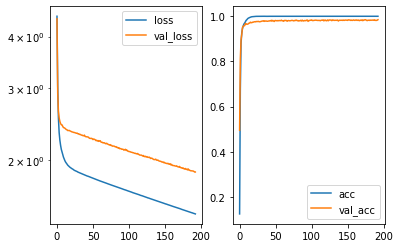

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4400229]]
True positional value X 0.5
Y [[0.5077058]]
True positional value Y 0.5
H [[0.3528671]]
True positional value H 0.4444444444444444
W [[0.3881947]]
True positional value W 0.48148148148148145


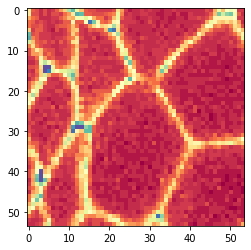

Epoch 194/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4725 - acc: 0.9993 - val_loss: 1.8656 - val_acc: 0.9826

Epoch 00194: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8656225907545205, 'val_acc': 0.9826224400157235, 'loss': 1.4724534620849055, 'acc': 0.9993347384102501, 'lr': 1e-04}


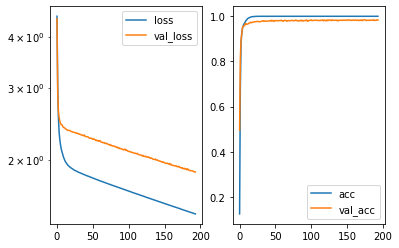

Predicted cell: Normal Probability: [[0.9994742]]
True Cell type: Normal
X [[0.6397431]]
True positional value X 0.5
Y [[0.4705222]]
True positional value Y 0.5
H [[0.30808893]]
True positional value H 0.5370370370370371
W [[0.29027963]]
True positional value W 0.4444444444444444


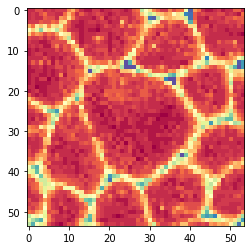

Epoch 195/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4702 - acc: 0.9993 - val_loss: 1.8707 - val_acc: 0.9795

Epoch 00195: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.870731581946057, 'val_acc': 0.9794628811924629, 'loss': 1.4702316557360484, 'acc': 0.9993070191773439, 'lr': 1e-04}


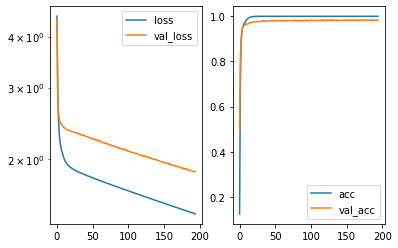

Predicted cell: MatureP1 Probability: [[0.999456]]
True Cell type: MatureP1
X [[0.51525533]]
True positional value X 0.5
Y [[0.5499112]]
True positional value Y 0.5
H [[0.43531314]]
True positional value H 0.5
W [[0.47496784]]
True positional value W 0.42592592592592593


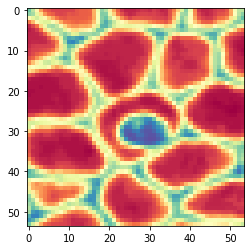

Epoch 196/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4683 - acc: 0.9994 - val_loss: 1.8621 - val_acc: 0.9837

Epoch 00196: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8620663627064058, 'val_acc': 0.9836756311761133, 'loss': 1.4683212615365344, 'acc': 0.9993624575968949, 'lr': 1e-04}


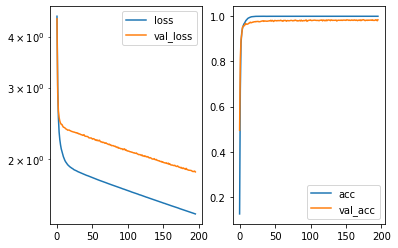

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4130425]]
True positional value X 0.5
Y [[0.57762]]
True positional value Y 0.5
H [[0.36293375]]
True positional value H 0.5
W [[0.60641664]]
True positional value W 0.7222222222222222


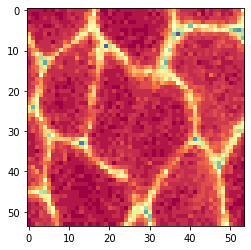

Epoch 197/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4665 - acc: 0.9993 - val_loss: 1.8545 - val_acc: 0.9831

Epoch 00197: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8545267138122068, 'val_acc': 0.9831490345601348, 'loss': 1.4664703705765771, 'acc': 0.9993070191773439, 'lr': 1e-04}


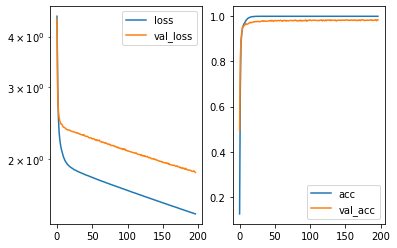

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.50231594]]
True positional value X 0.5
Y [[0.5518093]]
True positional value Y 0.5
H [[0.7823677]]
True positional value H 0.9074074074074074
W [[0.65615094]]
True positional value W 0.7592592592592593


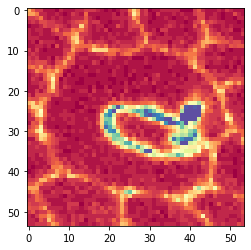

Epoch 198/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4637 - acc: 0.9993 - val_loss: 1.8593 - val_acc: 0.9837

Epoch 00198: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8593152473323153, 'val_acc': 0.9836756248986364, 'loss': 1.4637138247688193, 'acc': 0.9992515807115314, 'lr': 1e-04}


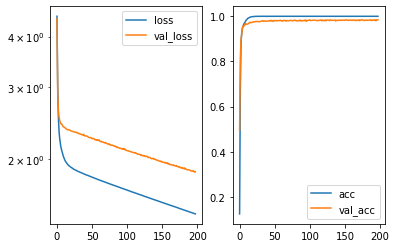

Predicted cell: MatureP1 Probability: [[0.9999759]]
True Cell type: MatureP1
X [[0.47805217]]
True positional value X 0.5
Y [[0.32449698]]
True positional value Y 0.3148148148148148
H [[0.46462017]]
True positional value H 0.4074074074074074
W [[0.45647058]]
True positional value W 0.35185185185185186


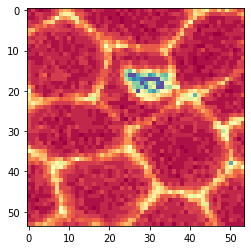

Epoch 199/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4623 - acc: 0.9993 - val_loss: 1.8527 - val_acc: 0.9821

Epoch 00199: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8527034194674097, 'val_acc': 0.9820958507130056, 'loss': 1.4622949385724955, 'acc': 0.9992515806190084, 'lr': 1e-04}


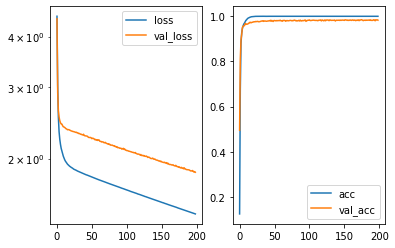

Predicted cell: MacroCheate Probability: [[0.9999994]]
True Cell type: MacroCheate
X [[0.2791132]]
True positional value X 0.3148148148148148
Y [[0.36545777]]
True positional value Y 0.3148148148148148
H [[0.5151809]]
True positional value H 0.35185185185185186
W [[0.43286914]]
True positional value W 0.4444444444444444


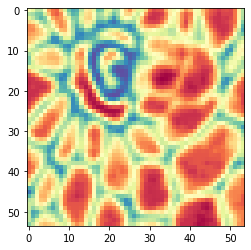

Epoch 200/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4603 - acc: 0.9992 - val_loss: 1.8508 - val_acc: 0.9826

Epoch 00200: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8507755197557165, 'val_acc': 0.9826224389799398, 'loss': 1.4603386283489193, 'acc': 0.9992238614786252, 'lr': 1e-04}


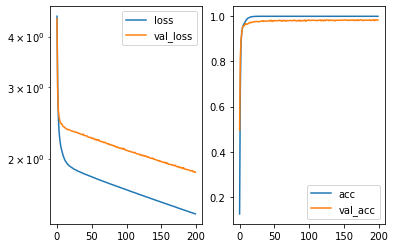

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.55378705]]
True positional value X 0.5
Y [[0.5204606]]
True positional value Y 0.5
H [[0.17429933]]
True positional value H 0.2222222222222222
W [[0.23050036]]
True positional value W 0.25925925925925924


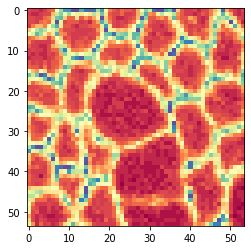

Epoch 201/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4583 - acc: 0.9994 - val_loss: 1.8485 - val_acc: 0.9826

Epoch 00201: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8484934695837936, 'val_acc': 0.9826224462932006, 'loss': 1.4582718082192812, 'acc': 0.9993624575968949, 'lr': 1e-04}


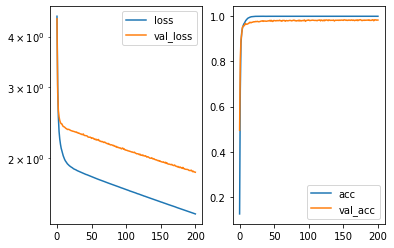

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.37669992]]
True positional value X 0.3148148148148148
Y [[0.34484783]]
True positional value Y 0.3148148148148148
H [[0.2569063]]
True positional value H 0.16666666666666666
W [[0.18347976]]
True positional value W 0.18518518518518517


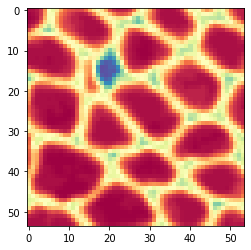

Epoch 202/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4560 - acc: 0.9993 - val_loss: 1.8453 - val_acc: 0.9837

Epoch 00202: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8453290475676598, 'val_acc': 0.9836756311761133, 'loss': 1.455988266671863, 'acc': 0.9993347384102501, 'lr': 1e-04}


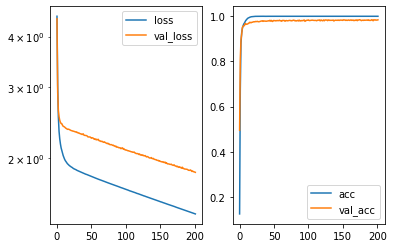

Predicted cell: MacroCheate Probability: [[0.9453411]]
True Cell type: MacroCheate
X [[0.46226686]]
True positional value X 0.5
Y [[0.25642115]]
True positional value Y 0.3148148148148148
H [[0.27301544]]
True positional value H 0.3333333333333333
W [[0.35928047]]
True positional value W 0.4074074074074074


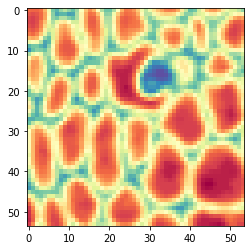

Epoch 203/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4540 - acc: 0.9994 - val_loss: 1.8478 - val_acc: 0.9816

Epoch 00203: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.847789231383719, 'val_acc': 0.981569254097027, 'loss': 1.4540440728651445, 'acc': 0.9993624576431563, 'lr': 1e-04}


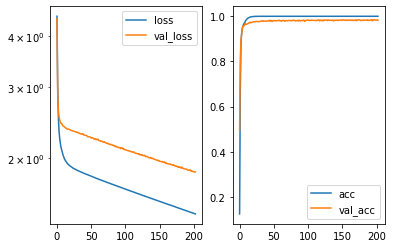

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.49892783]]
True positional value X 0.5
Y [[0.5274035]]
True positional value Y 0.5
H [[0.41998845]]
True positional value H 0.37037037037037035
W [[0.48383942]]
True positional value W 0.42592592592592593


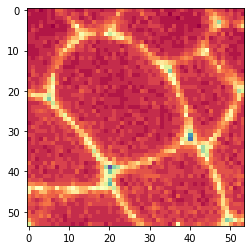

Epoch 204/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4527 - acc: 0.9993 - val_loss: 1.8402 - val_acc: 0.9816

Epoch 00204: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8402117753166973, 'val_acc': 0.9815692603745041, 'loss': 1.4527085104331248, 'acc': 0.9992792999444376, 'lr': 1e-04}


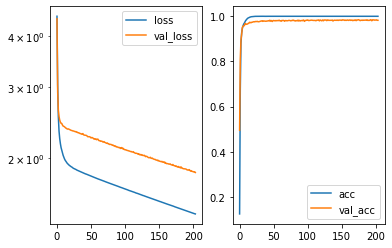

Predicted cell: NonMatureP1 Probability: [[0.9998659]]
True Cell type: NonMatureP1
X [[0.48227137]]
True positional value X 0.5
Y [[0.6904904]]
True positional value Y 0.6851851851851852
H [[0.32120597]]
True positional value H 0.4074074074074074
W [[0.43611935]]
True positional value W 0.3888888888888889


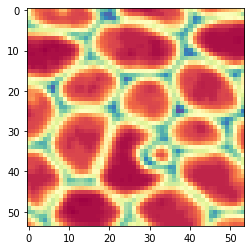

Epoch 205/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4508 - acc: 0.9993 - val_loss: 1.8422 - val_acc: 0.9837

Epoch 00205: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8422162130420117, 'val_acc': 0.983675629104546, 'loss': 1.4507523987242752, 'acc': 0.9993347384102501, 'lr': 1e-04}


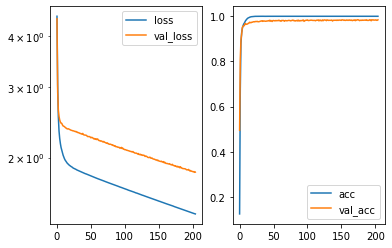

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.2814024]]
True positional value X 0.3148148148148148
Y [[0.4641347]]
True positional value Y 0.5
H [[0.35020643]]
True positional value H 0.3148148148148148
W [[0.29667827]]
True positional value W 0.3333333333333333


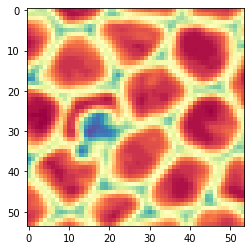

Epoch 206/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4488 - acc: 0.9994 - val_loss: 1.8356 - val_acc: 0.9831

Epoch 00206: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8355938005346948, 'val_acc': 0.9831490345601348, 'loss': 1.4487862736201496, 'acc': 0.9993624576431563, 'lr': 1e-04}


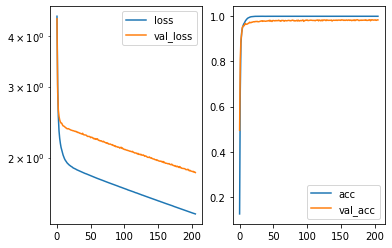

Predicted cell: MacroCheate Probability: [[0.9999739]]
True Cell type: MacroCheate
X [[0.32560962]]
True positional value X 0.3148148148148148
Y [[0.38284123]]
True positional value Y 0.5
H [[0.7996414]]
True positional value H 0.7222222222222222
W [[0.7712839]]
True positional value W 0.8888888888888888


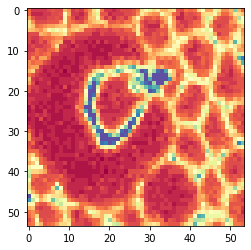

Epoch 207/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4468 - acc: 0.9992 - val_loss: 1.8371 - val_acc: 0.9847

Epoch 00207: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.83705776681895, 'val_acc': 0.9847288160590262, 'loss': 1.446777113843538, 'acc': 0.999196142245719, 'lr': 1e-04}


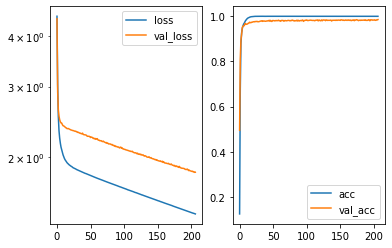

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.46475023]]
True positional value X 0.5
Y [[0.5223255]]
True positional value Y 0.5
H [[0.20775875]]
True positional value H 0.14814814814814814
W [[0.34047785]]
True positional value W 0.2222222222222222


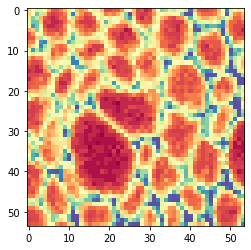

Epoch 208/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4444 - acc: 0.9993 - val_loss: 1.8331 - val_acc: 0.9837

Epoch 00208: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8331274287583892, 'val_acc': 0.9836756311761133, 'loss': 1.4443535271287296, 'acc': 0.9992792999444376, 'lr': 1e-04}


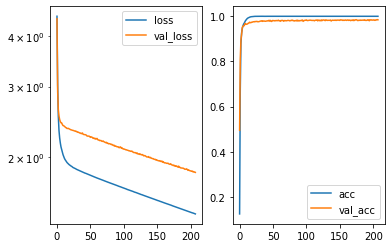

Predicted cell: Normal Probability: [[0.9999995]]
True Cell type: Normal
X [[0.41510835]]
True positional value X 0.5
Y [[0.5060359]]
True positional value Y 0.5
H [[0.5131269]]
True positional value H 0.37037037037037035
W [[0.4868924]]
True positional value W 0.2962962962962963


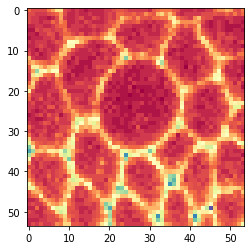

Epoch 209/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4426 - acc: 0.9993 - val_loss: 1.8376 - val_acc: 0.9800

Epoch 00209: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8375694567809424, 'val_acc': 0.9799894767726579, 'loss': 1.4426455760242696, 'acc': 0.9993070191773439, 'lr': 1e-04}


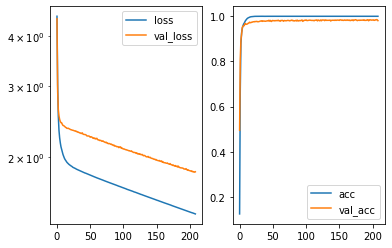

Predicted cell: MatureP1 Probability: [[0.9997712]]
True Cell type: MatureP1
X [[0.59852713]]
True positional value X 0.6851851851851852
Y [[0.56636554]]
True positional value Y 0.5
H [[0.29206365]]
True positional value H 0.18518518518518517
W [[0.25343323]]
True positional value W 0.2962962962962963


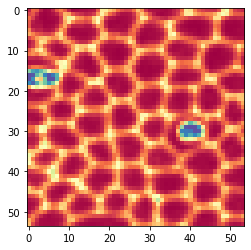

Epoch 210/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4407 - acc: 0.9993 - val_loss: 1.8295 - val_acc: 0.9826

Epoch 00210: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8295243680320206, 'val_acc': 0.9826224442216331, 'loss': 1.44067529046439, 'acc': 0.9992792999444376, 'lr': 1e-04}


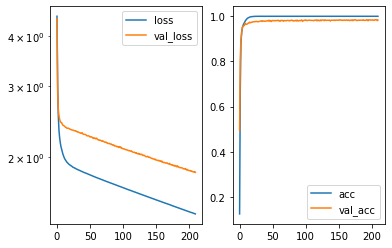

Predicted cell: MatureP1 Probability: [[0.9999957]]
True Cell type: MatureP1
X [[0.38424435]]
True positional value X 0.3148148148148148
Y [[0.42205396]]
True positional value Y 0.5
H [[0.30210137]]
True positional value H 0.35185185185185186
W [[0.38839155]]
True positional value W 0.46296296296296297


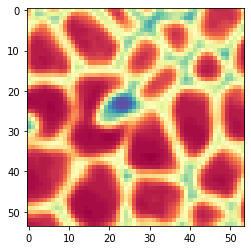

Epoch 211/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4388 - acc: 0.9993 - val_loss: 1.8256 - val_acc: 0.9826

Epoch 00211: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8255897936788341, 'val_acc': 0.9826224379441562, 'loss': 1.43882080169432, 'acc': 0.9993070191773439, 'lr': 1e-04}


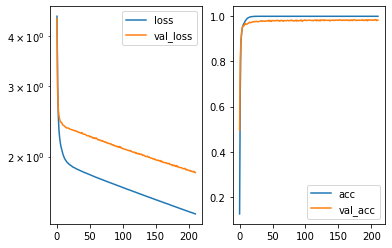

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.42862135]]
True positional value X 0.5
Y [[0.50356936]]
True positional value Y 0.5
H [[0.2244322]]
True positional value H 0.2037037037037037
W [[0.33884025]]
True positional value W 0.24074074074074073


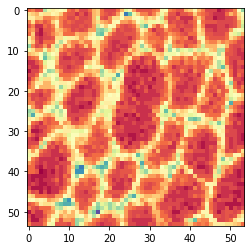

Epoch 212/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4365 - acc: 0.9992 - val_loss: 1.8286 - val_acc: 0.9831

Epoch 00212: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8286479383220542, 'val_acc': 0.9831490376988733, 'loss': 1.4365212721972154, 'acc': 0.9992238614786252, 'lr': 1e-04}


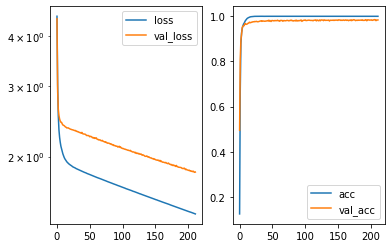

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.24814662]]
True positional value X 0.3148148148148148
Y [[0.31037658]]
True positional value Y 0.3148148148148148
H [[0.5123615]]
True positional value H 0.46296296296296297
W [[0.5208981]]
True positional value W 0.42592592592592593


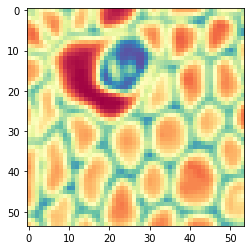

Epoch 213/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4350 - acc: 0.9993 - val_loss: 1.8219 - val_acc: 0.9837

Epoch 00213: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8218678501544971, 'val_acc': 0.9836756311761133, 'loss': 1.4349920790242254, 'acc': 0.9993070191773439, 'lr': 1e-04}


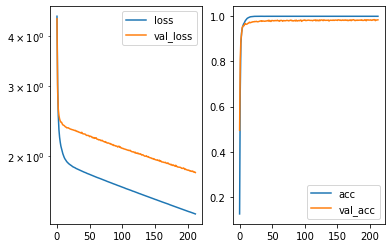

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.32350168]]
True positional value X 0.3148148148148148
Y [[0.47431198]]
True positional value Y 0.5
H [[0.32126516]]
True positional value H 0.35185185185185186
W [[0.32836202]]
True positional value W 0.42592592592592593


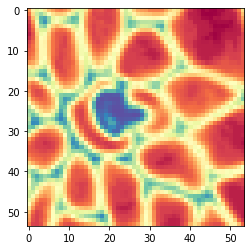

Epoch 214/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4331 - acc: 0.9993 - val_loss: 1.8193 - val_acc: 0.9837

Epoch 00214: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.819311733180564, 'val_acc': 0.9836756311761133, 'loss': 1.4331252841519098, 'acc': 0.9992792999444376, 'lr': 1e-04}


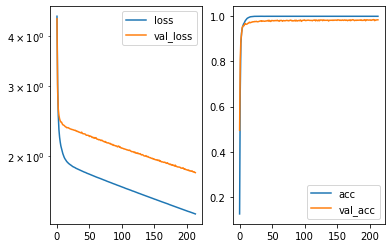

Predicted cell: MatureP1 Probability: [[0.99999106]]
True Cell type: MatureP1
X [[0.55966145]]
True positional value X 0.5
Y [[0.3171039]]
True positional value Y 0.3148148148148148
H [[0.4687884]]
True positional value H 0.2777777777777778
W [[0.32177413]]
True positional value W 0.2777777777777778


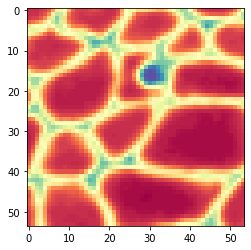

Epoch 215/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4311 - acc: 0.9993 - val_loss: 1.8186 - val_acc: 0.9831

Epoch 00215: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8186268488189432, 'val_acc': 0.9831490376988733, 'loss': 1.4310621083450232, 'acc': 0.9993070191773439, 'lr': 1e-04}


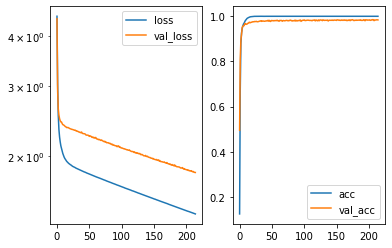

Predicted cell: NonMatureP1 Probability: [[0.9995271]]
True Cell type: NonMatureP1
X [[0.419454]]
True positional value X 0.3148148148148148
Y [[0.40972736]]
True positional value Y 0.5
H [[0.48705447]]
True positional value H 0.5555555555555556
W [[0.33856192]]
True positional value W 0.42592592592592593


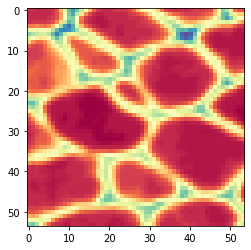

Epoch 216/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4289 - acc: 0.9993 - val_loss: 1.8196 - val_acc: 0.9821

Epoch 00216: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8195597325707185, 'val_acc': 0.9820958507130056, 'loss': 1.4289371114782226, 'acc': 0.9992792999444376, 'lr': 1e-04}


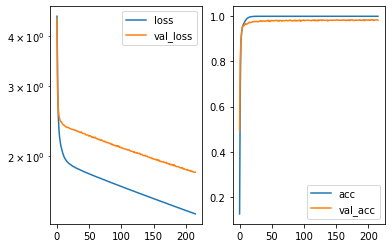

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3219391]]
True positional value X 0.3148148148148148
Y [[0.6895526]]
True positional value Y 0.6851851851851852
H [[0.72005206]]
True positional value H 0.6851851851851852
W [[0.73551536]]
True positional value W 0.6666666666666666


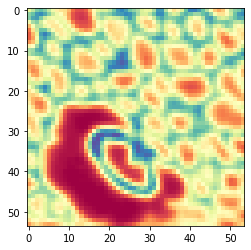

Epoch 217/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4271 - acc: 0.9993 - val_loss: 1.8156 - val_acc: 0.9826

Epoch 00217: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8156060389056212, 'val_acc': 0.9826224452574169, 'loss': 1.4271273895435606, 'acc': 0.9992515807115314, 'lr': 1e-04}


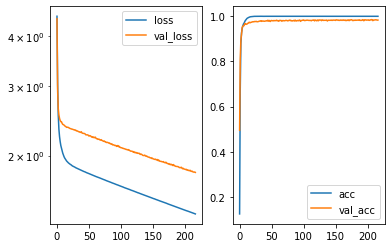

Predicted cell: MatureP1 Probability: [[0.9999995]]
True Cell type: MatureP1
X [[0.4390549]]
True positional value X 0.5
Y [[0.3088641]]
True positional value Y 0.3148148148148148
H [[0.34950447]]
True positional value H 0.37037037037037035
W [[0.2962942]]
True positional value W 0.37037037037037035


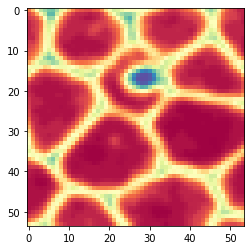

Epoch 218/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4255 - acc: 0.9993 - val_loss: 1.8152 - val_acc: 0.9826

Epoch 00218: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.815166137669198, 'val_acc': 0.9826224452574169, 'loss': 1.4255339937022922, 'acc': 0.9992792999444376, 'lr': 1e-04}


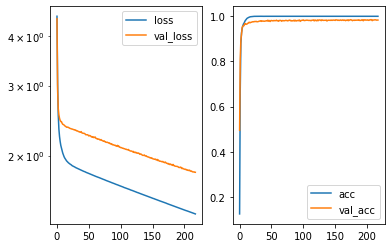

Predicted cell: MacroCheate Probability: [[0.99998033]]
True Cell type: MacroCheate
X [[0.29128113]]
True positional value X 0.3148148148148148
Y [[0.2946615]]
True positional value Y 0.3148148148148148
H [[0.47869462]]
True positional value H 0.46296296296296297
W [[0.6391852]]
True positional value W 0.6481481481481481


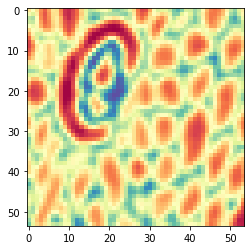

Epoch 219/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4237 - acc: 0.9993 - val_loss: 1.8084 - val_acc: 0.9842

Epoch 00219: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8083512788700267, 'val_acc': 0.9842022236175698, 'loss': 1.4237016006033651, 'acc': 0.9993347383177271, 'lr': 1e-04}


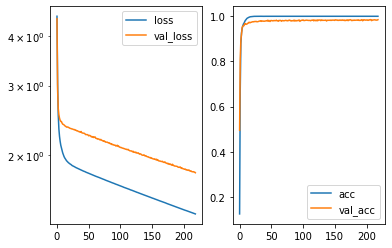

Predicted cell: Normal Probability: [[0.99999964]]
True Cell type: Normal
X [[0.55457014]]
True positional value X 0.5
Y [[0.46147618]]
True positional value Y 0.5
H [[0.22094674]]
True positional value H 0.3888888888888889
W [[0.32368225]]
True positional value W 0.48148148148148145


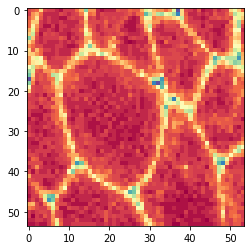

Epoch 220/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4212 - acc: 0.9992 - val_loss: 1.8110 - val_acc: 0.9837

Epoch 00220: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8109510839456253, 'val_acc': 0.983675629104546, 'loss': 1.4212274704715446, 'acc': 0.9992238614786252, 'lr': 1e-04}


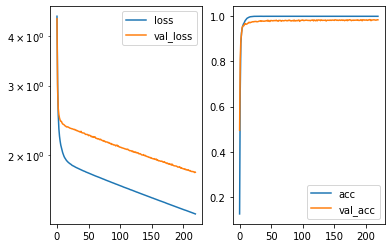

Predicted cell: NonMatureP1 Probability: [[0.999998]]
True Cell type: NonMatureP1
X [[0.6196292]]
True positional value X 0.6851851851851852
Y [[0.53941953]]
True positional value Y 0.6851851851851852
H [[0.2762252]]
True positional value H 0.2777777777777778
W [[0.39136887]]
True positional value W 0.42592592592592593


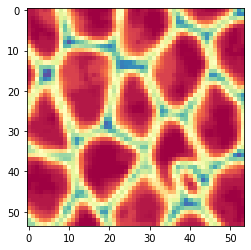

Epoch 221/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4195 - acc: 0.9993 - val_loss: 1.8046 - val_acc: 0.9821

Epoch 00221: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.804598745953227, 'val_acc': 0.9820958528159605, 'loss': 1.4195164518988652, 'acc': 0.9992792999444376, 'lr': 1e-04}


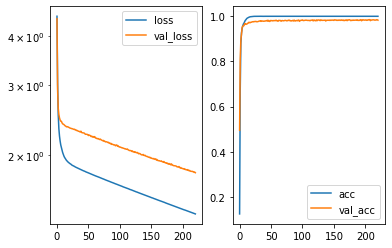

Predicted cell: MacroCheate Probability: [[0.9999987]]
True Cell type: MacroCheate
X [[0.7608395]]
True positional value X 0.6851851851851852
Y [[0.3865476]]
True positional value Y 0.3148148148148148
H [[0.67166406]]
True positional value H 0.7037037037037037
W [[0.52166945]]
True positional value W 0.5


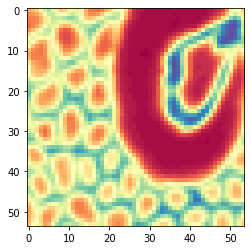

Epoch 222/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4181 - acc: 0.9993 - val_loss: 1.8090 - val_acc: 0.9795

Epoch 00222: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8089589476271515, 'val_acc': 0.9794628853669852, 'loss': 1.418099335324065, 'acc': 0.9992792999444376, 'lr': 1e-04}


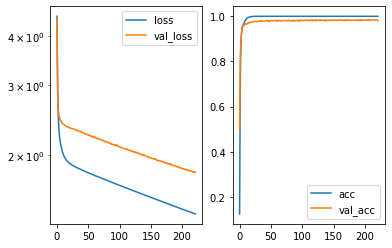

Predicted cell: MacroCheate Probability: [[0.9957866]]
True Cell type: MacroCheate
X [[0.71740514]]
True positional value X 0.6851851851851852
Y [[0.3794032]]
True positional value Y 0.3148148148148148
H [[0.36355212]]
True positional value H 0.48148148148148145
W [[0.26609233]]
True positional value W 0.3333333333333333


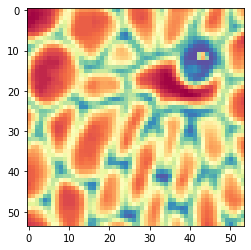

Epoch 223/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4159 - acc: 0.9993 - val_loss: 1.8037 - val_acc: 0.9831

Epoch 00223: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.803721238588772, 'val_acc': 0.9831490376988733, 'loss': 1.4159444282926996, 'acc': 0.9992792999444376, 'lr': 1e-04}


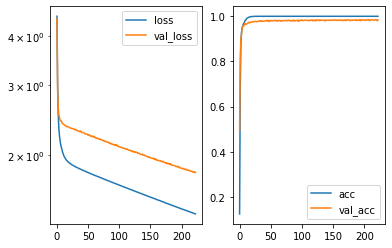

Predicted cell: NonMatureP1 Probability: [[0.9998098]]
True Cell type: NonMatureP1
X [[0.60762143]]
True positional value X 0.6851851851851852
Y [[0.2738873]]
True positional value Y 0.3148148148148148
H [[0.29169607]]
True positional value H 0.3888888888888889
W [[0.26200372]]
True positional value W 0.3888888888888889


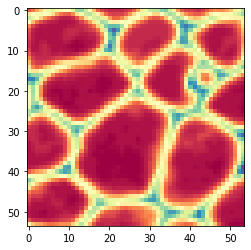

Epoch 224/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4137 - acc: 0.9992 - val_loss: 1.8021 - val_acc: 0.9816

Epoch 00224: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.8020602811820385, 'val_acc': 0.9815692582715493, 'loss': 1.413704039860438, 'acc': 0.999196142245719, 'lr': 1e-04}


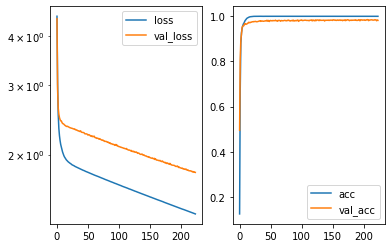

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.49202007]]
True positional value X 0.5
Y [[0.55573]]
True positional value Y 0.5
H [[0.49574387]]
True positional value H 0.2777777777777778
W [[0.4152122]]
True positional value W 0.3333333333333333


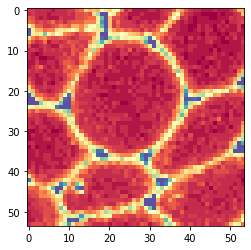

Epoch 225/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4121 - acc: 0.9993 - val_loss: 1.7980 - val_acc: 0.9831

Epoch 00225: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7979646595984524, 'val_acc': 0.983149038734657, 'loss': 1.412090998211937, 'acc': 0.9993070191773439, 'lr': 1e-04}


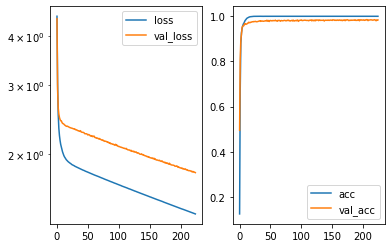

Predicted cell: MatureP1 Probability: [[0.998209]]
True Cell type: MatureP1
X [[0.348947]]
True positional value X 0.3148148148148148
Y [[0.35994098]]
True positional value Y 0.3148148148148148
H [[0.3937511]]
True positional value H 0.2962962962962963
W [[0.3099595]]
True positional value W 0.25925925925925924


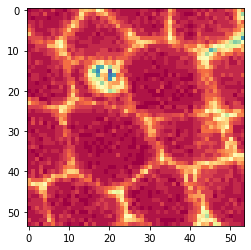

Epoch 226/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4104 - acc: 0.9993 - val_loss: 1.7966 - val_acc: 0.9837

Epoch 00226: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7965987978513898, 'val_acc': 0.9836756311761133, 'loss': 1.410424002298879, 'acc': 0.9992792999444376, 'lr': 1e-04}


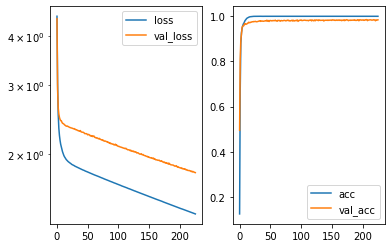

Predicted cell: MacroCheate Probability: [[0.9999988]]
True Cell type: MacroCheate
X [[0.73645353]]
True positional value X 0.6851851851851852
Y [[0.7127671]]
True positional value Y 0.6851851851851852
H [[0.68954605]]
True positional value H 0.6296296296296297
W [[0.9322388]]
True positional value W 0.9444444444444444


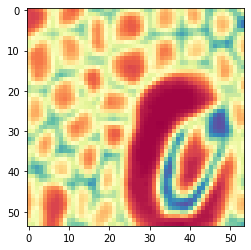

Epoch 227/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4081 - acc: 0.9995 - val_loss: 1.7936 - val_acc: 0.9826

Epoch 00227: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7936109394196023, 'val_acc': 0.9826224410828946, 'loss': 1.4081046780060607, 'acc': 0.9995010538076876, 'lr': 1e-04}


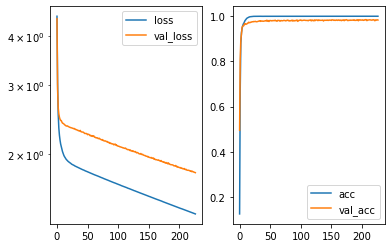

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6995077]]
True positional value X 0.6851851851851852
Y [[0.50172853]]
True positional value Y 0.5
H [[0.52325827]]
True positional value H 0.4444444444444444
W [[0.4187742]]
True positional value W 0.3888888888888889


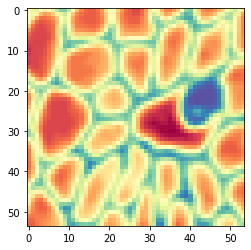

Epoch 228/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4067 - acc: 0.9993 - val_loss: 1.7899 - val_acc: 0.9810

Epoch 00228: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7899158054932347, 'val_acc': 0.981042660619787, 'loss': 1.4067139900739183, 'acc': 0.9993347384102501, 'lr': 1e-04}


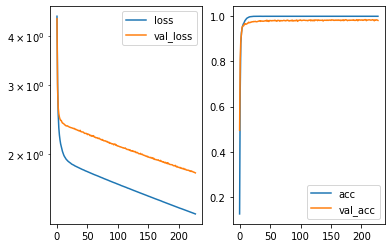

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.52497804]]
True positional value X 0.5
Y [[0.56636226]]
True positional value Y 0.5
H [[0.23707177]]
True positional value H 0.2962962962962963
W [[0.40800548]]
True positional value W 0.42592592592592593


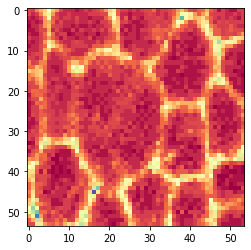

Epoch 229/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4044 - acc: 0.9993 - val_loss: 1.7903 - val_acc: 0.9831

Epoch 00229: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7902615196520306, 'val_acc': 0.9831490376988733, 'loss': 1.4043717289039679, 'acc': 0.9993070191773439, 'lr': 1e-04}


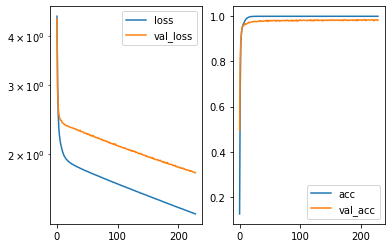

Predicted cell: MatureP1 Probability: [[0.99999213]]
True Cell type: MatureP1
X [[0.475718]]
True positional value X 0.5
Y [[0.30891067]]
True positional value Y 0.3148148148148148
H [[0.30197954]]
True positional value H 0.2777777777777778
W [[0.3191623]]
True positional value W 0.35185185185185186


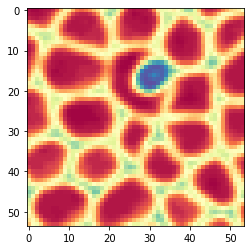

Epoch 230/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4030 - acc: 0.9993 - val_loss: 1.7868 - val_acc: 0.9837

Epoch 00230: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7867791102144703, 'val_acc': 0.9836756301403297, 'loss': 1.4029882792980288, 'acc': 0.9992515807115314, 'lr': 1e-04}


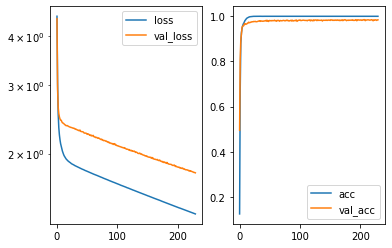

Predicted cell: NonMatureP1 Probability: [[0.9945168]]
True Cell type: MatureP1
X [[0.31994846]]
True positional value X 0.3148148148148148
Y [[0.68095565]]
True positional value Y 0.6851851851851852
H [[0.30030942]]
True positional value H 0.2962962962962963
W [[0.25689644]]
True positional value W 0.25925925925925924


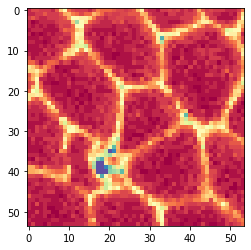

Epoch 231/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4011 - acc: 0.9994 - val_loss: 1.7869 - val_acc: 0.9816

Epoch 00231: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.78690288071886, 'val_acc': 0.9815692614102879, 'loss': 1.4011396918173626, 'acc': 0.9993624576431563, 'lr': 1e-04}


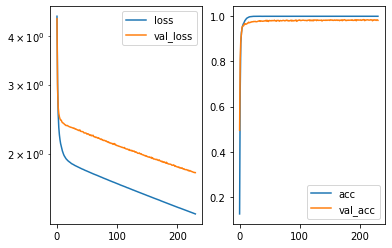

Predicted cell: MacroCheate Probability: [[0.9999783]]
True Cell type: MacroCheate
X [[0.47788477]]
True positional value X 0.5
Y [[0.26942116]]
True positional value Y 0.3148148148148148
H [[0.631612]]
True positional value H 0.7222222222222222
W [[0.53661215]]
True positional value W 0.6666666666666666


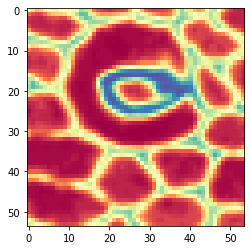

Epoch 232/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3991 - acc: 0.9993 - val_loss: 1.7822 - val_acc: 0.9831

Epoch 00232: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7821655611165765, 'val_acc': 0.983149033524351, 'loss': 1.3991345848922443, 'acc': 0.9993347384102501, 'lr': 1e-04}


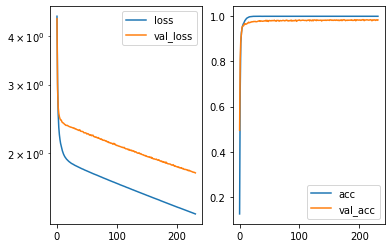

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.54036784]]
True positional value X 0.5
Y [[0.45260996]]
True positional value Y 0.5
H [[0.3938801]]
True positional value H 0.35185185185185186
W [[0.49869204]]
True positional value W 0.3888888888888889


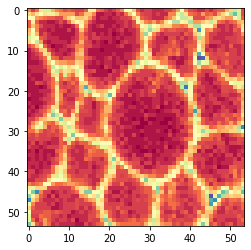

Epoch 233/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3972 - acc: 0.9993 - val_loss: 1.7822 - val_acc: 0.9837

Epoch 00233: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7821576098130212, 'val_acc': 0.983675629104546, 'loss': 1.3971559959473585, 'acc': 0.9992792999444376, 'lr': 1e-04}


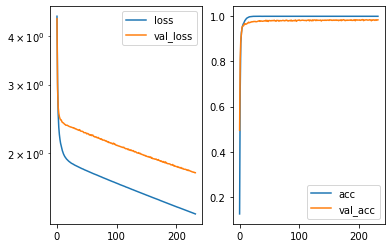

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.63928765]]
True positional value X 0.6851851851851852
Y [[0.6199722]]
True positional value Y 0.5
H [[0.52265114]]
True positional value H 0.37037037037037035
W [[0.5162991]]
True positional value W 0.5


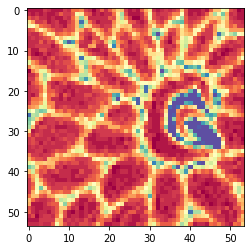

Epoch 234/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3953 - acc: 0.9993 - val_loss: 1.7799 - val_acc: 0.9837

Epoch 00234: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7798804271340434, 'val_acc': 0.9836756301403297, 'loss': 1.3952555734945489, 'acc': 0.9992792999444376, 'lr': 1e-04}


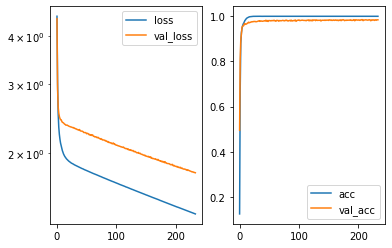

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5189779]]
True positional value X 0.5
Y [[0.49799657]]
True positional value Y 0.5
H [[0.23052128]]
True positional value H 0.16666666666666666
W [[0.3680809]]
True positional value W 0.12962962962962962


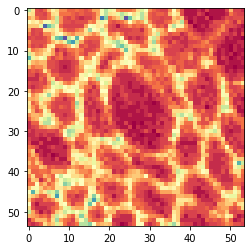

Epoch 235/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3936 - acc: 0.9993 - val_loss: 1.7755 - val_acc: 0.9831

Epoch 00235: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7754887129018782, 'val_acc': 0.9831490376988733, 'loss': 1.3935766630234059, 'acc': 0.9993070191773439, 'lr': 1e-04}


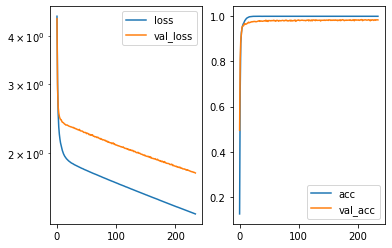

Predicted cell: MatureP1 Probability: [[0.99998176]]
True Cell type: MatureP1
X [[0.35589457]]
True positional value X 0.3148148148148148
Y [[0.6528309]]
True positional value Y 0.6851851851851852
H [[0.5353942]]
True positional value H 0.5370370370370371
W [[0.49450302]]
True positional value W 0.46296296296296297


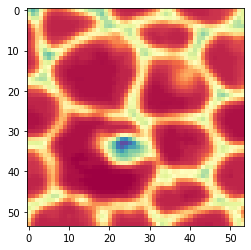

Epoch 236/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3912 - acc: 0.9993 - val_loss: 1.7734 - val_acc: 0.9831

Epoch 00236: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7734447246228098, 'val_acc': 0.983149038734657, 'loss': 1.391195966275096, 'acc': 0.9993347384102501, 'lr': 1e-04}


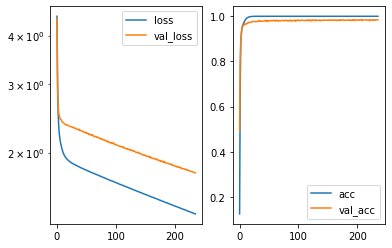

Predicted cell: MacroCheate Probability: [[0.9999168]]
True Cell type: MacroCheate
X [[0.63958484]]
True positional value X 0.6851851851851852
Y [[0.63457835]]
True positional value Y 0.6851851851851852
H [[0.5474903]]
True positional value H 0.46296296296296297
W [[0.5453758]]
True positional value W 0.5740740740740741


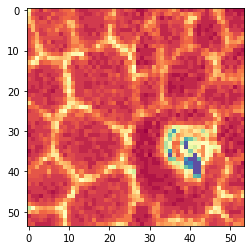

Epoch 237/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3900 - acc: 0.9993 - val_loss: 1.7752 - val_acc: 0.9816

Epoch 00237: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.775227505762744, 'val_acc': 0.9815692582715493, 'loss': 1.3900346260586816, 'acc': 0.9992515807115314, 'lr': 1e-04}


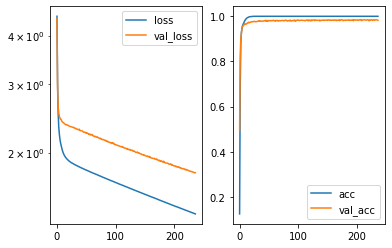

Predicted cell: MatureP1 Probability: [[0.9998246]]
True Cell type: MatureP1
X [[0.50716645]]
True positional value X 0.5
Y [[0.5181782]]
True positional value Y 0.5
H [[0.44662535]]
True positional value H 0.3333333333333333
W [[0.43300468]]
True positional value W 0.3888888888888889


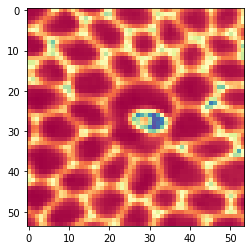

Epoch 238/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3881 - acc: 0.9993 - val_loss: 1.7707 - val_acc: 0.9816

Epoch 00238: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.770665772655501, 'val_acc': 0.9815692572357656, 'loss': 1.3880592988406837, 'acc': 0.9993347384102501, 'lr': 1e-04}


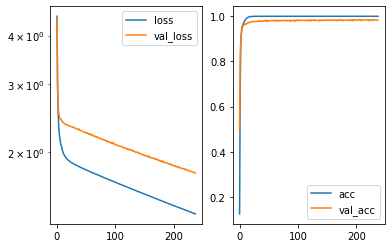

Predicted cell: MacroCheate Probability: [[0.997242]]
True Cell type: MacroCheate
X [[0.4882993]]
True positional value X 0.5
Y [[0.700547]]
True positional value Y 0.6851851851851852
H [[0.47870293]]
True positional value H 0.3888888888888889
W [[0.5383035]]
True positional value W 0.48148148148148145


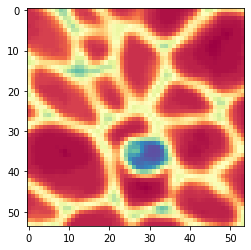

Epoch 239/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3867 - acc: 0.9993 - val_loss: 1.7651 - val_acc: 0.9847

Epoch 00239: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7650738586056163, 'val_acc': 0.9847288160590262, 'loss': 1.3867033492409875, 'acc': 0.9993347384102501, 'lr': 1e-04}


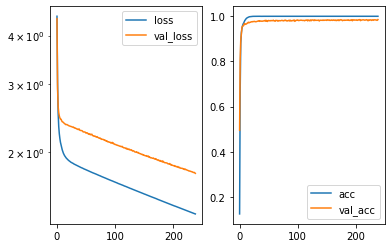

Predicted cell: NonMatureP1 Probability: [[0.99999714]]
True Cell type: NonMatureP1
X [[0.4409681]]
True positional value X 0.3148148148148148
Y [[0.49364907]]
True positional value Y 0.5
H [[0.30336004]]
True positional value H 0.3888888888888889
W [[0.4488149]]
True positional value W 0.35185185185185186


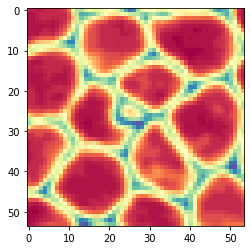

Epoch 240/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3843 - acc: 0.9993 - val_loss: 1.7670 - val_acc: 0.9837

Epoch 00240: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7670097583340871, 'val_acc': 0.9836756311761133, 'loss': 1.3842839434030831, 'acc': 0.9992515807115314, 'lr': 1e-04}


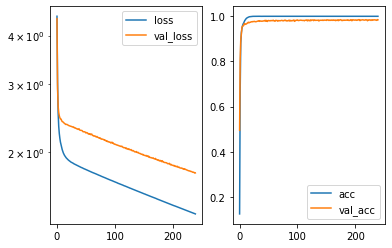

Predicted cell: Normal Probability: [[0.9996871]]
True Cell type: Normal
X [[0.5255177]]
True positional value X 0.5
Y [[0.5506749]]
True positional value Y 0.5
H [[0.14125131]]
True positional value H 0.14814814814814814
W [[0.13588911]]
True positional value W 0.16666666666666666


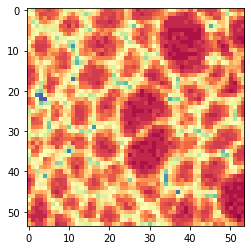

Epoch 241/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3823 - acc: 0.9993 - val_loss: 1.7629 - val_acc: 0.9837

Epoch 00241: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.762922965833675, 'val_acc': 0.9836756301403297, 'loss': 1.3822819416823546, 'acc': 0.9992792999444376, 'lr': 1e-04}


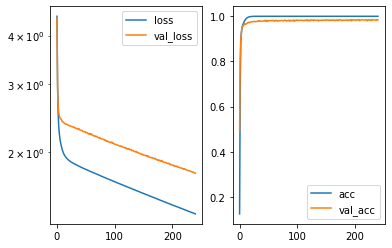

Predicted cell: NonMatureP1 Probability: [[0.9997869]]
True Cell type: NonMatureP1
X [[0.48484552]]
True positional value X 0.5
Y [[0.44597378]]
True positional value Y 0.3148148148148148
H [[0.32799405]]
True positional value H 0.25925925925925924
W [[0.29545963]]
True positional value W 0.2037037037037037


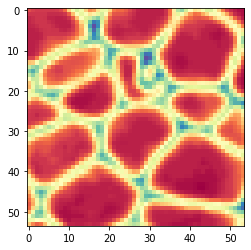

Epoch 242/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3806 - acc: 0.9993 - val_loss: 1.7620 - val_acc: 0.9826

Epoch 00242: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.762033708915389, 'val_acc': 0.9826224452574169, 'loss': 1.3805617362488822, 'acc': 0.9993070191773439, 'lr': 1e-04}


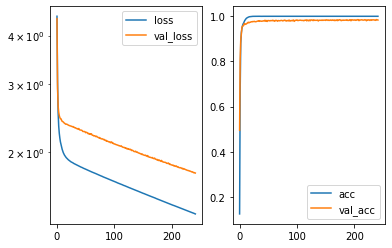

Predicted cell: MatureP1 Probability: [[0.9999988]]
True Cell type: MatureP1
X [[0.6881919]]
True positional value X 0.6851851851851852
Y [[0.2560749]]
True positional value Y 0.3148148148148148
H [[0.341418]]
True positional value H 0.4074074074074074
W [[0.4122132]]
True positional value W 0.3148148148148148


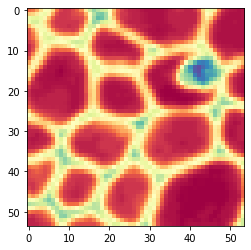

Epoch 243/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3789 - acc: 0.9993 - val_loss: 1.7578 - val_acc: 0.9847

Epoch 00243: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7578174963695492, 'val_acc': 0.9847288160590262, 'loss': 1.3788627453370585, 'acc': 0.9992515807115314, 'lr': 1e-04}


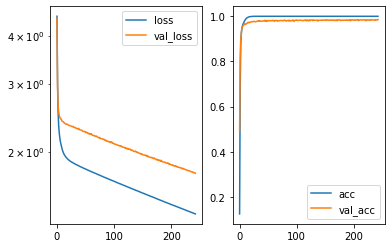

Predicted cell: Normal Probability: [[0.99999976]]
True Cell type: Normal
X [[0.42803293]]
True positional value X 0.5
Y [[0.54636735]]
True positional value Y 0.5
H [[0.12599117]]
True positional value H 0.12962962962962962
W [[0.22633676]]
True positional value W 0.24074074074074073


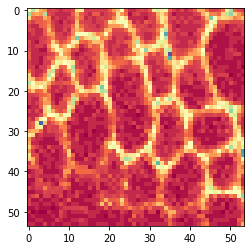

Epoch 244/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3765 - acc: 0.9992 - val_loss: 1.7552 - val_acc: 0.9837

Epoch 00244: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7552247148491698, 'val_acc': 0.9836756311761133, 'loss': 1.3765316617926362, 'acc': 0.9992238614786252, 'lr': 1e-04}


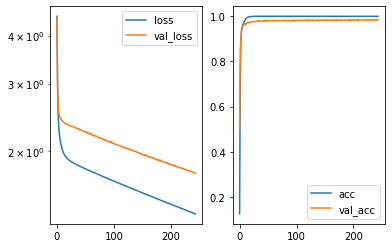

Predicted cell: MatureP1 Probability: [[0.9999993]]
True Cell type: MatureP1
X [[0.3697293]]
True positional value X 0.3148148148148148
Y [[0.3455531]]
True positional value Y 0.3148148148148148
H [[0.3953475]]
True positional value H 0.42592592592592593
W [[0.34088343]]
True positional value W 0.4444444444444444


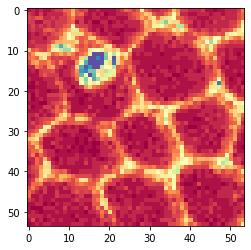

Epoch 245/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3749 - acc: 0.9994 - val_loss: 1.7560 - val_acc: 0.9847

Epoch 00245: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.756042126481818, 'val_acc': 0.9847288150232425, 'loss': 1.3748976957217753, 'acc': 0.9993624576431563, 'lr': 1e-04}


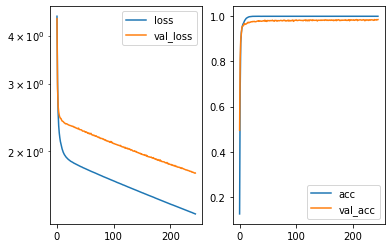

Predicted cell: MatureP1 Probability: [[0.99999547]]
True Cell type: MatureP1
X [[0.3640817]]
True positional value X 0.3148148148148148
Y [[0.67831373]]
True positional value Y 0.6851851851851852
H [[0.40663612]]
True positional value H 0.3888888888888889
W [[0.31570014]]
True positional value W 0.2962962962962963


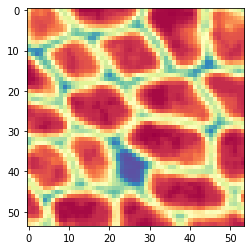

Epoch 246/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3731 - acc: 0.9993 - val_loss: 1.7574 - val_acc: 0.9810

Epoch 00246: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7574258636587101, 'val_acc': 0.9810426626913544, 'loss': 1.3730752713955985, 'acc': 0.9993070191773439, 'lr': 1e-04}


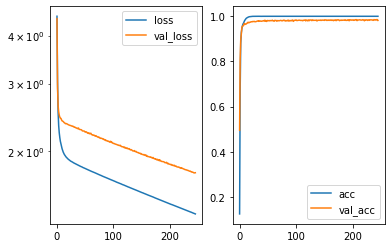

Predicted cell: NonMatureP1 Probability: [[0.999997]]
True Cell type: NonMatureP1
X [[0.49631685]]
True positional value X 0.5
Y [[0.6695976]]
True positional value Y 0.6851851851851852
H [[0.27836257]]
True positional value H 0.35185185185185186
W [[0.23975787]]
True positional value W 0.35185185185185186


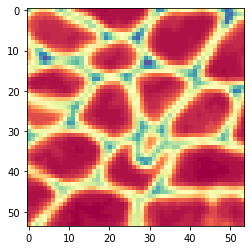

Epoch 247/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3714 - acc: 0.9993 - val_loss: 1.7519 - val_acc: 0.9847

Epoch 00247: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7518953901017698, 'val_acc': 0.9847288150232425, 'loss': 1.3714152003540037, 'acc': 0.9993347384102501, 'lr': 1e-04}


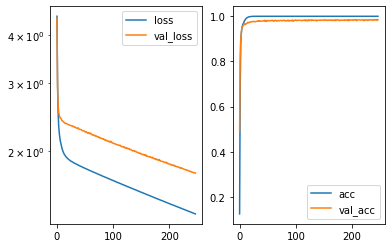

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.70444554]]
True positional value X 0.6851851851851852
Y [[0.6338535]]
True positional value Y 0.6851851851851852
H [[0.551533]]
True positional value H 0.5185185185185185
W [[0.7999294]]
True positional value W 0.9259259259259259


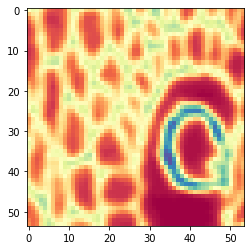

Epoch 248/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3692 - acc: 0.9993 - val_loss: 1.7487 - val_acc: 0.9847

Epoch 00248: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7486931686968852, 'val_acc': 0.9847288160590262, 'loss': 1.3692035304428085, 'acc': 0.9992792999444376, 'lr': 1e-04}


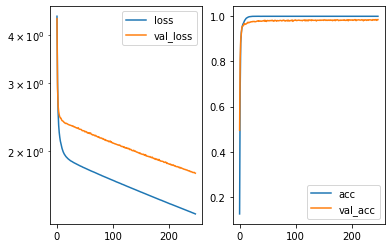

Predicted cell: NonMatureP1 Probability: [[0.9999982]]
True Cell type: NonMatureP1
X [[0.5534259]]
True positional value X 0.6851851851851852
Y [[0.55651885]]
True positional value Y 0.6851851851851852
H [[0.3680595]]
True positional value H 0.4444444444444444
W [[0.23598668]]
True positional value W 0.2962962962962963


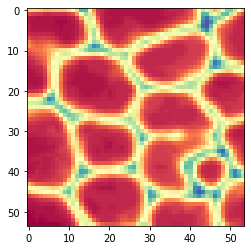

Epoch 249/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3679 - acc: 0.9994 - val_loss: 1.7449 - val_acc: 0.9837

Epoch 00249: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7449274015401526, 'val_acc': 0.9836756301403297, 'loss': 1.3678876712351578, 'acc': 0.9993624576431563, 'lr': 1e-04}


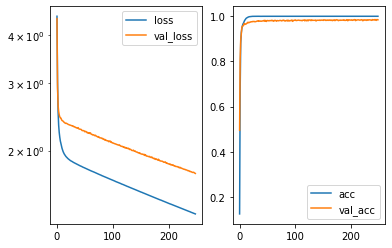

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.45814642]]
True positional value X 0.5
Y [[0.5273774]]
True positional value Y 0.5
H [[0.23346233]]
True positional value H 0.18518518518518517
W [[0.19326778]]
True positional value W 0.2222222222222222


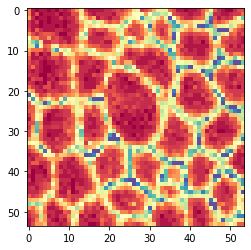

Epoch 250/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3661 - acc: 0.9994 - val_loss: 1.7420 - val_acc: 0.9831

Epoch 00250: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0f48.h5
{'val_loss': 1.7419531690628671, 'val_acc': 0.983149038734657, 'loss': 1.3661413559668847, 'acc': 0.9993624576431563, 'lr': 1e-04}


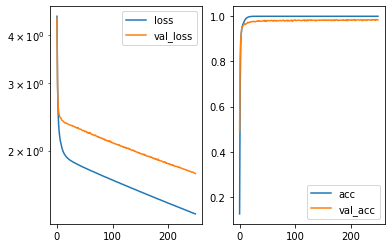

Predicted cell: NonMatureP1 Probability: [[0.99999976]]
True Cell type: NonMatureP1
X [[0.6699015]]
True positional value X 0.6851851851851852
Y [[0.5060891]]
True positional value Y 0.5
H [[0.33681065]]
True positional value H 0.3888888888888889
W [[0.36978167]]
True positional value W 0.35185185185185186


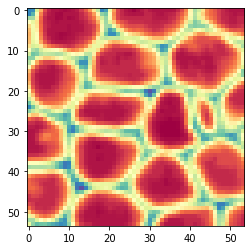

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
